# Inerpretation-Net

## Specification of Experiment Settings

In [1]:
#######################################################################################################################################
###################################################### CONFIG FILE ####################################################################
#######################################################################################################################################
sleep_time = 0 #minutes


config = {
    'function_family': {
        'maximum_depth': 3,
        'beta': 1,
        'decision_sparsity': 1,
        'fully_grown': True,    
        'dt_type': 'vanilla', #'SDT', 'vanilla'
    },
    'data': {
        'number_of_variables': 2, 
        'num_classes': 2,
        'categorical_indices': [],
        
        'use_distribution_list': True,
        'random_parameters_distribution': True, ##MAKEPATH DIFFERENT FILES
        'max_distributions_per_class': 1, # None; 0; int >= 1  
        'exclude_linearly_seperable': True,
        'data_generation_filtering': False,
        'fixed_class_probability': False,
        'balanced_data': True,
        'weighted_data_generation': False,
        'shift_distrib': False,
        
        'dt_type_train': 'vanilla', # (None, 'vanilla', 'SDT')
        'maximum_depth_train': 3, #None or int
        'decision_sparsity_train': 1, #None or int
        
        'function_generation_type': 'distribution',# 'make_classification_distribution', 'make_classification_distribution_trained', 'distribution', 'distribution_trained', 'make_classification', 'make_classification_trained', 'random_decision_tree', 'random_decision_tree_trained'
        'distrib_by_feature': True,
        'distribution_list': ['uniform', 'normal', 'gamma', 'beta', 'poisson'],#['uniform', 'gamma', 'poisson', 'exponential', 'weibull'],#['uniform', 'normal', 'gamma', 'exponential', 'beta', 'binomial', 'poisson'], 
        'distribution_list_eval': ['uniform', 'normal', 'gamma', 'beta', 'poisson'],#['uniform', 'gamma', 'poisson', 'exponential', 'weibull'],#['uniform', 'normal', 'gamma', 'beta', 'poisson'],
        
        'objective': 'classification', # 'regression'
        
        'x_max': 1,
        'x_min': 0,
        'x_distrib': 'uniform', #'normal', 'uniform',       
                
        'lambda_dataset_size': 5000, #number of samples per function
        'number_of_generated_datasets': 10000,
        
        'noise_injected_level': 0, 
        'noise_injected_type': 'flip_percentage', # '' 'normal' 'uniform' 'normal_range' 'uniform_range'
        
        'data_noise': 0, #None or float
        
        'distrib_param_max': 5,
    }, 
    'lambda_net': {
        'epochs_lambda': 1000,
        'early_stopping_lambda': True, 
        'early_stopping_min_delta_lambda': 1e-3,
        'restore_best_weights': True,
        'patience_lambda': 50,
        
        'batch_lambda': 64,
        'dropout_lambda': 0,
        'lambda_network_layers': [128],
        'use_batchnorm_lambda': False,
        
        'optimizer_lambda': 'adam',
        'loss_lambda': 'binary_crossentropy', #categorical_crossentropy
        
        'number_of_lambda_weights': None,
        
        'number_initializations_lambda': 1, 
        
        'number_of_trained_lambda_nets': 10000,
    },     
    
    'i_net': {
        #'dense_layers': [1024, 1024, 256, 2048, 2048],
        'dense_layers': [1792, 512, 512],
        #'dense_layers': [1792, 512, 512],
        
        #'dropout': [0, 0, 0, 0, 0.3],#[0.3, 0.3, 0.3, 0.3, 0.3],
        'dropout': [0, 0, 0.5],
        #'dropout': [0, 0, 0.5],

        #'hidden_activation': 'relu',
        'hidden_activation': 'sigmoid',
        #'hidden_activation': 'swish',

        #'optimizer': 'rmsprop', 
        'optimizer': 'adam', 
        #'optimizer': 'adam', 
        
        #'learning_rate': 0.001,
        'learning_rate': 0.001,
        #'learning_rate': 0.001, 
        
        'separate_weight_bias': False,
        
        'convolution_layers': None,
        'lstm_layers': None,        
        'additional_hidden': False,
        
        'loss': 'binary_crossentropy', #mse; binary_crossentropy; 'binary_accuracy'
        'metrics': ['binary_accuracy'], #soft_ or _penalized
        
        'epochs': 500, 
        'early_stopping': True,
        'batch_size': 256,

        'interpretation_dataset_size': 10000,
                
        'test_size': 1000, #Float for fraction, Int for number 0
        'evaluate_distribution': True,
        'force_evaluate_real_world': False,
        
        'function_representation_type': 5, # 1=standard representation; 2=sparse representation with classification for variables; 3=softmax to select classes (n top probabilities)
        'normalize_lambda_nets': False,

        'optimize_decision_function': True, #False
        'function_value_loss': True, #False
                      
        'data_reshape_version': None, #default to 2 options:(None, 0,1 2,3) #3=autoencoder dimensionality reduction
        
        'resampling_strategy': None,#'ADASYN', #'SMOTE', None
        'resampling_threshold': 0.2,#0.2,
        
        'nas': False,
        'nas_type': 'SEQUENTIAL', #options:(None, 'SEQUENTIAL', 'CNN', 'LSTM', 'CNN-LSTM', 'CNN-LSTM-parallel')      
        'nas_trials': 60,
        'nas_optimizer': 'greedy' #'hyperband',#"bayesian",'greedy', 'random'
    },    
    
    'evaluation': {   
        #'inet_holdout_seed_evaluation': False,
        
        'number_of_random_evaluations_per_distribution': 10,
        'optimize_sampling': True,
            
        'random_evaluation_dataset_size': 500, 
        'random_evaluation_dataset_distribution': 'uniform', 
        
        'per_network_optimization_dataset_size': 5000,

        #'sklearn_dt_benchmark': False,
        #'sdt_benchmark': False,
        
        'different_eval_data': False,
        
        'eval_data_description': {
            ######### data #########
            'eval_data_function_generation_type': 'make_classification',
            'eval_data_lambda_dataset_size': 5000, #number of samples per function
            'eval_data_noise_injected_level': 0, 
            'eval_data_noise_injected_type': 'flip_percentage', # '' 'normal' 'uniform' 'normal_range' 'uniform_range'     
            ######### lambda_net #########
            'eval_data_number_of_trained_lambda_nets': 100,
            ######### i_net #########
            'eval_data_interpretation_dataset_size': 100,
        }
        
    },    
    
    'computation':{
        'load_model': False,
        'n_jobs': 13,
        'use_gpu': False,
        'gpu_numbers': '2',
        'RANDOM_SEED': 42,   
        'verbosity': 0
    }
}


### Imports

In [2]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['i_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

In [3]:
#######################################################################################################################################
##################################################### IMPORT LIBRARIES ################################################################
#######################################################################################################################################
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import logging

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(3)

from itertools import product       
from tqdm.notebook import tqdm
import pickle
import numpy as np
import pandas as pd
import scipy as sp
import timeit
import psutil

from functools import reduce
from more_itertools import random_product 
from sklearn.preprocessing import Normalizer

import sys
import shutil

from copy import deepcopy
import math
import random 


import time
from datetime import datetime
from collections.abc import Iterable


from joblib import Parallel, delayed

from scipy.integrate import quad

from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold, ParameterGrid, ParameterSampler
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, f1_score, mean_absolute_error, r2_score, log_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import tensorflow.keras.backend as K
from livelossplot import PlotLossesKerasTF
#from keras_tqdm import TQDMNotebookCallback

from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.display import display, Math, Latex, clear_output

from prettytable import PrettyTable

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import xgboost as xgb



In [4]:
tf.__version__

'2.8.0'

In [5]:
#######################################################################################################################################
################################################### VARIABLE ADJUSTMENTS ##############################################################
#######################################################################################################################################

config['i_net']['data_reshape_version'] = 2 if data_reshape_version == None and (convolution_layers != None or lstm_layers != None or (nas and nas_type != 'SEQUENTIAL')) else data_reshape_version
config['function_family']['decision_sparsity'] = config['function_family']['decision_sparsity'] if config['function_family']['decision_sparsity'] != -1 else config['data']['number_of_variables'] 

#######################################################################################################################################
###################################################### SET VARIABLES + DESIGN #########################################################
#######################################################################################################################################

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
os.environ['CUDA_VISIBLE_DEVICES'] = gpu_numbers if use_gpu else ''
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true' if use_gpu else ''

#os.environ['XLA_FLAGS'] =  '--xla_gpu_cuda_data_dir=/usr/local/cuda-10.1'

#os.environ['XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/local/cuda-11.4' if use_gpu else ''#-10.1' #--xla_gpu_cuda_data_dir=/usr/local/cuda, 
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2 ,--tf_xla_enable_xla_devices' if use_gpu else ''#'--tf_xla_auto_jit=2' #, --tf_xla_enable_xla_devices


sns.set_style("darkgrid")

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
if int(tf.__version__[0]) >= 2:
    tf.random.set_seed(RANDOM_SEED)
else:
    tf.set_random_seed(RANDOM_SEED)
    
    
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 200)
np.set_printoptions(threshold=200)
np.set_printoptions(suppress=True)



In [6]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

In [7]:
from utilities.InterpretationNet import *
from utilities.LambdaNet import *
from utilities.metrics import *
from utilities.utility_functions import *
from utilities.DecisionTree_BASIC import *

#######################################################################################################################################
####################################################### CONFIG ADJUSTMENTS ############################################################
#######################################################################################################################################

config['lambda_net']['number_of_lambda_weights'] = get_number_of_lambda_net_parameters(config)
config['function_family']['basic_function_representation_length'] = get_number_of_function_parameters(dt_type, maximum_depth, number_of_variables, num_classes)
config['function_family']['function_representation_length'] = ( 
       #((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes  if function_representation_type == 1 and dt_type == 'SDT'
       (2 ** maximum_depth - 1) * (number_of_variables + 1) + (2 ** maximum_depth) * num_classes if function_representation_type == 1 and dt_type == 'SDT'
  else (2 ** maximum_depth - 1) * decision_sparsity + (2 ** maximum_depth - 1) + ((2 ** maximum_depth - 1)  * decision_sparsity * number_of_variables) + (2 ** maximum_depth) * num_classes if function_representation_type == 2 and dt_type == 'SDT'
  else ((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth)  if function_representation_type == 1 and dt_type == 'vanilla'
  else (2 ** maximum_depth - 1) * decision_sparsity + ((2 ** maximum_depth - 1)  * decision_sparsity * number_of_variables) + (2 ** maximum_depth) if function_representation_type == 2 and dt_type == 'vanilla'
  else ((2 ** maximum_depth - 1) * number_of_variables * 2) + (2 ** maximum_depth)  if function_representation_type >= 3 and dt_type == 'vanilla'
  else ((2 ** maximum_depth - 1) * number_of_variables * 2) + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes if function_representation_type >= 3 and dt_type == 'SDT'
  else None
                                                            )


if distrib_by_feature:
    config['evaluation']['random_evaluation_dataset_distribution'] = config['data']['distribution_list_eval']
    config['data']['distribution_list'] = [config['data']['distribution_list']]
    config['data']['distribution_list_eval'] = [config['data']['distribution_list_eval']]
  
    

#######################################################################################################################################
################################################## UPDATE VARIABLES ###################################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['i_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

#initialize_LambdaNet_config_from_curent_notebook(config)
#initialize_metrics_config_from_curent_notebook(config)
#initialize_utility_functions_config_from_curent_notebook(config)
#initialize_InterpretationNet_config_from_curent_notebook(config)


#######################################################################################################################################
###################################################### PATH + FOLDER CREATION #########################################################
#######################################################################################################################################
globals().update(generate_paths(config, path_type='interpretation_net'))

create_folders_inet(config)

#######################################################################################################################################
############################################################ SLEEP TIMER ##############################################################
#######################################################################################################################################
sleep_minutes(sleep_time)  

In [8]:
print(path_identifier_interpretation_net)

print(path_identifier_lambda_net_data)


lNetSize5000_numLNets10000_var2_class2_distribution_xMax1_xMin0_xDistuniform_dNoise0_randParamDist_maxDistClass1_distribParamMax5_randClassProb_exLinSepun-no-ga-be-po_depth3_beta1_decisionSpars1_vanilla_fullyGrown/128_e1000ES0.001_b64_drop0_adam_binary_crossentropy_fixedInit1-seed42/inet_dense1792-512-512_drop0-0-0.5e500b256_adam_funcRep5_reshapeNone
lNetSize5000_numLNets10000_var2_class2_distribution_xMax1_xMin0_xDistuniform_dNoise0_randParamDist_maxDistClass1_distribParamMax5_randClassProb_exLinSepun-no-ga-be-po_depth3_beta1_decisionSpars1_vanilla_fullyGrown/128_e1000ES0.001_b64_drop0_adam_binary_crossentropy_fixedInit1-seed42


In [9]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num XLA-GPUs Available: ", len(tf.config.experimental.list_physical_devices('XLA_GPU')))

Num GPUs Available:  0
Num XLA-GPUs Available:  0


## Load Data and Generate Datasets

In [10]:
#%load_ext autoreload
#%autoreload 2

In [11]:
def load_lambda_nets(config, no_noise=False, n_jobs=1):
    
    #def generate_lambda_net()
    
    #if psutil.virtual_memory().percent > 80:
        #raise SystemExit("Out of RAM!")
    
    if no_noise==True:
        config['data']['noise_injected_level'] = 0
    path_dict = generate_paths(config, path_type='interpretation_net')        
        
    directory = './data/weights/' + 'weights_' + path_dict['path_identifier_lambda_net_data'] + '/'
    path_network_parameters = directory + 'weights' + '.txt'
    
    
    #path_X_data = directory + 'X_test_lambda.txt'
    #path_y_data = directory + 'y_test_lambda.txt'
    
    if True:
        path_X_data = './data/saved_function_lists/X_data_' + path_dict['path_identifier_function_data'] + '.pkl'
        with open(path_X_data, 'rb') as f:
            X_data_list = pickle.load(f)

        path_y_data = './data/saved_function_lists/y_data_' + path_dict['path_identifier_function_data'] + '.pkl'
        with open(path_y_data, 'rb') as f:
            y_data_list = pickle.load(f)        
            
    path_distribution_parameters = directory + '/' + 'distribution_parameters' + '.txt'
    
    network_parameters = pd.read_csv(path_network_parameters, sep=",", header=None)
    network_parameters = network_parameters.sort_values(by=0)
    
    try:
        distribution_parameters = pd.read_csv(path_distribution_parameters, sep=",", header=None)
        distribution_parameters = distribution_parameters.sort_values(by=0)
    except:
        distribution_parameters = pd.DataFrame([None] * network_parameters.shape[0])
    
    #if no_noise == False:
    #    network_parameters = network_parameters.sample(n=config['i_net']['interpretation_dataset_size'], random_state=config['computation']['RANDOM_SEED'])
    #    distribution_parameters = distribution_parameters.sample(n=config['i_net']['interpretation_dataset_size'], random_state=config['computation']['RANDOM_SEED'])
        
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky') #loky

    lambda_nets = parallel(delayed(LambdaNet)(network_parameters_row, 
                                              distribution_parameters_row,
                                              #X_test_lambda_row, 
                                              #y_test_lambda_row, 
                                              X_test_network[1].values,
                                              y_test_network[1].values,
                                              config) for X_test_network, y_test_network, network_parameters_row, distribution_parameters_row in zip(X_data_list[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     y_data_list[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     network_parameters.values[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     distribution_parameters.values[:config['i_net']['interpretation_dataset_size']]))        
    del parallel
    
    base_model = generate_base_model(config)  
                
    lambda_net_dataset = LambdaNetDataset(lambda_nets)
        
    return lambda_net_dataset
    

In [12]:
#LOAD DATA
if different_eval_data:
    config_train = deepcopy(config)
    config_eval = deepcopy(config)
    
    config_eval['data']['function_generation_type'] = config['evaluation']['eval_data_description']['eval_data_function_generation_type']
    config_eval['data']['lambda_dataset_size'] = config['evaluation']['eval_data_description']['eval_data_lambda_dataset_size']
    config_eval['data']['noise_injected_level'] = config['evaluation']['eval_data_description']['eval_data_noise_injected_level']
    config_eval['data']['noise_injected_type'] = config['evaluation']['eval_data_description']['eval_data_noise_injected_type'] 
    config_eval['lambda_net']['number_of_trained_lambda_nets'] = config['evaluation']['eval_data_description']['eval_data_number_of_trained_lambda_nets']   
    config_eval['i_net']['interpretation_dataset_size'] = config['evaluation']['eval_data_description']['eval_data_interpretation_dataset_size']   
    

    lambda_net_dataset_train = load_lambda_nets(config_train, n_jobs=n_jobs)
    lambda_net_dataset_eval = load_lambda_nets(config_eval, n_jobs=n_jobs)

    if test_size > 0 and not evaluate_distribution:
        lambda_net_dataset_valid, lambda_net_dataset_test = split_LambdaNetDataset(lambda_net_dataset_eval, test_split=test_size)   
    else:
        lambda_net_dataset_test = None
        lambda_net_dataset_valid = lambda_net_dataset_eval
        
else:
    lambda_net_dataset = load_lambda_nets(config, n_jobs=n_jobs)

    if test_size > 0 and not evaluate_distribution:
        lambda_net_dataset_train_with_valid, lambda_net_dataset_test = split_LambdaNetDataset(lambda_net_dataset, test_split=test_size)
        lambda_net_dataset_train, lambda_net_dataset_valid = split_LambdaNetDataset(lambda_net_dataset_train_with_valid, test_split=0.1)    
    else:
        lambda_net_dataset_train, lambda_net_dataset_valid = split_LambdaNetDataset(lambda_net_dataset, test_split=0.1)    
        lambda_net_dataset_test = None

[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done   6 tasks      | elapsed:    9.2s
[Parallel(n_jobs=13)]: Done 126 tasks      | elapsed:    9.9s
[Parallel(n_jobs=13)]: Done 1290 tasks      | elapsed:   12.9s
[Parallel(n_jobs=13)]: Done 3082 tasks      | elapsed:   17.4s
[Parallel(n_jobs=13)]: Done 5386 tasks      | elapsed:   23.3s
[Parallel(n_jobs=13)]: Done 8202 tasks      | elapsed:   32.7s
[Parallel(n_jobs=13)]: Done 10000 out of 10000 | elapsed:   38.4s finished


### Data Inspection

In [13]:
print(lambda_net_dataset_train.shape)
print(lambda_net_dataset_valid.shape)
if test_size > 0 and not evaluate_distribution:
    print(lambda_net_dataset_test.shape)

(9000, 537)
(1000, 537)


In [14]:
lambda_net_dataset_valid.as_pandas(config).head()

index  seed  feat0  feat1  feat2  feat3  feat4  feat5  feat6  split0  \
6252 6252.000    42  0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   
4684 4684.000    42  0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   
1731 1731.000    42  0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   
4742 4742.000    42  0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   
4521 4521.000    42  0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   

      split1  split2  split3  split4  split5  split6   lp0   lp1   lp2   lp3  \
6252   0.000   0.000   0.000   0.000   0.000   0.000 0.000 0.000 0.000 0.000   
4684   0.000   0.000   0.000   0.000   0.000   0.000 0.000 0.000 0.000 0.000   
1731   0.000   0.000   0.000   0.000   0.000   0.000 0.000 0.000 0.000 0.000   
4742   0.000   0.000   0.000   0.000   0.000   0.000 0.000 0.000 0.000 0.000   
4521   0.000   0.000   0.000   0.000   0.000   0.000 0.000 0.000 0.000 0.000   

       lp4   lp5   lp6   lp7   wb_0   wb_1   wb_2   wb_3  wb_4  wb_5  wb_6  \
6252 0.000 0.000 0.000 0.000 -0.036 -0.099 -0.018 -0.046 0.217 0.164 0.031   
4684 0.000 0.000 0.000 0.000 -0.036 -0.099 -0.013 -0.055 0.193 0.193 0.044   
1731 0.000 0.000 0.000 0.000 -0.036 -0.099 -0.054 -0.095 0.119 0.101 0.153   
4742 0.000 0.000 0.000 0.000 -0.036 -0.099  1.879 -0.933 0.849 1.814 0.022   
4521 0.000 0.000 0.000 0.000 -0.036 -0.099  0.001 -0.288 0.096 0.088 0.178   

       wb_7   wb_8   wb_9  wb_10  wb_11  wb_12  wb_13  wb_14  wb_15  wb_16  \
6252 -0.061 -0.014 -0.122 -0.182  0.006 -0.089 -0.046 -0.056  0.115 -0.037   
4684 -0.061  0.041 -0.122 -0.176  0.036 -0.089 -0.099 -0.056  0.091 -0.023   
1731 -0.061 -0.004 -0.122 -0.100  0.098 -0.089 -0.109 -0.056 -0.002 -0.072   
4742 -0.061  1.049 -0.122 -0.193 -0.653 -0.089 -0.990 -0.056  1.801 -1.084   
4521 -0.061  0.029 -0.122 -0.026  0.149 -0.089 -0.112 -0.056  0.041 -0.000   

      wb_17  wb_18  wb_19  wb_20  wb_21  wb_22  wb_23  wb_24  wb_25  wb_26  \
6252 -0.164 -0.342 -0.000  0.183 -0.050 -0.195  0.158 -0.366  0.029  0.073   
4684 -0.168 -0.126  0.014  0.220 -0.050 -0.195  0.172 -0.107  0.162  0.070   
1731 -0.092 -0.083 -0.049  0.120 -0.050 -0.195  0.094 -0.070  0.207  0.030   
4742 -0.170 -0.147  2.033  1.839 -0.050 -0.195  1.680 -0.121  1.153  1.884   
4521 -0.018 -0.018  0.004  0.100 -0.050 -0.195  0.077 -0.012  0.223  0.034   

      wb_27  wb_28  wb_29  wb_30  wb_31  wb_32  wb_33  wb_34  wb_35  wb_36  \
6252 -0.034 -0.063 -0.180  0.123 -0.147 -0.320 -0.041  0.107 -0.167 -0.010   
4684 -0.034 -0.106 -0.170  0.209 -0.147 -0.090 -0.052  0.194 -0.167  0.005   
1731 -0.034 -0.137 -0.098  0.274 -0.147 -0.080 -0.092  0.279 -0.167 -0.036   
4742 -0.034 -1.023 -0.185  0.079 -0.147 -0.104 -0.905  0.111 -0.167  1.800   
4521 -0.034 -0.139 -0.023  0.336 -0.147 -0.010 -0.276  0.347 -0.167  0.001   

      wb_37  wb_38  wb_39  wb_40  wb_41  wb_42  wb_43  wb_44  wb_45  wb_46  \
6252  0.115 -0.214  0.245  0.158 -0.045 -0.120  0.124 -0.207 -0.008  0.007   
4684  0.142 -0.214  0.199  0.160 -0.045 -0.120  0.071 -0.207 -0.008  0.043   
1731  0.091 -0.214  0.285  0.094 -0.045 -0.120 -0.004 -0.207 -0.008  0.132   
4742  1.958 -0.214  2.059  1.186 -0.045 -0.120  0.562 -0.207 -0.008 -0.745   
4521  0.057 -0.214  0.344  0.079 -0.045 -0.120  0.027 -0.207 -0.008  0.174   

      wb_47  wb_48  wb_49  wb_50  wb_51  wb_52  wb_53  wb_54  wb_55  wb_56  \
6252  0.125 -0.066 -0.088  0.123  0.045  0.034  0.261 -0.214  0.077  0.073   
4684  0.079 -0.130 -0.161 -0.076  0.026  0.041  0.204 -0.214  0.145  0.029   
1731  0.054 -0.148 -0.173 -0.065  0.007  0.018  0.137 -0.214  0.201 -0.007   
4742  1.837 -1.057 -1.162 -0.078  1.884  1.991  0.653 -0.214 -0.066  0.594   
4521  0.047 -0.152 -0.372 -0.009  0.007  0.022  0.100 -0.214  0.261  0.012   

      wb_57  wb_58  wb_59  wb_60  wb_61  wb_62  wb_63  wb_64  wb_65  wb_66  \
6252 -0.150 -0.097  0.256  0.231 -0.033  0.095 -0.118 -0.042 -0.180 -0.021   
4684 -0.150 -0.158  0.206  0.177 -0.033 -0.134 -0.196 -0.044 -0.179 -0.048  

In [15]:
lambda_net_dataset_train.samples_class_0_list_array[1]

In [16]:
lambda_net_dataset_train.distribution_dict_row_array[1]

In [17]:
lambda_net_dataset_train.distribution_dict_list_list[1]

# Interpretation Network Training

In [18]:
#%load_ext autoreload
#%autoreload 2

In [19]:
((X_valid, y_valid), 
 (X_test, y_test),
 
 history,
 loss_function,
 metrics,
 
 model,
 encoder_model) = interpretation_net_training(
                                      lambda_net_dataset_train, 
                                      lambda_net_dataset_valid, 
                                      lambda_net_dataset_test,
                                      config,
                                      #callback_names=plot_losses
                                     )



----------------------------------------------- TRAINING INTERPRETATION NET -----------------------------------------------
network_parameters_structure [(2, 128), (128,), (128, 1), (1,)]
Epoch 1/500
36/36 - 29s - loss: 0.7181 - binary_accuracy_inet_decision_function_fv_metric: 0.5349 - val_loss: 0.6449 - val_binary_accuracy_inet_decision_function_fv_metric: 0.6456 - lr: 0.0010 - 29s/epoch - 810ms/step
Epoch 2/500
36/36 - 7s - loss: 0.6445 - binary_accuracy_inet_decision_function_fv_metric: 0.6283 - val_loss: 0.6267 - val_binary_accuracy_inet_decision_function_fv_metric: 0.6424 - lr: 0.0010 - 7s/epoch - 185ms/step
Epoch 3/500
36/36 - 6s - loss: 0.6232 - binary_accuracy_inet_decision_function_fv_metric: 0.6536 - val_loss: 0.5851 - val_binary_accuracy_inet_decision_function_fv_metric: 0.7042 - lr: 0.0010 - 6s/epoch - 177ms/step
Epoch 4/500
36/36 - 7s - loss: 0.6060 - binary_accuracy_inet_decision_function_fv_metric: 0.6752 - val_loss: 0.5668 - val_binary_accuracy_inet_decision_function_f

Training Time: 0:14:16
---------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------ LOADING MODELS -----------------------------------------------------
Loading Time: 0:00:02


<Figure size 432x288 with 0 Axes>

## Evaluate I-Net Training Process

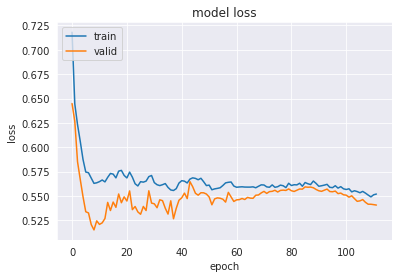

In [20]:
if nas:
    for trial in history: 
        print(trial.summary())
        
    writepath_nas = './results_nas.csv'

    if different_eval_data:
        flat_config = flatten_dict(config_train)
    else:
        flat_config = flatten_dict(config)    

    if not os.path.exists(writepath_nas):
        with open(writepath_nas, 'w+') as text_file:       
            for key in flat_config.keys():
                text_file.write(key)
                text_file.write(';')         

            for hp in history[0].hyperparameters.values.keys():
                text_file.write(hp + ';')    
               
            text_file.write('score')
            
            text_file.write('\n')

    with open(writepath_nas, 'a+') as text_file:  
        for value in flat_config.values():
            text_file.write(str(value))
            text_file.write(';')

        for hp, value in history[0].hyperparameters.values.items():
            text_file.write(str(value) + ';')        

        
        text_file.write(str(history[0].score))
            
        text_file.write('\n')            

        text_file.close()      
        
else:
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')    

In [21]:
if False:
    index = 0
    lambda_net = lambda_net_dataset_train.lambda_net_list[index]
    
    lambda_net_model = network_parameters_to_network(lambda_net.network_parameters, config)
    lambda_net_model_preds = lambda_net_model.predict(lambda_net.X_train_lambda)
    dt_train_data = DecisionTreeClassifier(max_depth=3)
    dt_train_data.fit(lambda_net.X_train_lambda, np.round(lambda_net_model_preds))
    
    random_data = np.random.uniform(0, 1, lambda_net.X_train_lambda.shape)
    lambda_net_model_preds_random = lambda_net_model.predict(random_data)
    dt_random_data = DecisionTreeClassifier(max_depth=3)
    dt_random_data.fit(random_data, np.round(lambda_net_model_preds_random))
    
    plot_decision_area_evaluation(lambda_net.X_train_lambda, 
                                lambda_net.y_train_lambda.flatten(), 
                                lambda_net.X_test_lambda, 
                                lambda_net.y_test_lambda.flatten(),
                                random_data,
                                lambda_net_model_preds_random.flatten(),                                   
                                lambda_net_model,
                                dt_train_data,
                                dt_random_data,
                                dt_random_data,
                                dt_random_data,
                                model.predict(np.array([lambda_net.network_parameters]))[0],
                                np.array([str(i) for i in range(lambda_net.X_train_lambda.shape[1])]),
                                config
                               )

    index = 0
    lambda_net = lambda_net_dataset_valid.lambda_net_list[index]
    
    lambda_net_model = network_parameters_to_network(lambda_net.network_parameters, config)
    lambda_net_model_preds = lambda_net_model.predict(lambda_net.X_train_lambda)
    dt_train_data = DecisionTreeClassifier(max_depth=3)
    dt_train_data.fit(lambda_net.X_train_lambda, np.round(lambda_net_model_preds))
    
    random_data = np.random.uniform(0, 1, lambda_net.X_train_lambda.shape)
    lambda_net_model_preds_random = lambda_net_model.predict(random_data)
    dt_random_data = DecisionTreeClassifier(max_depth=3)
    dt_random_data.fit(random_data, np.round(lambda_net_model_preds_random))
    
    plot_decision_area_evaluation(lambda_net.X_train_lambda, 
                                lambda_net.y_train_lambda.flatten(), 
                                lambda_net.X_test_lambda, 
                                lambda_net.y_test_lambda.flatten(),
                                random_data,
                                lambda_net_model_preds_random.flatten(), 
                                lambda_net_model,
                                dt_train_data,
                                dt_random_data,
                                dt_random_data,
                                dt_random_data,
                                model.predict(np.array([lambda_net.network_parameters]))[0],
                                np.array([str(i) for i in range(lambda_net.X_train_lambda.shape[1])]),
                                config
                               )    

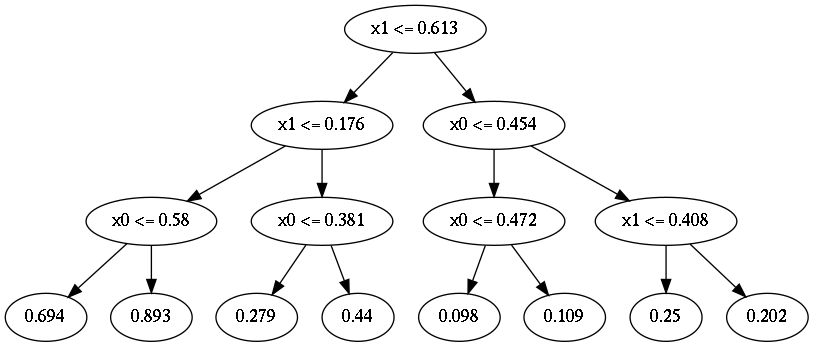

In [22]:
index = 0
if test_size > 0 and not evaluate_distribution:
    network_parameters = np.array([lambda_net_dataset_test.network_parameters_array[index]])
else:
    network_parameters = np.array([lambda_net_dataset_valid.network_parameters_array[index]])
    
if config['i_net']['data_reshape_version'] == 1 or config['i_net']['data_reshape_version'] == 2:
    network_parameters, network_parameters_flat = restructure_data_cnn_lstm(network_parameters, config, subsequences=None)
elif config['i_net']['data_reshape_version'] == 3: #autoencoder
    encoder_model = load_encoder_model(config)
    network_parameters, network_parameters_flat, _ = autoencode_data(network_parameters, config, encoder_model)    
dt_parameters = model.predict(network_parameters)[0]

if config['function_family']['dt_type'] == 'vanilla':
    image, nodes = anytree_decision_tree_from_parameters(dt_parameters, config=config)
else:
    tree = generate_random_decision_tree(config)
    tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
    image = tree.plot_tree()
image

In [23]:
image = None
if not function_value_loss:
    if test_size > 0 and not evaluate_distribution:
        dt_parameters = y_test[index][:-2 ** config['function_family']['maximum_depth'] ]
    else:
        dt_parameters = y_valid[index][:-2 ** config['function_family']['maximum_depth'] ]

    image, nodes = anytree_decision_tree_from_parameters(dt_parameters, config=config)
image

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 513)]        0           []                               
                                                                                                  
 hidden1_1792 (Dense)           (None, 1792)         921088      ['input[0][0]']                  
                                                                                                  
 activation1_sigmoid (Activatio  (None, 1792)        0           ['hidden1_1792[0][0]']           
 n)                                                                                               
                                                                                                  
 hidden2_512 (Dense)            (None, 512)          918016      ['activation1_sigmoid[0][0]']

    Normal: This is useful for looking at means and other linear combinations (e.g. regression coefficients) because of the CLT. Related to that is if something is known to arise due to additive effects of many different small causes then the normal may be a reasonable distribution: for example, many biological measures are the result of multiple genes and multiple environmental factors and therefor are often approximately normal.

    Gamma: Right skewed and useful for things with a natural minimum at 0. Commonly used for elapsed times and some financial variables.

    Exponential: special case of the Gamma. It is memoryless and scales easily.

    Chi-squared (𝜒2): special case of the Gamma. Arises as sum of squared normal variables (so used for variances).

    Beta: Defined between 0 and 1 (but could be transformed to be between other values), useful for proportions or other quantities that must be between 0 and 1.

    Binomial: How many "successes" out of a given number of independent trials with same probability of "success".

    Poisson: Common for counts. Nice properties that if the number of events in a period of time or area follows a Poisson, then the number in twice the time or area still follows the Poisson (with twice the mean): this works for adding Poissons or scaling with values other than 2.

    Note that if events occur over time and the time between occurrences follows an exponential then the number that occur in a time period follows a Poisson.

    Negative Binomial: Counts with minimum 0 (or other value depending on which version) and no upper bound. Conceptually it is the number of "failures" before k "successes". The negative binomial is also a mixture of Poisson variables whose means come from a gamma distribution.

    Geometric: special case for negative binomial where it is the number of "failures" before the 1st "success". If you truncate (round down) an exponential variable to make it discrete, the result is geometric.

## Train & Valid Data Evaluation

In [25]:

mean_train_parameters = np.round(np.mean(lambda_net_dataset_train.network_parameters_array, axis=0), 5)
std_train_parameters = np.round(np.std(lambda_net_dataset_train.network_parameters_array, axis=0), 5)

(inet_evaluation_result_dict_train, 
 inet_evaluation_result_dict_mean_train, 
 dt_distilled_list_train,
 distances_dict) = evaluate_interpretation_net_synthetic_data(lambda_net_dataset_train.network_parameters_array, 
                                                               lambda_net_dataset_train.X_test_lambda_array,
                                                               model,
                                                               config,
                                                               identifier='train',
                                                               mean_train_parameters=mean_train_parameters,
                                                               std_train_parameters=std_train_parameters,
                                                               network_parameters_train_array=lambda_net_dataset_train.network_parameters_array)


(inet_evaluation_result_dict_valid, 
 inet_evaluation_result_dict_mean_valid, 
 dt_distilled_list_valid,
 distances_dict) = evaluate_interpretation_net_synthetic_data(lambda_net_dataset_valid.network_parameters_array, 
                                                               lambda_net_dataset_valid.X_test_lambda_array,
                                                               model,
                                                               config,
                                                               identifier='valid',
                                                               mean_train_parameters=mean_train_parameters,
                                                               std_train_parameters=std_train_parameters,
                                                               network_parameters_train_array=lambda_net_dataset_train.network_parameters_array,
                                                               distances_dict=distances_dict)

[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  24 tasks      | elapsed:   21.5s
[Parallel(n_jobs=13)]: Done  50 out of  50 | elapsed:   51.7s finished


  0%|          | 0/50 [00:00<?, ?it/s]

[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  24 tasks      | elapsed:    5.5s
[Parallel(n_jobs=13)]: Done  50 out of  50 | elapsed:   31.2s finished


  0%|          | 0/50 [00:00<?, ?it/s]

## Test Data Evaluation (+ Distribution Evaluation)

In [26]:
%load_ext autoreload
%autoreload 2
#set_loky_pickler('pickle')

In [27]:
#config['computation']['n_jobs'] = 60
#config['i_net']['test_size'] = 1000

In [28]:
if evaluate_distribution and test_size > 0:
    
    (distances_dict, 
     inet_evaluation_result_dict_test, 
     inet_evaluation_result_dict_complete_by_distribution_test,
     inet_evaluation_result_dict_mean_test,
     inet_evaluation_result_dict_mean_by_distribution_test,
     inet_evaluation_results_test, 
     dt_inet_list_test, 
     dt_distilled_list_test, 
     data_dict_list_test, 
     normalizer_list_list_test,
     test_network_list_distrib,
     model_history_list,
     distribution_parameter_list_list) = distribution_evaluation_interpretation_net_synthetic_data(loss_function, 
                                                                                            metrics,
                                                                                            #model,
                                                                                           config,
                                                                                           distribution_list_evaluation = config['data']['distribution_list_eval'],#['uniform', 'normal', 'gamma', 'exponential', 'beta', 'binomial', 'poisson'],
                                                                                           identifier='test',
                                                                                           lambda_net_parameters_train=lambda_net_dataset_train.network_parameters_array,
                                                                                           mean_train_parameters=mean_train_parameters,
                                                                                           std_train_parameters=std_train_parameters,
                                                                                           distances_dict=distances_dict,
                                                                                           max_distributions_per_class=max_distributions_per_class,#max_distributions_per_class,
                                                                                           flip_percentage=noise_injected_level, #0.1,#
                                                                                           data_noise=data_noise, #0.1,#
                                                                                           random_parameters = random_parameters_distribution, #random_parameters_distribution
                                                                                           verbose=0,
                                                                                           backend='loky',#sequential
                                                                                    )
else:
    (inet_evaluation_result_dict_test, 
     inet_evaluation_result_dict_mean_test, 
     dt_distilled_list_test,
     distances_dict) = evaluate_interpretation_net_synthetic_data(lambda_net_dataset_test.network_parameters_array, 
                                                                   lambda_net_dataset_test.X_test_lambda_array,
                                                                   model,
                                                                   config,
                                                                   identifier='test',
                                                                   mean_train_parameters=mean_train_parameters,
                                                                   std_train_parameters=std_train_parameters,
                                                                   network_parameters_train_array=lambda_net_dataset_train.network_parameters_array,
                                                                   distances_dict=distances_dict)
    
    print_results_synthetic_evaluation(inet_evaluation_result_dict_mean_train, 
                                       inet_evaluation_result_dict_mean_valid, 
                                       inet_evaluation_result_dict_mean_test, 
                                       distances_dict)    

[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done   6 tasks      | elapsed:   47.5s
[Parallel(n_jobs=13)]: Done 102 tasks      | elapsed:  8.9min
[Parallel(n_jobs=13)]: Done 262 tasks      | elapsed: 22.4min
[Parallel(n_jobs=13)]: Done 486 tasks      | elapsed: 39.7min
[Parallel(n_jobs=13)]: Done 774 tasks      | elapsed: 64.7min
[Parallel(n_jobs=13)]: Done 1000 out of 1000 | elapsed: 84.2min finished


In [29]:
if evaluate_distribution and test_size > 0:
    #print(distribution_parameter_list_list[0])
    #print(lambda_net_dataset_valid.distribution_dict_list_list[0])

    inet_performance_distrib_evaluation = np.array(inet_evaluation_result_dict_complete_by_distribution_test[list(inet_evaluation_result_dict_complete_by_distribution_test.keys())[0]]['inet_scores']['accuracy'])
    print('I-Net Performance by Network: ', inet_performance_distrib_evaluation)

    mean_random_performance_distrib_evaluation = np.mean(np.array([inet_evaluation_result_dict_complete_by_distribution_test[str(distrib)]['dt_scores']['accuracy'] for distrib in config['data']['distribution_list_eval']]), axis=0)
    print('Distilled Mean Performance by Network: ', mean_random_performance_distrib_evaluation)

    max_random_performance_distrib_evaluation = np.max(np.array([inet_evaluation_result_dict_complete_by_distribution_test[str(distrib)]['dt_scores']['accuracy'] for distrib in config['data']['distribution_list_eval']]), axis=0)
    print('Distilled Max Performance by Network: ', max_random_performance_distrib_evaluation)

    print('Median I-Net:', np.median(inet_evaluation_result_dict_complete_by_distribution_test[list(inet_evaluation_result_dict_complete_by_distribution_test.keys())[0]]['inet_scores']['accuracy']))
    print('Median DT Distilled:', np.median(np.median(np.array([inet_evaluation_result_dict_complete_by_distribution_test[str(distrib)]['dt_scores']['accuracy'] for distrib in config['data']['distribution_list_eval']]), axis=0)))#np.median(inet_evaluation_result_dict_complete_by_distribution_test['uniform']['dt_scores']['accuracy']))

    complete_distribution_evaluation_results = get_complete_distribution_evaluation_results_dataframe(inet_evaluation_result_dict_mean_by_distribution_test)
    display(complete_distribution_evaluation_results.head(20))
    
    network_distances = get_print_network_distances_dataframe(distances_dict)
    display(network_distances.head(20))

I-Net Performance by Network:  [0.812 0.744 1.    ... 0.784 0.488 0.58 ]
Distilled Mean Performance by Network:  [0.936 0.79  1.    ... 1.    0.978 0.932]
Distilled Max Performance by Network:  [0.936 0.79  1.    ... 1.    0.978 0.932]
Median I-Net: 0.758
Median DT Distilled: 0.96


Acc Distilled Train Data  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                     0.977   

                                                   Acc Distilled Data Random  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                      0.988   

                                                   Acc Distilled  Acc I-Net  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']          0.915      0.754   

                                                   Soft BC Distilled Train Data  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                         0.599   

                                                   Soft BC Distilled Data Random  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                          0.494   

                                                   Soft BC Distilled  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']              0.607   

                                                   Soft BC I-Net  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']          0.655   

                                                   BC Distilled Train Data  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                    0.084   

                                                   BC Distilled Data Random  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                     0.035   

                                                   BC Distilled  BC I-Net  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']         0.439     0.511   

                                                   F1 Score Distilled Train Data  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                          0.977   

                                                   F1 Score Distilled Data Random  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                           0.988   

                                                   F1 Score Distilled  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']               0.908   

                                                   F1 Score I-Net  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']           0.712   

                                                   ROC AUC Score Distilled Train Data  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                               0.987   

                                                   ROC AUC Score Distilled Data Random  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                                0.993   

                                                   ROC AUC Score Distilled  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                    0.934   

                                                   ROC AUC Score I-Net  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                0.770   

                                                   Runtime Distilled Train Data  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                         0.011   

                                                   Runtime Distilled Data Random  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']                          0.011   

                                                   Runtime Distilled  \
['uniform', 'normal', 'gamma', 'beta', 'poisson']              0.011   

                                                   Runtime I-Net  
['uniform', 'normal', 'gamma', 'beta', 'poisson']          0.763

Average Z-Score (Sample to Train Data)  \
train                                 217.278   
valid                                 231.446   
test                                  227.189   

       Average Distance to Initialization  \
train                              92.099   
valid                             101.146   
test                               99.279   

       Average Mean Distance to Train Data  \
train                              143.633   
valid                              149.109   
test                               149.719   

       Average Distance to closest Train Data Sample  \
train                                          0.000   
valid                                         49.145   
test                                          33.585   

       Average Biggest Distance for Single Neuron  \
train                                       4.123   
valid                                       4.417   
test                                        4.337   

       Minimum Biggest Distance for Single Neuron  
train                                       0.000  
valid                                       1.532  
test                                        1.542

In [30]:
#%load_ext autoreload
#%autoreload 2

Index:  569
Feature 1:  Samples 288 / 4712
	 Distribution 1: poisson
		 lam: 4.828
	 Distribution 2: poisson
		 lam: 0.433
Feature 2:  Samples 2882 / 2118
	 Distribution 1: poisson
		 lam: 0.986
	 Distribution 2: poisson
		 lam: 2.324
Considered Columns:								 0   1
Performance Network:								 0.704
Fidelity DT Sklearn Train Data:							 1.0
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.998
Fidelity DT Sklearn Uniform Data:						 0.486
Fidelity DT Sklearn Normal Data:						 0.462
Fidelity DT I-Net:								 0.99


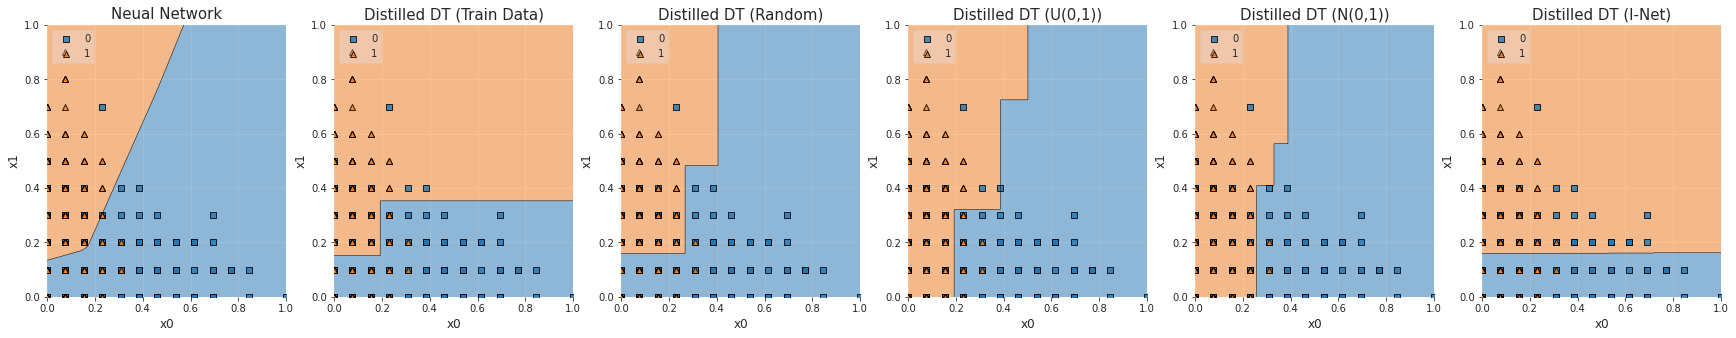

-----------------------------------------------------
Index:  581
Feature 1:  Samples 702 / 4298
	 Distribution 1: normal
		 loc: 3.419
		 scale: 2.527
	 Distribution 2: normal
		 loc: 1.515
		 scale: 0.032
Feature 2:  Samples 4368 / 632
	 Distribution 1: poisson
		 lam: 2.77
	 Distribution 2: poisson
		 lam: 4.648
Considered Columns:								 0   1
Performance Network:								 0.644
Fidelity DT Sklearn Train Data:							 0.982
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.98
Fidelity DT Sklearn Uniform Data:						 0.262
Fidelity DT Sklearn Normal Data:						 0.342
Fidelity DT I-Net:								 0.86


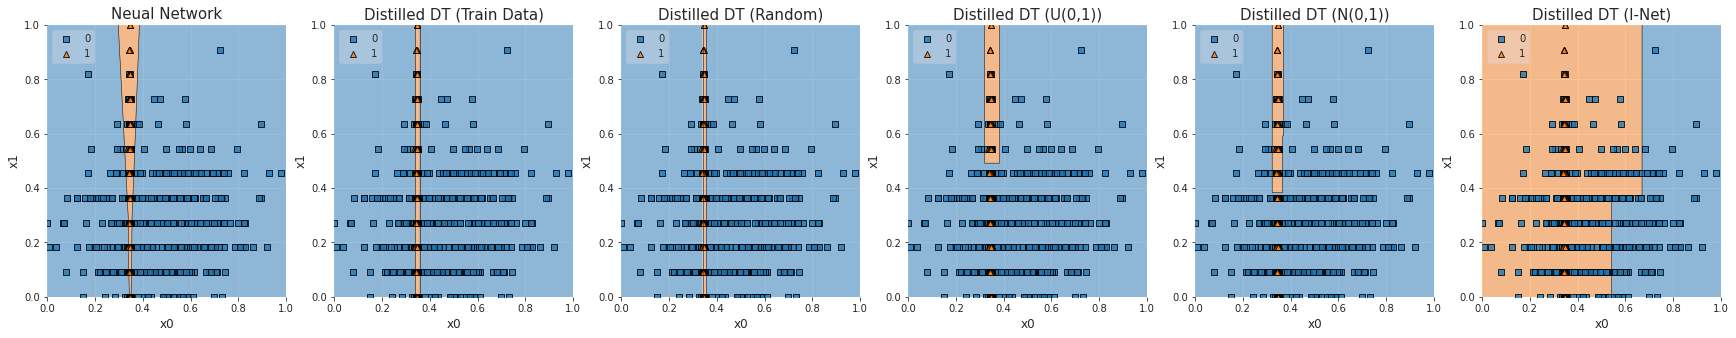

-----------------------------------------------------
Index:  278
Feature 1:  Samples 4257 / 743
	 Distribution 1: gamma
		 shape: 1.417
		 scale: 0.128
	 Distribution 2: gamma
		 shape: 3.332
		 scale: 2.923
Feature 2:  Samples 4171 / 829
	 Distribution 1: uniform
		 low: 0.608
		 high: 2.005
	 Distribution 2: uniform
		 low: 0.882
		 high: 4.566
Considered Columns:								 0   1
Performance Network:								 0.654
Fidelity DT Sklearn Train Data:							 0.994
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.836
Fidelity DT Sklearn Uniform Data:						 0.926
Fidelity DT Sklearn Normal Data:						 0.136
Fidelity DT I-Net:								 0.956


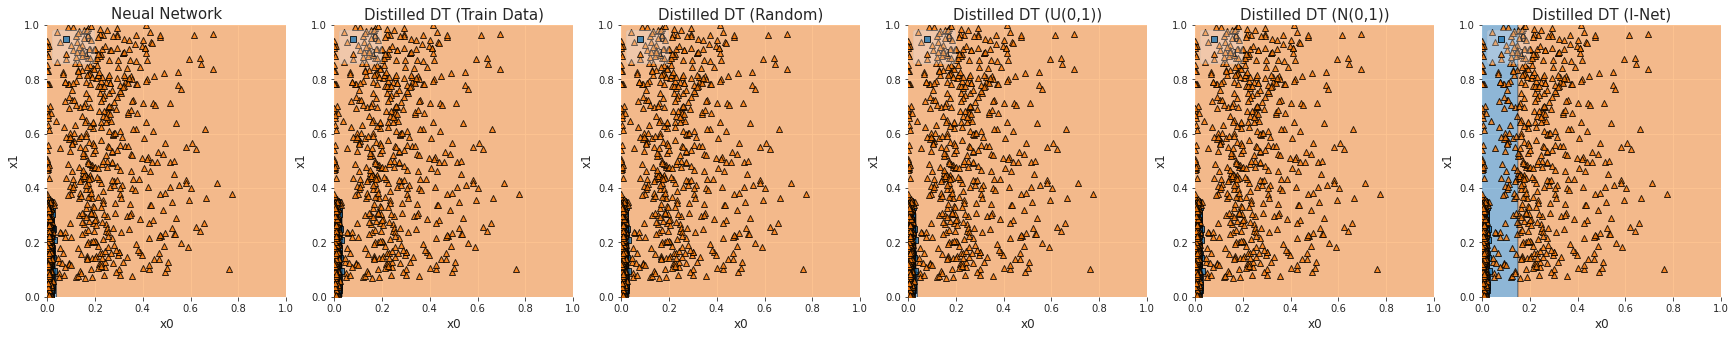

-----------------------------------------------------
Index:  949
Feature 1:  Samples 583 / 4417
	 Distribution 1: gamma
		 shape: 1.436
		 scale: 1.795
	 Distribution 2: gamma
		 shape: 0.149
		 scale: 3.031
Feature 2:  Samples 4088 / 912
	 Distribution 1: poisson
		 lam: 4.436
	 Distribution 2: poisson
		 lam: 3.15
Considered Columns:								 0   1
Performance Network:								 0.57
Fidelity DT Sklearn Train Data:							 0.938
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.48
Fidelity DT Sklearn Uniform Data:						 0.482
Fidelity DT Sklearn Normal Data:						 0.482
Fidelity DT I-Net:								 0.784


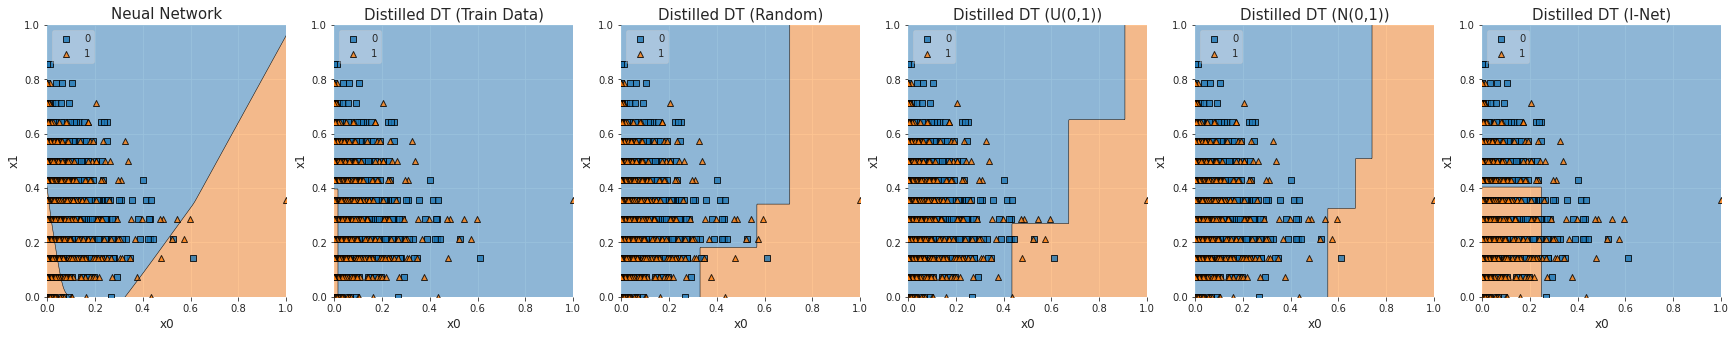

-----------------------------------------------------
Index:  948
Feature 1:  Samples 4906 / 94
	 Distribution 1: uniform
		 low: 0.263
		 high: 1.26
	 Distribution 2: uniform
		 low: 0.98
		 high: 3.703
Feature 2:  Samples 3634 / 1366
	 Distribution 1: beta
		 a: 1.65
		 b: 0.875
	 Distribution 2: beta
		 a: 3.935
		 b: 0.919
Considered Columns:								 0   1
Performance Network:								 0.576
Fidelity DT Sklearn Train Data:							 0.974
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.474
Fidelity DT Sklearn Uniform Data:						 0.958
Fidelity DT Sklearn Normal Data:						 0.474
Fidelity DT I-Net:								 0.92


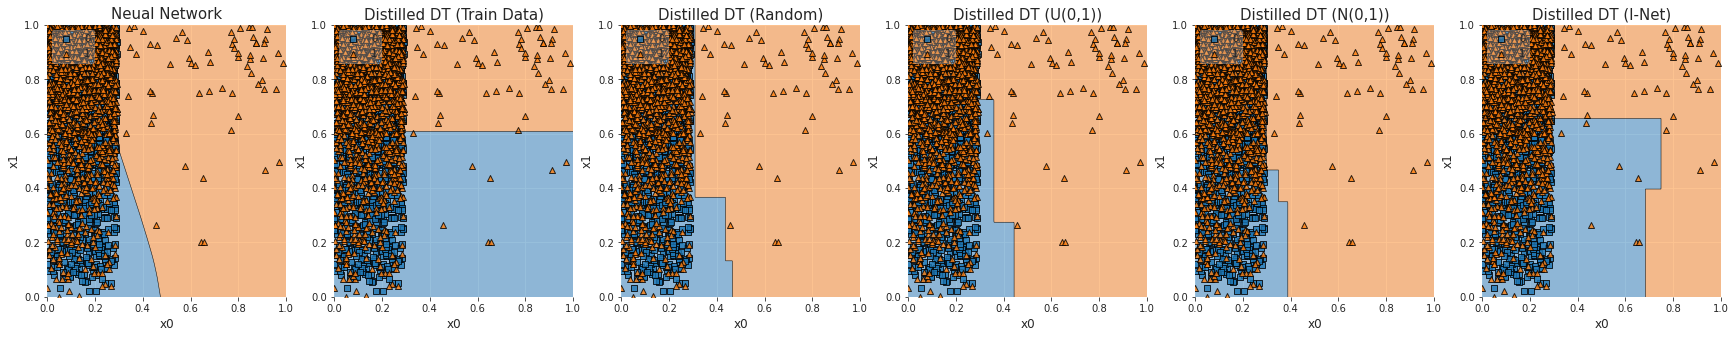

-----------------------------------------------------
Index:  966
Feature 1:  Samples 2359 / 2641
	 Distribution 1: poisson
		 lam: 4.97
	 Distribution 2: poisson
		 lam: 2.335
Feature 2:  Samples 3114 / 1886
	 Distribution 1: gamma
		 shape: 2.589
		 scale: 0.747
	 Distribution 2: gamma
		 shape: 1.29
		 scale: 3.729
Considered Columns:								 0   1
Performance Network:								 0.726
Fidelity DT Sklearn Train Data:							 0.962
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.626
Fidelity DT Sklearn Uniform Data:						 0.754
Fidelity DT Sklearn Normal Data:						 0.666
Fidelity DT I-Net:								 0.922


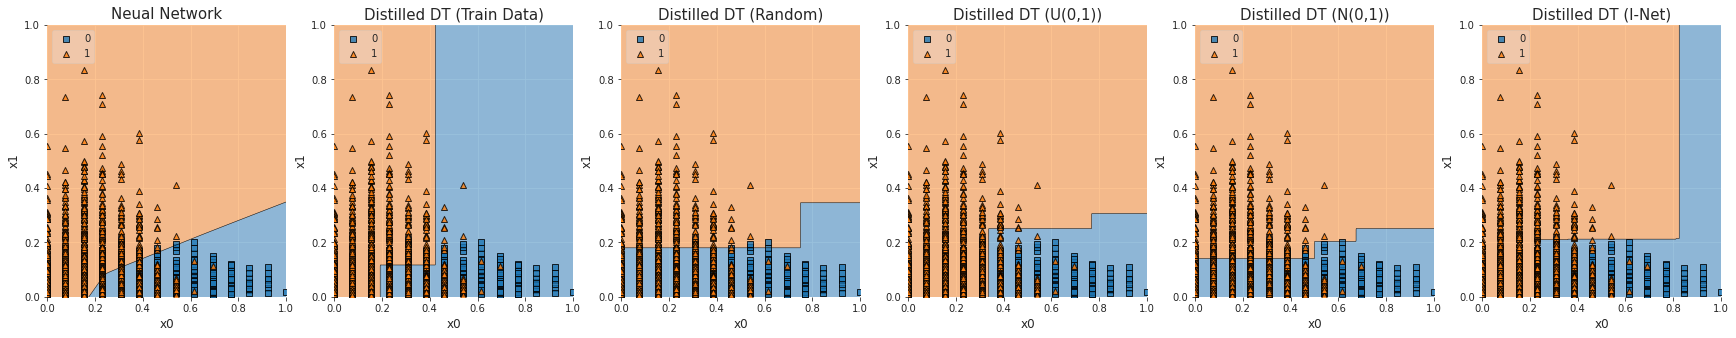

-----------------------------------------------------
Index:  67
Feature 1:  Samples 2884 / 2116
	 Distribution 1: gamma
		 shape: 3.054
		 scale: 1.482
	 Distribution 2: gamma
		 shape: 2.165
		 scale: 2.316
Feature 2:  Samples 4531 / 469
	 Distribution 1: uniform
		 low: 0.741
		 high: 0.766
	 Distribution 2: uniform
		 low: 2.353
		 high: 2.708
Considered Columns:								 0   1
Performance Network:								 0.632
Fidelity DT Sklearn Train Data:							 0.994
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.994
Fidelity DT Sklearn Uniform Data:						 0.924
Fidelity DT Sklearn Normal Data:						 0.178
Fidelity DT I-Net:								 0.91


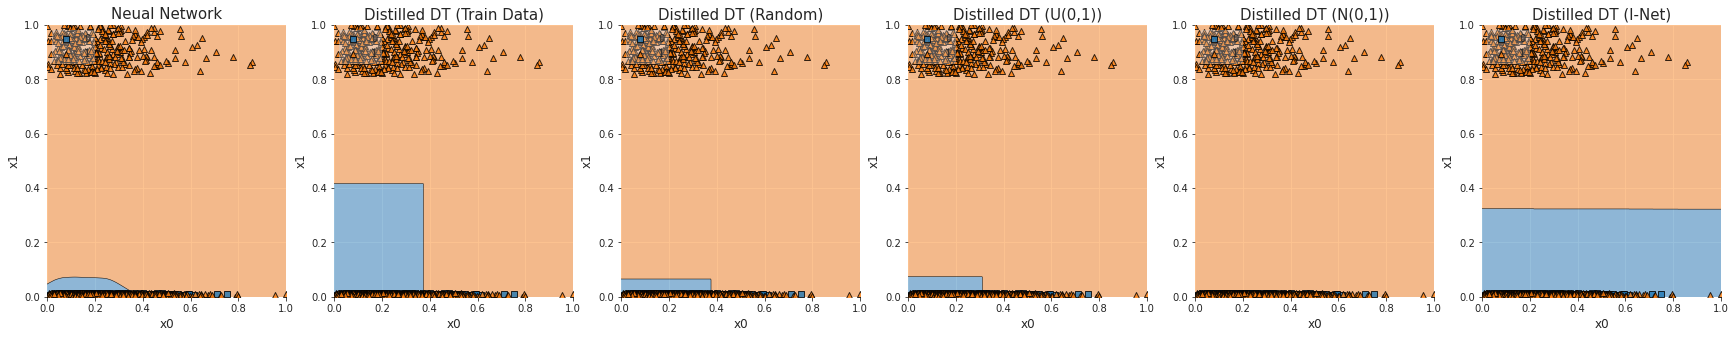

-----------------------------------------------------
Index:  346
Feature 1:  Samples 4885 / 115
	 Distribution 1: beta
		 a: 0.345
		 b: 4.179
	 Distribution 2: beta
		 a: 1.72
		 b: 3.009
Feature 2:  Samples 1111 / 3889
	 Distribution 1: gamma
		 shape: 4.118
		 scale: 1.744
	 Distribution 2: gamma
		 shape: 2.564
		 scale: 2.199
Considered Columns:								 0   1
Performance Network:								 0.568
Fidelity DT Sklearn Train Data:							 0.976
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.624
Fidelity DT Sklearn Uniform Data:						 0.894
Fidelity DT Sklearn Normal Data:						 0.626
Fidelity DT I-Net:								 0.924


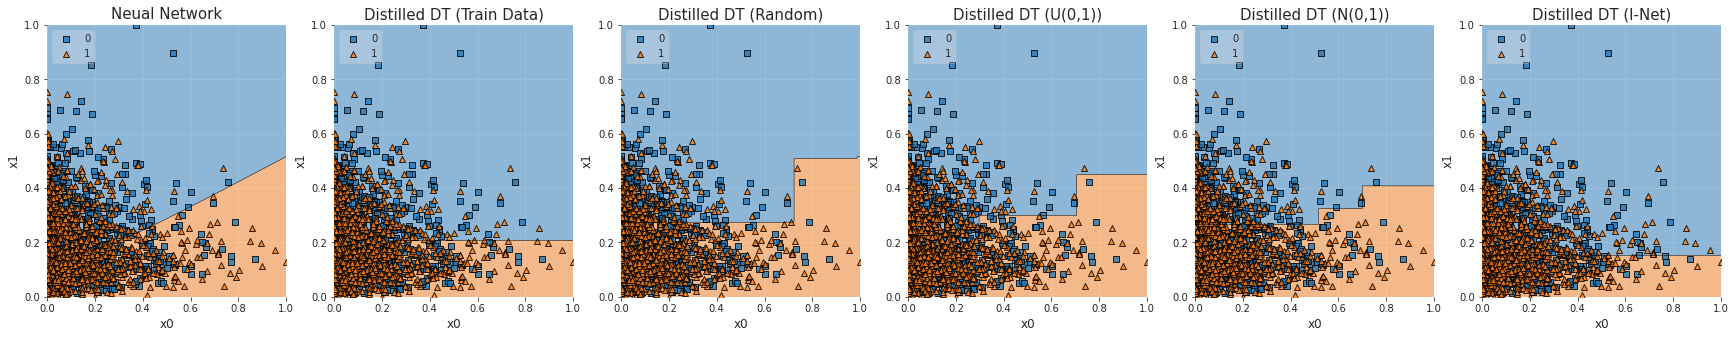

-----------------------------------------------------
Index:  750
Feature 1:  Samples 937 / 4063
	 Distribution 1: poisson
		 lam: 4.438
	 Distribution 2: poisson
		 lam: 0.829
Feature 2:  Samples 1539 / 3461
	 Distribution 1: poisson
		 lam: 2.727
	 Distribution 2: poisson
		 lam: 0.141
Considered Columns:								 0   1
Performance Network:								 0.764
Fidelity DT Sklearn Train Data:							 1.0
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.91
Fidelity DT Sklearn Uniform Data:						 0.994
Fidelity DT Sklearn Normal Data:						 0.318
Fidelity DT I-Net:								 0.94


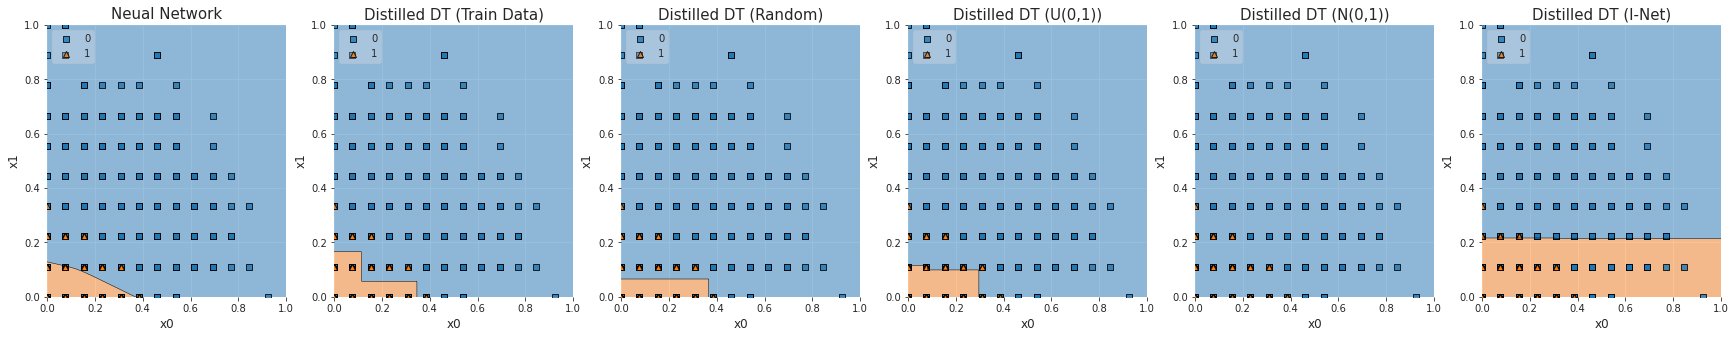

-----------------------------------------------------
Index:  983
Feature 1:  Samples 1787 / 3213
	 Distribution 1: gamma
		 shape: 4.237
		 scale: 1.087
	 Distribution 2: gamma
		 shape: 2.649
		 scale: 4.095
Feature 2:  Samples 2880 / 2120
	 Distribution 1: uniform
		 low: 2.698
		 high: 2.733
	 Distribution 2: uniform
		 low: 3.21
		 high: 3.408
Considered Columns:								 0   1
Performance Network:								 0.914
Fidelity DT Sklearn Train Data:							 1.0
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.998
Fidelity DT Sklearn Uniform Data:						 0.992
Fidelity DT Sklearn Normal Data:						 0.4
Fidelity DT I-Net:								 0.992


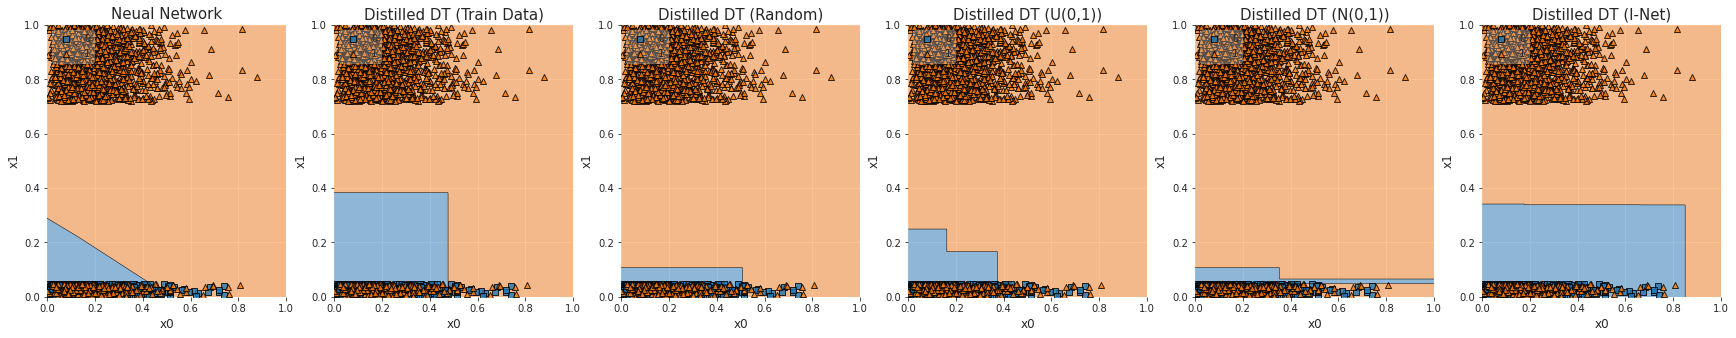

-----------------------------------------------------
Index:  701
Feature 1:  Samples 1511 / 3489
	 Distribution 1: poisson
		 lam: 4.107
	 Distribution 2: poisson
		 lam: 0.383
Feature 2:  Samples 4670 / 330
	 Distribution 1: normal
		 loc: 1.556
		 scale: 0.005
	 Distribution 2: normal
		 loc: 1.827
		 scale: 1.952
Considered Columns:								 0   1
Performance Network:								 0.754
Fidelity DT Sklearn Train Data:							 0.998
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.858
Fidelity DT Sklearn Uniform Data:						 0.78
Fidelity DT Sklearn Normal Data:						 0.374
Fidelity DT I-Net:								 0.858


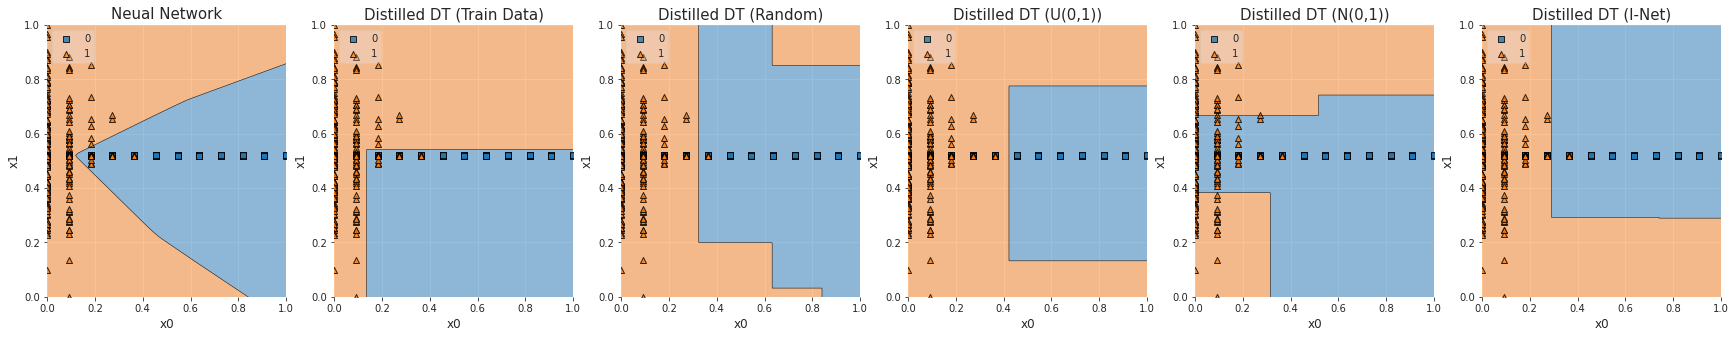

-----------------------------------------------------
Index:  534
Feature 1:  Samples 129 / 4871
	 Distribution 1: uniform
		 low: 1.811
		 high: 3.735
	 Distribution 2: uniform
		 low: 0.846
		 high: 1.601
Feature 2:  Samples 1022 / 3978
	 Distribution 1: gamma
		 shape: 3.69
		 scale: 4.654
	 Distribution 2: gamma
		 shape: 1.83
		 scale: 2.717
Considered Columns:								 0   1
Performance Network:								 0.658
Fidelity DT Sklearn Train Data:							 0.982
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.818
Fidelity DT Sklearn Uniform Data:						 0.978
Fidelity DT Sklearn Normal Data:						 0.58
Fidelity DT I-Net:								 0.978


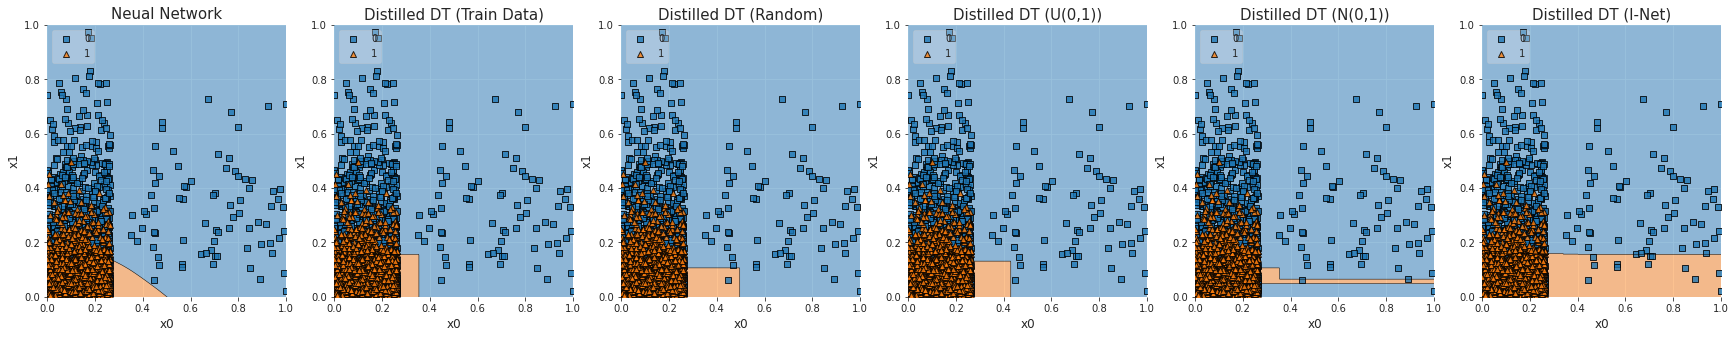

-----------------------------------------------------
Index:  425
Feature 1:  Samples 1166 / 3834
	 Distribution 1: gamma
		 shape: 3.384
		 scale: 3.455
	 Distribution 2: gamma
		 shape: 4.568
		 scale: 0.331
Feature 2:  Samples 1023 / 3977
	 Distribution 1: gamma
		 shape: 3.935
		 scale: 4.888
	 Distribution 2: gamma
		 shape: 0.38
		 scale: 4.172
Considered Columns:								 0   1
Performance Network:								 0.732
Fidelity DT Sklearn Train Data:							 0.988
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.984
Fidelity DT Sklearn Uniform Data:						 0.984
Fidelity DT Sklearn Normal Data:						 0.27
Fidelity DT I-Net:								 0.91


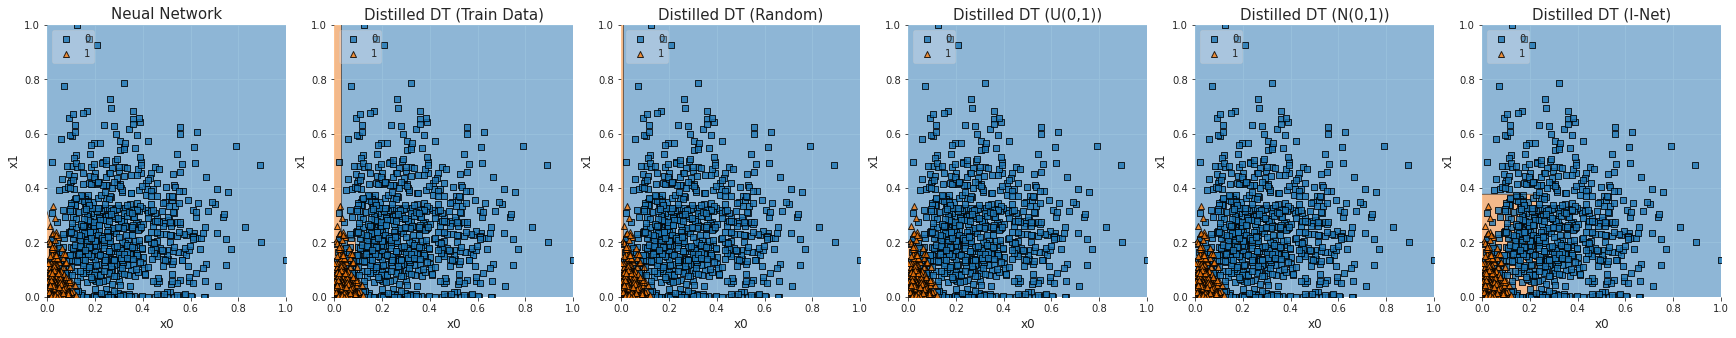

-----------------------------------------------------
Index:  76
Feature 1:  Samples 2722 / 2278
	 Distribution 1: uniform
		 low: 3.211
		 high: 4.596
	 Distribution 2: uniform
		 low: 2.855
		 high: 4.512
Feature 2:  Samples 1078 / 3922
	 Distribution 1: uniform
		 low: 2.539
		 high: 3.153
	 Distribution 2: uniform
		 low: 3.873
		 high: 3.95
Considered Columns:								 0   1
Performance Network:								 0.726
Fidelity DT Sklearn Train Data:							 0.998
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.644
Fidelity DT Sklearn Uniform Data:						 0.99
Fidelity DT Sklearn Normal Data:						 0.716
Fidelity DT I-Net:								 0.94


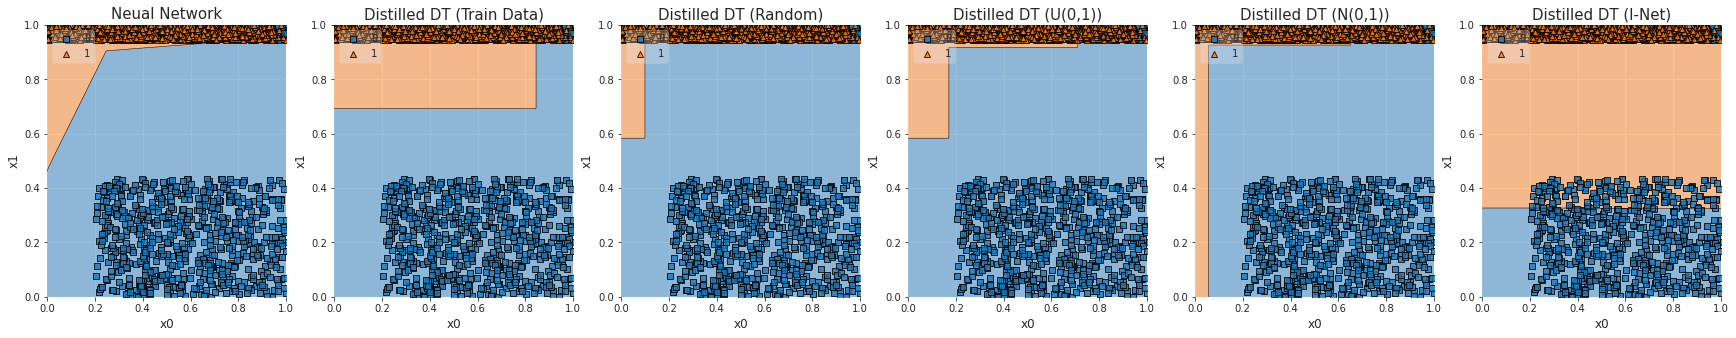

-----------------------------------------------------
Index:  451
Feature 1:  Samples 4640 / 360
	 Distribution 1: poisson
		 lam: 1.134
	 Distribution 2: poisson
		 lam: 2.774
Feature 2:  Samples 1571 / 3429
	 Distribution 1: beta
		 a: 2.858
		 b: 2.717
	 Distribution 2: beta
		 a: 3.906
		 b: 1.233
Considered Columns:								 0   1
Performance Network:								 0.654
Fidelity DT Sklearn Train Data:							 0.982
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.636
Fidelity DT Sklearn Uniform Data:						 0.928
Fidelity DT Sklearn Normal Data:						 0.79
Fidelity DT I-Net:								 0.932


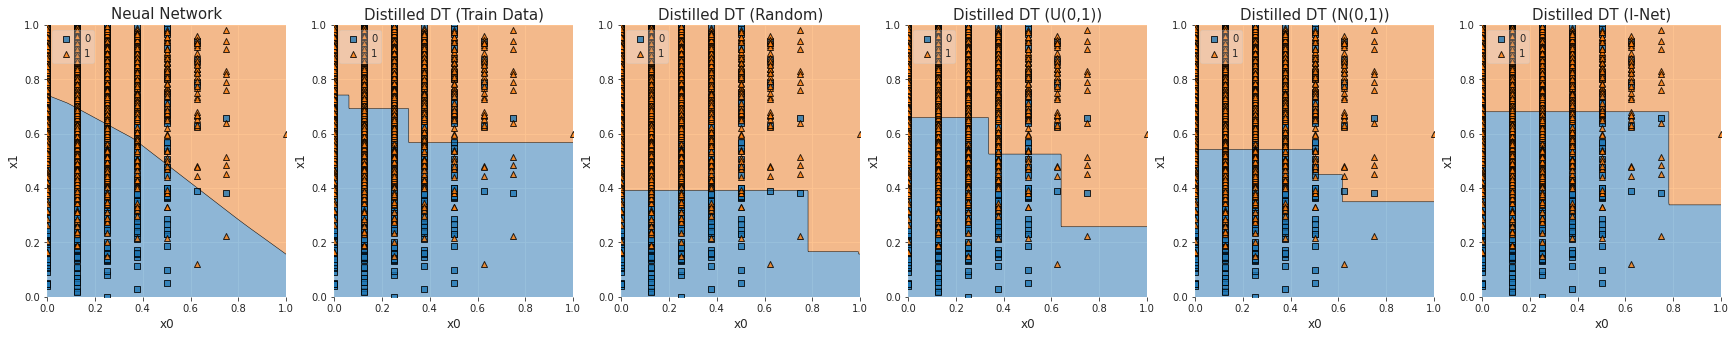

-----------------------------------------------------
Index:  955
Feature 1:  Samples 1892 / 3108
	 Distribution 1: poisson
		 lam: 0.864
	 Distribution 2: poisson
		 lam: 3.074
Feature 2:  Samples 3028 / 1972
	 Distribution 1: beta
		 a: 3.703
		 b: 1.411
	 Distribution 2: beta
		 a: 4.566
		 b: 0.877
Considered Columns:								 0   1
Performance Network:								 0.742
Fidelity DT Sklearn Train Data:							 0.992
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.542
Fidelity DT Sklearn Uniform Data:						 0.936
Fidelity DT Sklearn Normal Data:						 0.852
Fidelity DT I-Net:								 0.92


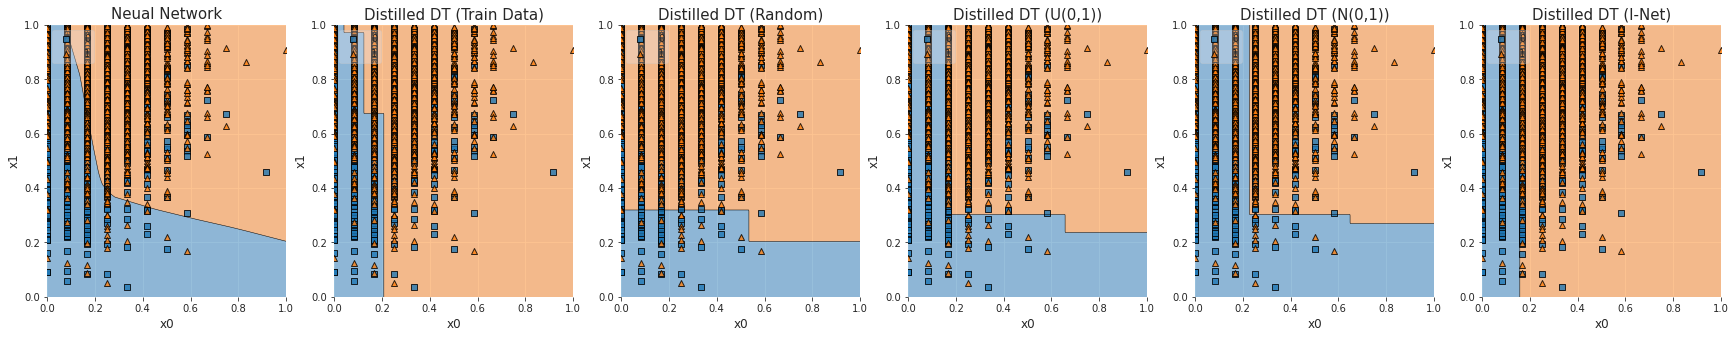

-----------------------------------------------------
Index:  723
Feature 1:  Samples 4592 / 408
	 Distribution 1: normal
		 loc: 2.208
		 scale: 2.359
	 Distribution 2: normal
		 loc: 4.765
		 scale: 4.535
Feature 2:  Samples 4360 / 640
	 Distribution 1: normal
		 loc: 2.53
		 scale: 0.701
	 Distribution 2: normal
		 loc: 1.045
		 scale: 3.342
Considered Columns:								 0   1
Performance Network:								 0.62
Fidelity DT Sklearn Train Data:							 0.944
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.878
Fidelity DT Sklearn Uniform Data:						 0.21
Fidelity DT Sklearn Normal Data:						 0.892
Fidelity DT I-Net:								 0.794


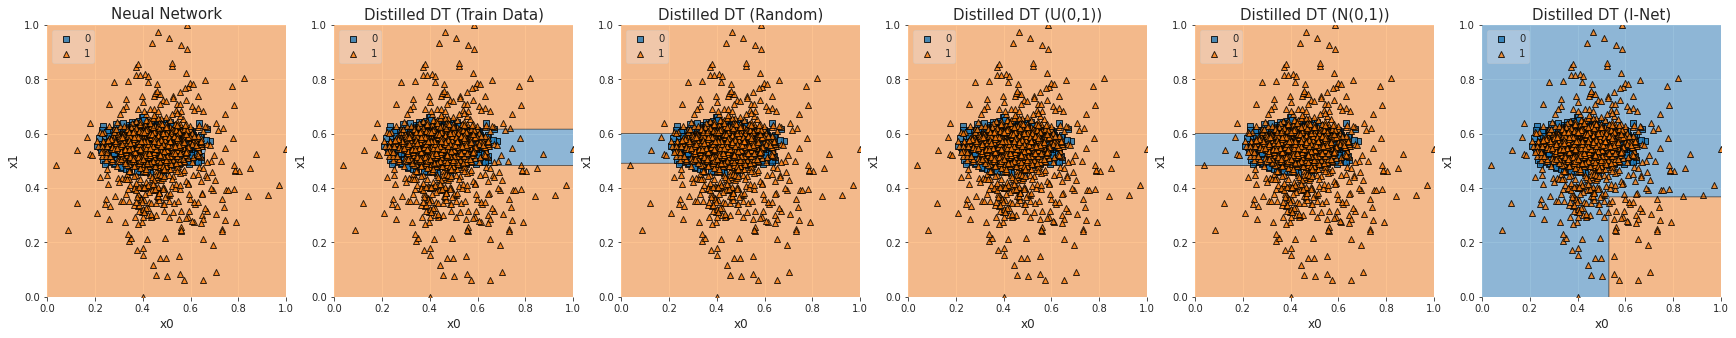

-----------------------------------------------------
Index:  952
Feature 1:  Samples 3243 / 1757
	 Distribution 1: beta
		 a: 0.047
		 b: 0.437
	 Distribution 2: beta
		 a: 1.39
		 b: 1.768
Feature 2:  Samples 2146 / 2854
	 Distribution 1: normal
		 loc: 2.997
		 scale: 0.387
	 Distribution 2: normal
		 loc: 1.521
		 scale: 0.967
Considered Columns:								 0   1
Performance Network:								 0.868
Fidelity DT Sklearn Train Data:							 0.968
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.688
Fidelity DT Sklearn Uniform Data:						 0.684
Fidelity DT Sklearn Normal Data:						 0.776
Fidelity DT I-Net:								 0.836


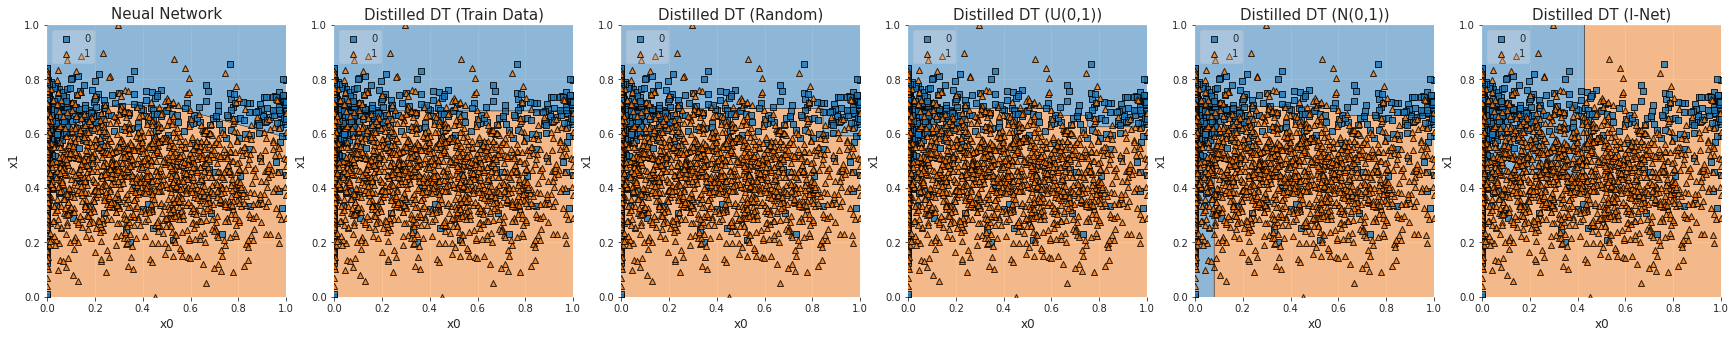

-----------------------------------------------------
Index:  376
Feature 1:  Samples 3709 / 1291
	 Distribution 1: poisson
		 lam: 0.021
	 Distribution 2: poisson
		 lam: 0.2
Feature 2:  Samples 1667 / 3333
	 Distribution 1: normal
		 loc: 3.569
		 scale: 0.613
	 Distribution 2: normal
		 loc: 2.398
		 scale: 0.693
Considered Columns:								 0   1
Performance Network:								 0.708
Fidelity DT Sklearn Train Data:							 1.0
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.698
Fidelity DT Sklearn Uniform Data:						 0.906
Fidelity DT Sklearn Normal Data:						 0.778
Fidelity DT I-Net:								 0.914


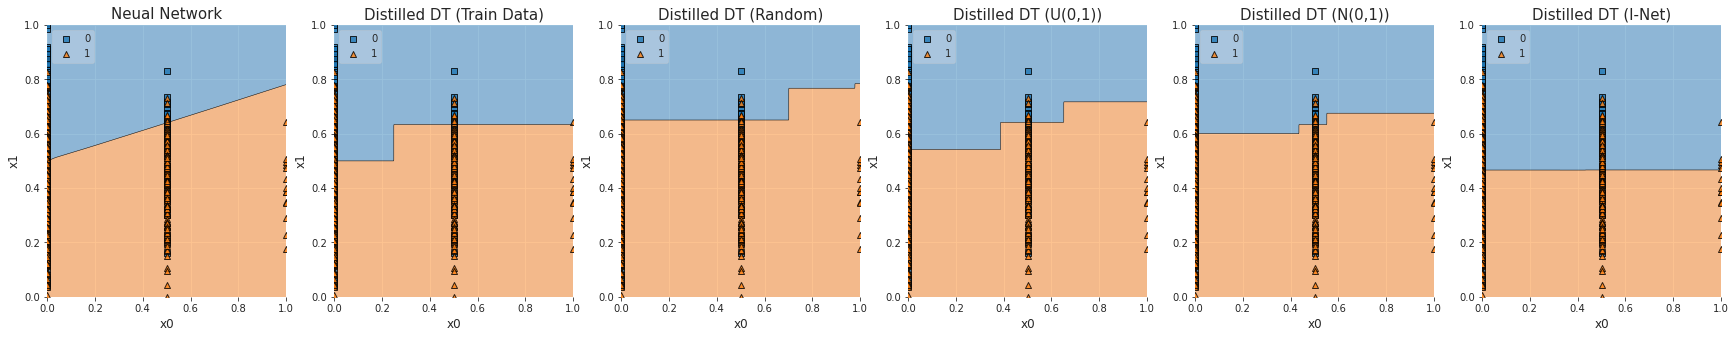

-----------------------------------------------------
Index:  557
Feature 1:  Samples 3811 / 1189
	 Distribution 1: gamma
		 shape: 4.049
		 scale: 1.23
	 Distribution 2: gamma
		 shape: 2.541
		 scale: 4.496
Feature 2:  Samples 3480 / 1520
	 Distribution 1: uniform
		 low: 0.591
		 high: 3.863
	 Distribution 2: uniform
		 low: 3.267
		 high: 4.883
Considered Columns:								 0   1
Performance Network:								 0.762
Fidelity DT Sklearn Train Data:							 0.992
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.672
Fidelity DT Sklearn Uniform Data:						 0.982
Fidelity DT Sklearn Normal Data:						 0.858
Fidelity DT I-Net:								 0.956


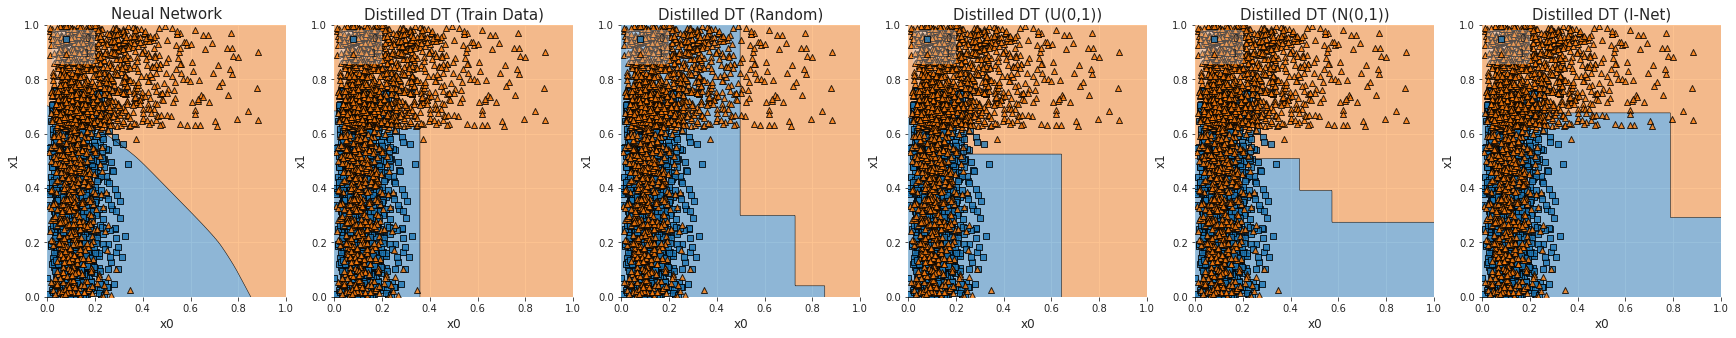

-----------------------------------------------------
Index:  348
Feature 1:  Samples 596 / 4404
	 Distribution 1: uniform
		 low: 1.07
		 high: 4.854
	 Distribution 2: uniform
		 low: 2.357
		 high: 3.327
Feature 2:  Samples 3793 / 1207
	 Distribution 1: normal
		 loc: 3.225
		 scale: 0.714
	 Distribution 2: normal
		 loc: 4.447
		 scale: 3.545
Considered Columns:								 0   1
Performance Network:								 0.67
Fidelity DT Sklearn Train Data:							 0.976
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.25
Fidelity DT Sklearn Uniform Data:						 0.824
Fidelity DT Sklearn Normal Data:						 0.954
Fidelity DT I-Net:								 0.788


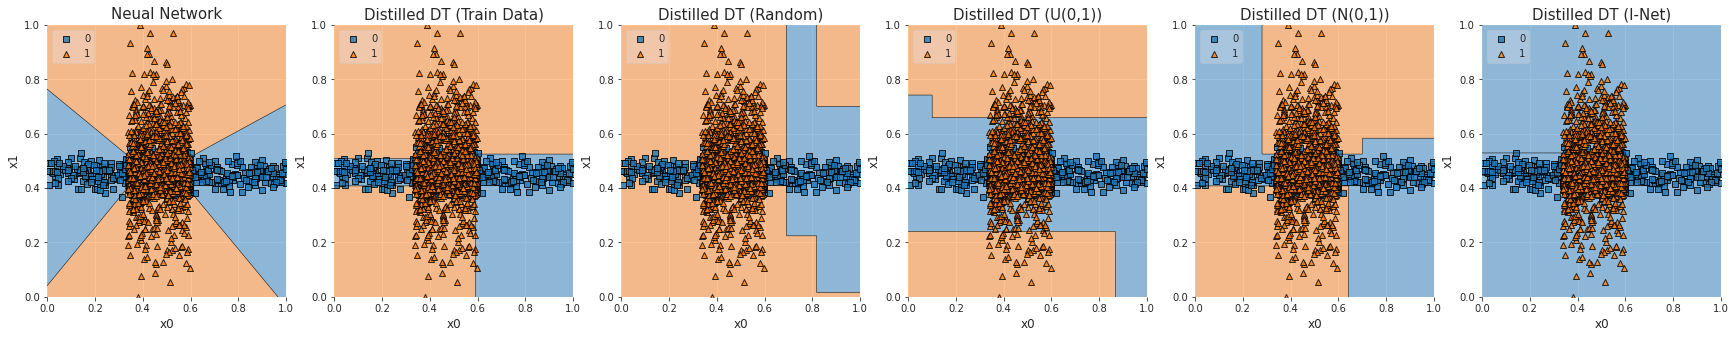

-----------------------------------------------------
Index:  10
Feature 1:  Samples 1290 / 3710
	 Distribution 1: poisson
		 lam: 3.65
	 Distribution 2: poisson
		 lam: 0.196
Feature 2:  Samples 2895 / 2105
	 Distribution 1: poisson
		 lam: 0.053
	 Distribution 2: poisson
		 lam: 4.196
Considered Columns:								 0   1
Performance Network:								 0.892
Fidelity DT Sklearn Train Data:							 0.994
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.834
Fidelity DT Sklearn Uniform Data:						 0.898
Fidelity DT Sklearn Normal Data:						 0.834
Fidelity DT I-Net:								 0.964


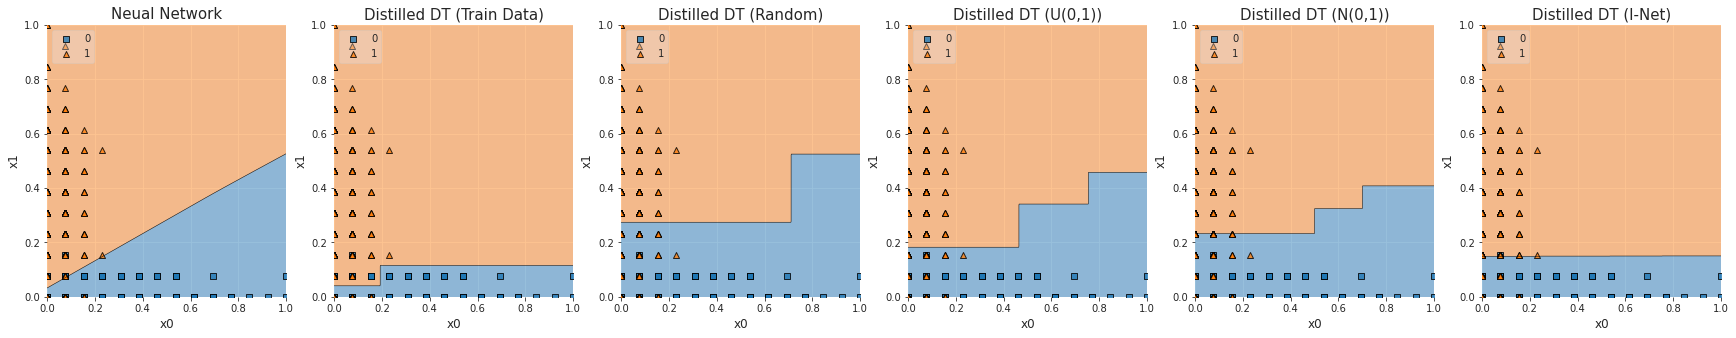

-----------------------------------------------------
Index:  958
Feature 1:  Samples 1047 / 3953
	 Distribution 1: gamma
		 shape: 3.194
		 scale: 1.395
	 Distribution 2: gamma
		 shape: 2.972
		 scale: 0.229
Feature 2:  Samples 744 / 4256
	 Distribution 1: normal
		 loc: 4.653
		 scale: 0.16
	 Distribution 2: normal
		 loc: 3.07
		 scale: 0.076
Considered Columns:								 0   1
Performance Network:								 0.698
Fidelity DT Sklearn Train Data:							 0.994
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.996
Fidelity DT Sklearn Uniform Data:						 0.988
Fidelity DT Sklearn Normal Data:						 0.248
Fidelity DT I-Net:								 0.848


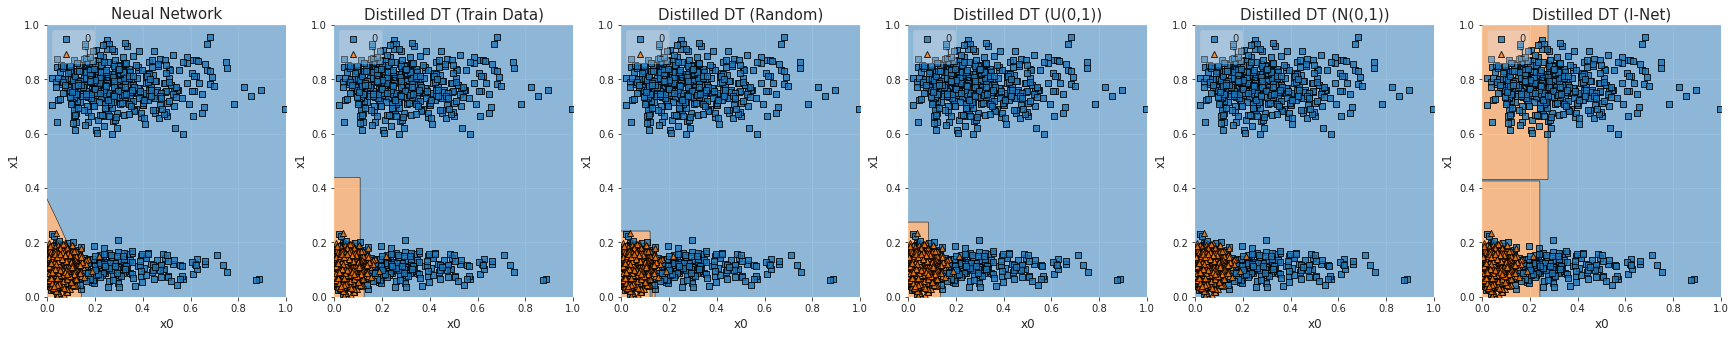

-----------------------------------------------------
Index:  664
Feature 1:  Samples 3039 / 1961
	 Distribution 1: poisson
		 lam: 0.006
	 Distribution 2: poisson
		 lam: 0.79
Feature 2:  Samples 3367 / 1633
	 Distribution 1: uniform
		 low: 1.074
		 high: 1.15
	 Distribution 2: uniform
		 low: 1.377
		 high: 3.188
Considered Columns:								 0   1
Performance Network:								 0.838
Fidelity DT Sklearn Train Data:							 1.0
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 1.0
Fidelity DT Sklearn Uniform Data:						 1.0
Fidelity DT Sklearn Normal Data:						 0.316
Fidelity DT I-Net:								 0.874


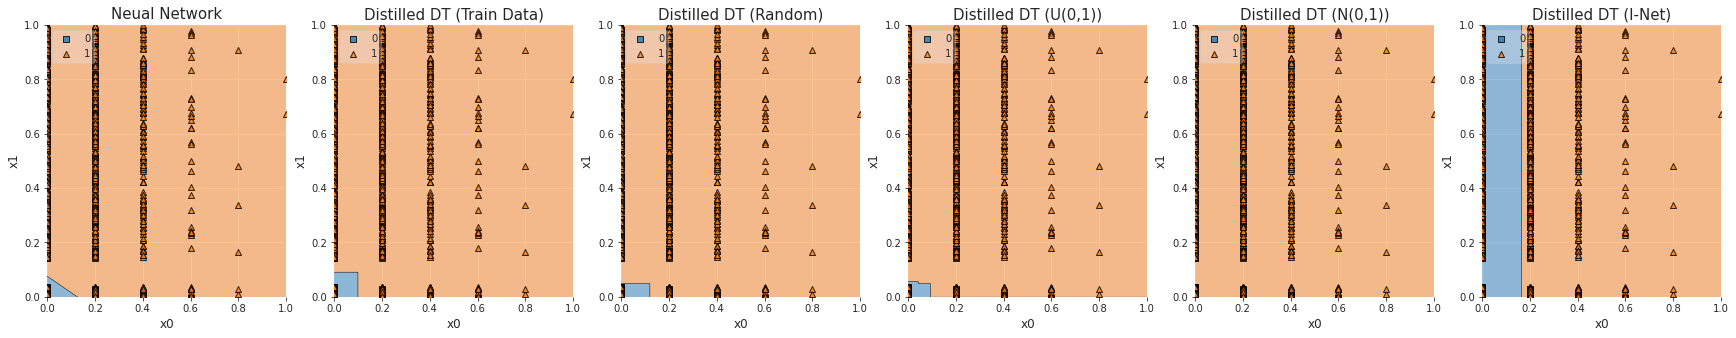

-----------------------------------------------------
Index:  552
Feature 1:  Samples 4067 / 933
	 Distribution 1: poisson
		 lam: 0.824
	 Distribution 2: poisson
		 lam: 2.979
Feature 2:  Samples 39 / 4961
	 Distribution 1: normal
		 loc: 4.592
		 scale: 4.247
	 Distribution 2: normal
		 loc: 0.201
		 scale: 0.834
Considered Columns:								 0   1
Performance Network:								 0.6
Fidelity DT Sklearn Train Data:							 1.0
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.856
Fidelity DT Sklearn Uniform Data:						 0.998
Fidelity DT Sklearn Normal Data:						 0.838
Fidelity DT I-Net:								 0.998


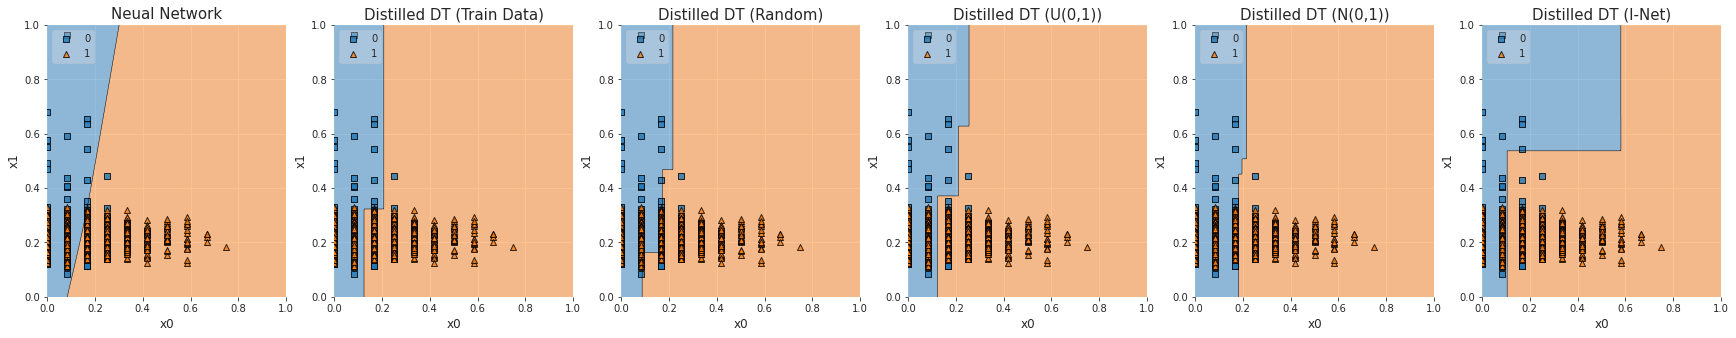

-----------------------------------------------------
Index:  538
Feature 1:  Samples 3254 / 1746
	 Distribution 1: gamma
		 shape: 1.455
		 scale: 3.891
	 Distribution 2: gamma
		 shape: 1.164
		 scale: 2.522
Feature 2:  Samples 3894 / 1106
	 Distribution 1: uniform
		 low: 1.227
		 high: 3.617
	 Distribution 2: uniform
		 low: 0.724
		 high: 1.633
Considered Columns:								 0   1
Performance Network:								 0.668
Fidelity DT Sklearn Train Data:							 0.964
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.744
Fidelity DT Sklearn Uniform Data:						 0.966
Fidelity DT Sklearn Normal Data:						 0.724
Fidelity DT I-Net:								 0.898


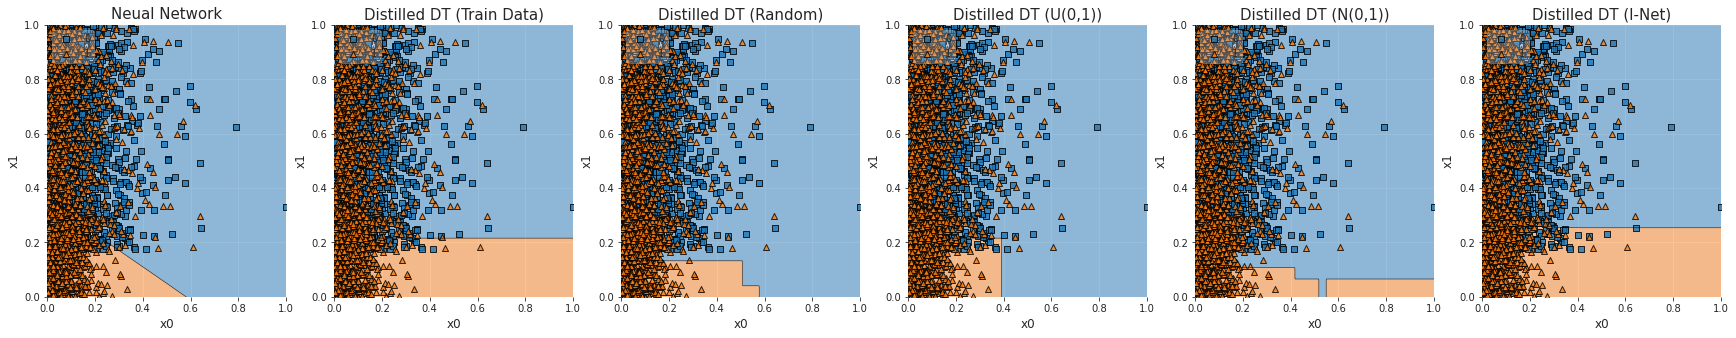

-----------------------------------------------------
Index:  904
Feature 1:  Samples 1462 / 3538
	 Distribution 1: poisson
		 lam: 4.654
	 Distribution 2: poisson
		 lam: 1.012
Feature 2:  Samples 3233 / 1767
	 Distribution 1: gamma
		 shape: 1.317
		 scale: 1.403
	 Distribution 2: gamma
		 shape: 1.739
		 scale: 4.663
Considered Columns:								 0   1
Performance Network:								 0.756
Fidelity DT Sklearn Train Data:							 0.99
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.598
Fidelity DT Sklearn Uniform Data:						 0.7
Fidelity DT Sklearn Normal Data:						 0.602
Fidelity DT I-Net:								 0.718


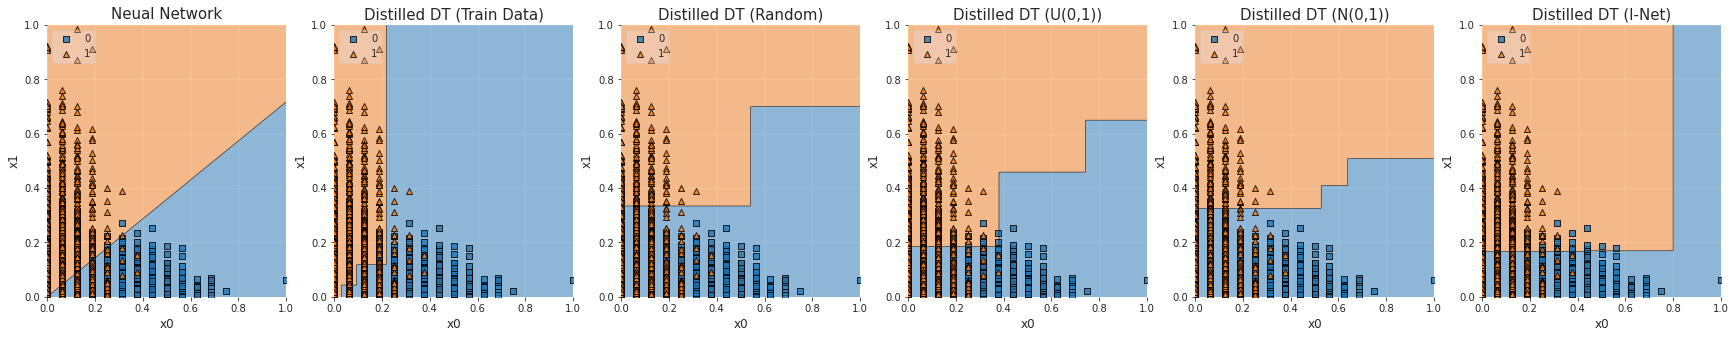

-----------------------------------------------------
Index:  582
Feature 1:  Samples 3546 / 1454
	 Distribution 1: poisson
		 lam: 0.397
	 Distribution 2: poisson
		 lam: 0.752
Feature 2:  Samples 3497 / 1503
	 Distribution 1: normal
		 loc: 1.232
		 scale: 1.355
	 Distribution 2: normal
		 loc: 4.028
		 scale: 1.871
Considered Columns:								 0   1
Performance Network:								 0.676
Fidelity DT Sklearn Train Data:							 0.99
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.382
Fidelity DT Sklearn Uniform Data:						 0.944
Fidelity DT Sklearn Normal Data:						 0.692
Fidelity DT I-Net:								 0.754


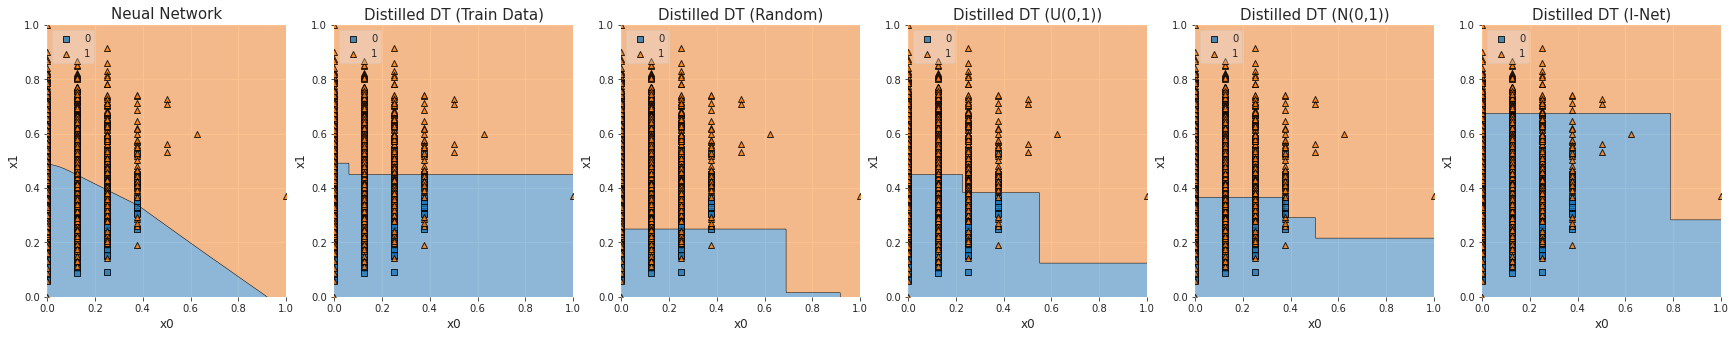

-----------------------------------------------------
Index:  633
Feature 1:  Samples 889 / 4111
	 Distribution 1: poisson
		 lam: 3.837
	 Distribution 2: poisson
		 lam: 1.053
Feature 2:  Samples 328 / 4672
	 Distribution 1: gamma
		 shape: 0.218
		 scale: 2.639
	 Distribution 2: gamma
		 shape: 1.519
		 scale: 0.275
Considered Columns:								 0   1
Performance Network:								 0.626
Fidelity DT Sklearn Train Data:							 0.998
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.87
Fidelity DT Sklearn Uniform Data:						 0.972
Fidelity DT Sklearn Normal Data:						 0.244
Fidelity DT I-Net:								 0.776


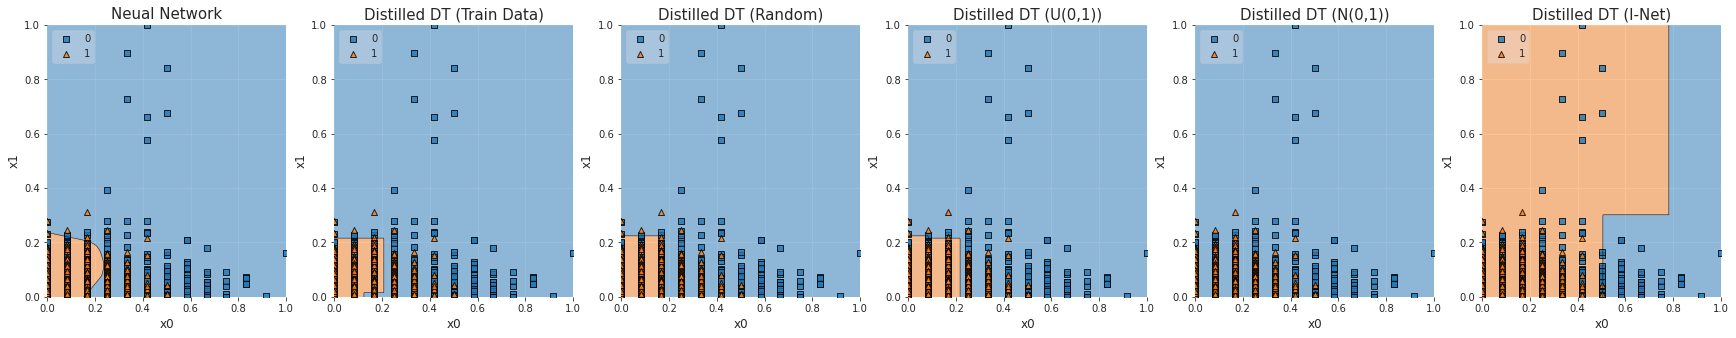

-----------------------------------------------------
Index:  533
Feature 1:  Samples 4701 / 299
	 Distribution 1: gamma
		 shape: 4.201
		 scale: 0.655
	 Distribution 2: gamma
		 shape: 2.618
		 scale: 4.538
Feature 2:  Samples 719 / 4281
	 Distribution 1: gamma
		 shape: 1.805
		 scale: 3.601
	 Distribution 2: gamma
		 shape: 1.132
		 scale: 1.132
Considered Columns:								 0   1
Performance Network:								 0.58
Fidelity DT Sklearn Train Data:							 0.958
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.628
Fidelity DT Sklearn Uniform Data:						 0.674
Fidelity DT Sklearn Normal Data:						 0.624
Fidelity DT I-Net:								 0.722


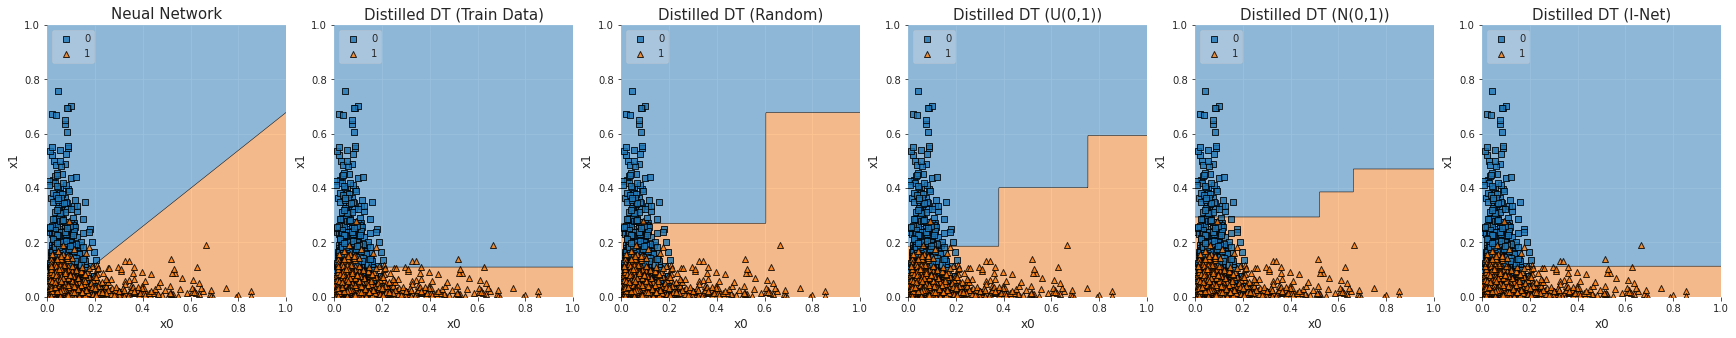

-----------------------------------------------------
Index:  846
Feature 1:  Samples 1880 / 3120
	 Distribution 1: gamma
		 shape: 3.504
		 scale: 2.945
	 Distribution 2: gamma
		 shape: 1.074
		 scale: 3.239
Feature 2:  Samples 857 / 4143
	 Distribution 1: gamma
		 shape: 4.474
		 scale: 2.362
	 Distribution 2: gamma
		 shape: 1.704
		 scale: 1.886
Considered Columns:								 0   1
Performance Network:								 0.75
Fidelity DT Sklearn Train Data:							 0.958
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.908
Fidelity DT Sklearn Uniform Data:						 0.944
Fidelity DT Sklearn Normal Data:						 0.46
Fidelity DT I-Net:								 0.85


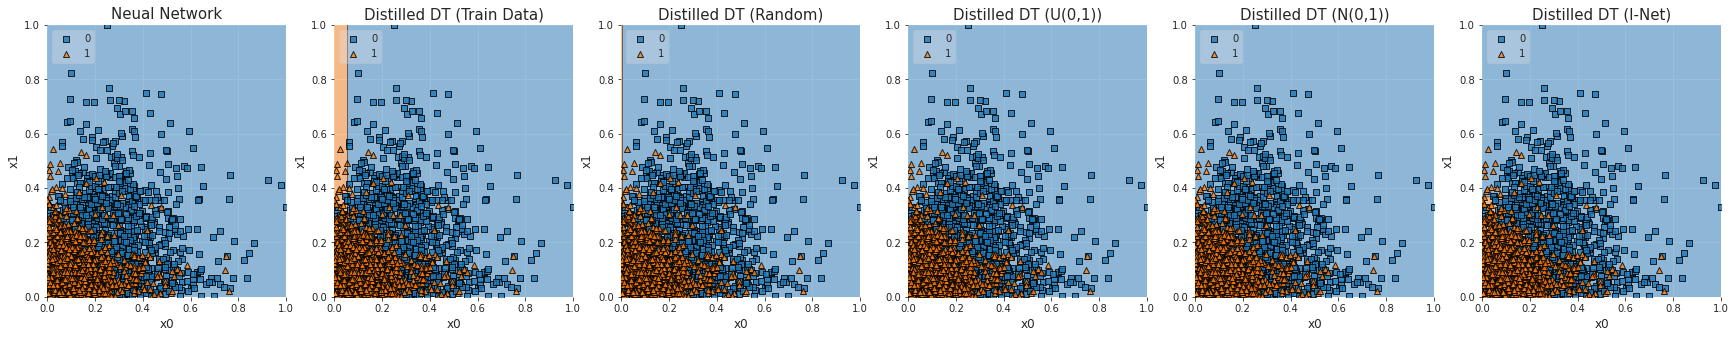

-----------------------------------------------------
Index:  857
Feature 1:  Samples 1673 / 3327
	 Distribution 1: gamma
		 shape: 0.834
		 scale: 4.113
	 Distribution 2: gamma
		 shape: 0.967
		 scale: 4.043
Feature 2:  Samples 1183 / 3817
	 Distribution 1: uniform
		 low: 2.742
		 high: 3.967
	 Distribution 2: uniform
		 low: 3.171
		 high: 3.95
Considered Columns:								 0   1
Performance Network:								 0.556
Fidelity DT Sklearn Train Data:							 0.986
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.764
Fidelity DT Sklearn Uniform Data:						 0.976
Fidelity DT Sklearn Normal Data:						 0.894
Fidelity DT I-Net:								 0.956


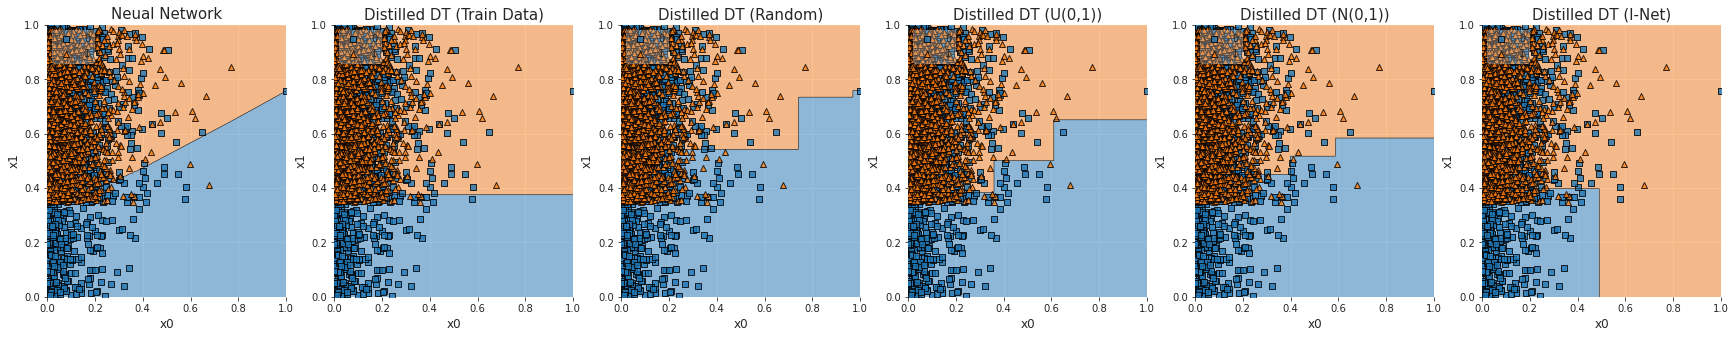

-----------------------------------------------------
Index:  364
Feature 1:  Samples 1711 / 3289
	 Distribution 1: poisson
		 lam: 2.192
	 Distribution 2: poisson
		 lam: 2.708
Feature 2:  Samples 2733 / 2267
	 Distribution 1: poisson
		 lam: 1.495
	 Distribution 2: poisson
		 lam: 3.427
Considered Columns:								 0   1
Performance Network:								 0.7
Fidelity DT Sklearn Train Data:							 1.0
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.756
Fidelity DT Sklearn Uniform Data:						 0.998
Fidelity DT Sklearn Normal Data:						 0.998
Fidelity DT I-Net:								 0.994


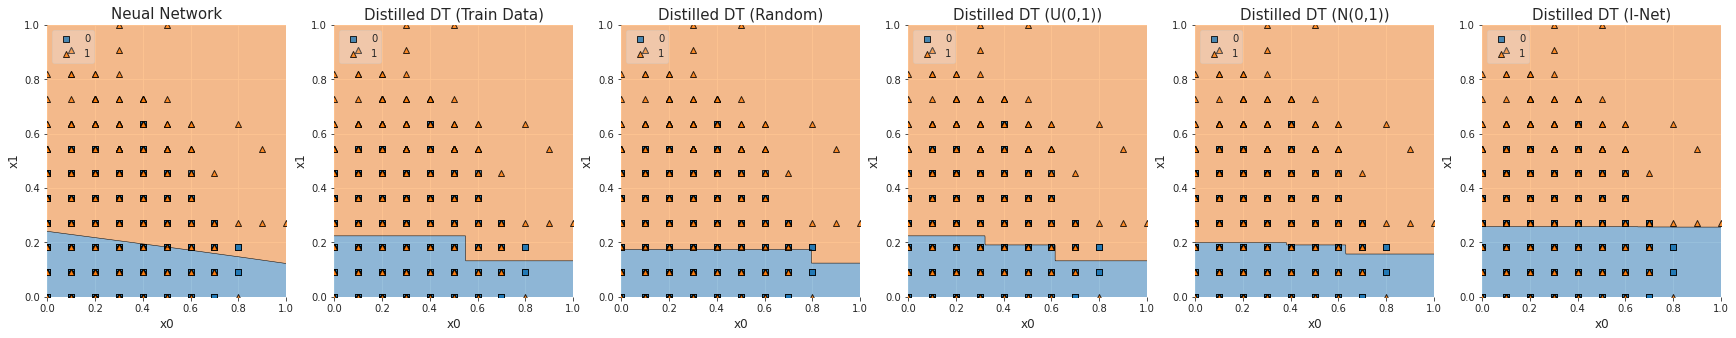

-----------------------------------------------------
Index:  865
Feature 1:  Samples 2855 / 2145
	 Distribution 1: gamma
		 shape: 2.491
		 scale: 2.179
	 Distribution 2: gamma
		 shape: 2.859
		 scale: 1.845
Feature 2:  Samples 4572 / 428
	 Distribution 1: beta
		 a: 4.573
		 b: 1.017
	 Distribution 2: beta
		 a: 2.146
		 b: 3.864
Considered Columns:								 0   1
Performance Network:								 0.578
Fidelity DT Sklearn Train Data:							 0.978
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.904
Fidelity DT Sklearn Uniform Data:						 0.958
Fidelity DT Sklearn Normal Data:						 0.458
Fidelity DT I-Net:								 0.848


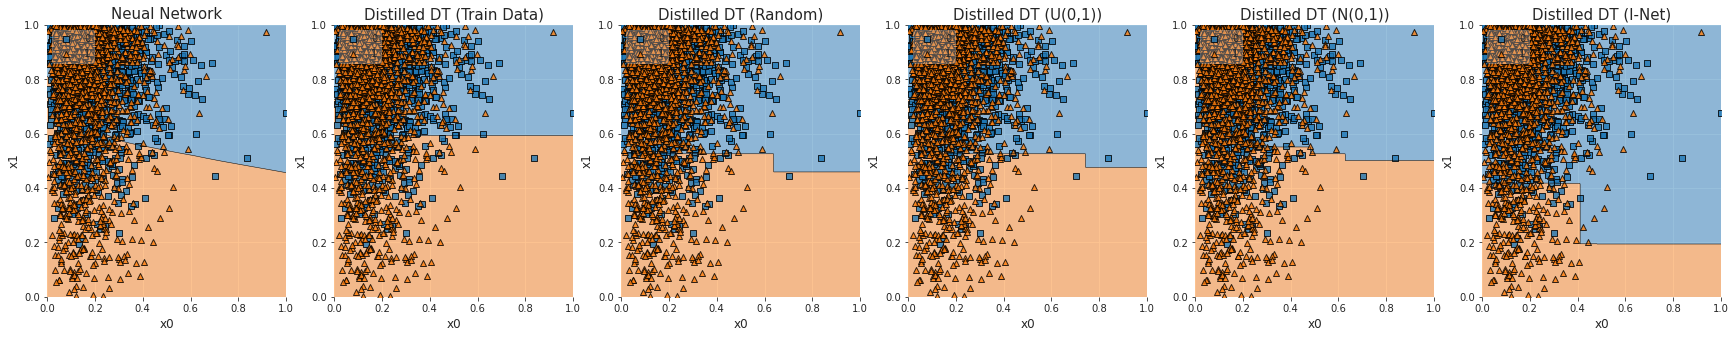

-----------------------------------------------------
Index:  400
Feature 1:  Samples 4445 / 555
	 Distribution 1: normal
		 loc: 2.676
		 scale: 0.469
	 Distribution 2: normal
		 loc: 0.974
		 scale: 4.266
Feature 2:  Samples 3654 / 1346
	 Distribution 1: uniform
		 low: 2.355
		 high: 2.734
	 Distribution 2: uniform
		 low: 1.554
		 high: 3.468
Considered Columns:								 0   1
Performance Network:								 0.734
Fidelity DT Sklearn Train Data:							 0.99
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.896
Fidelity DT Sklearn Uniform Data:						 0.224
Fidelity DT Sklearn Normal Data:						 0.99
Fidelity DT I-Net:								 0.776


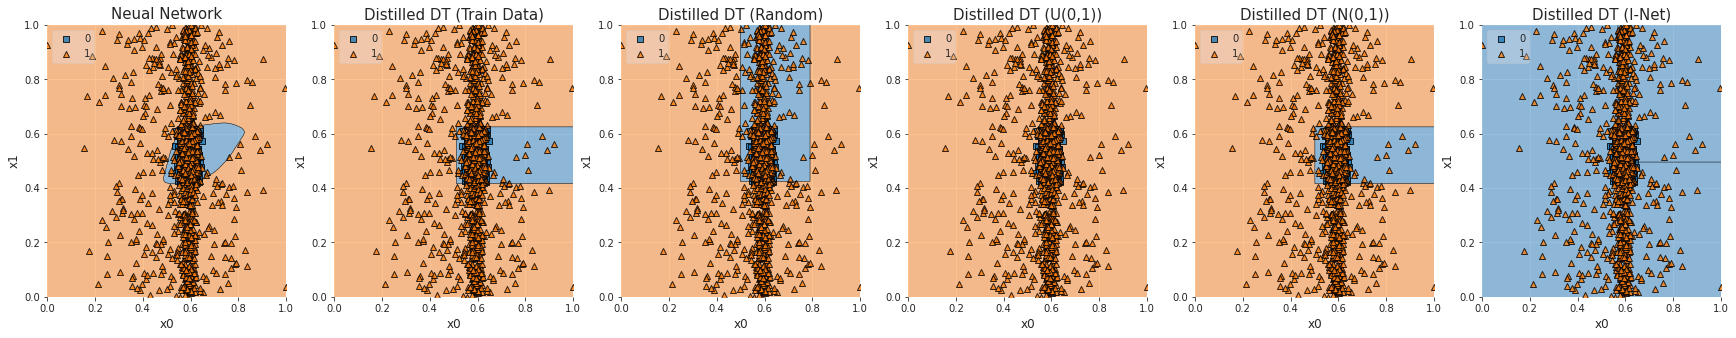

-----------------------------------------------------
Index:  268
Feature 1:  Samples 4528 / 472
	 Distribution 1: normal
		 loc: 2.424
		 scale: 4.09
	 Distribution 2: normal
		 loc: 2.444
		 scale: 0.267
Feature 2:  Samples 1636 / 3364
	 Distribution 1: beta
		 a: 4.75
		 b: 3.348
	 Distribution 2: beta
		 a: 3.556
		 b: 3.218
Considered Columns:								 0   1
Performance Network:								 0.56
Fidelity DT Sklearn Train Data:							 0.906
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.816
Fidelity DT Sklearn Uniform Data:						 0.812
Fidelity DT Sklearn Normal Data:						 0.772
Fidelity DT I-Net:								 0.872


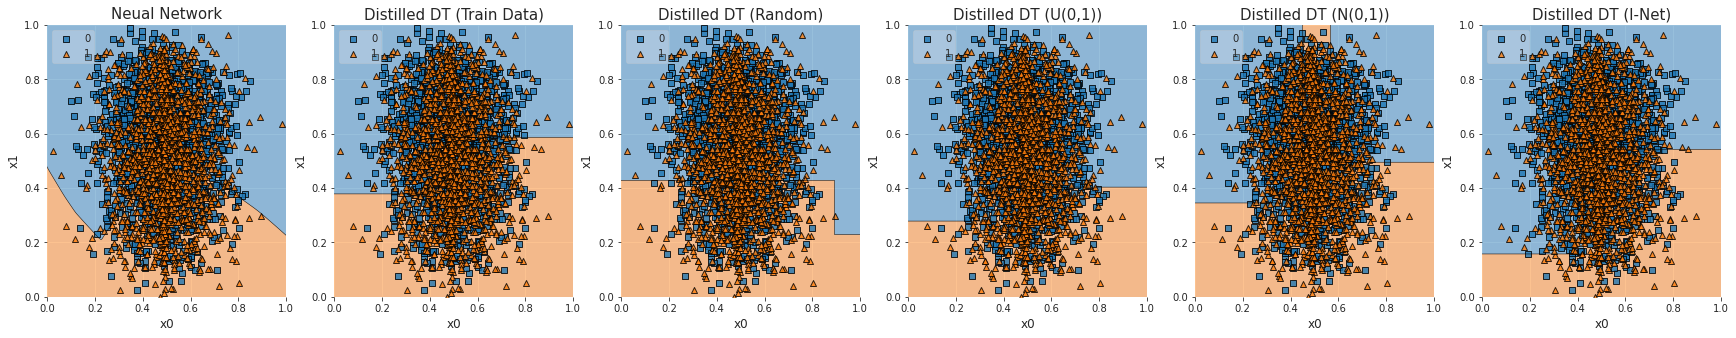

-----------------------------------------------------
Index:  634
Feature 1:  Samples 1494 / 3506
	 Distribution 1: gamma
		 shape: 2.493
		 scale: 1.992
	 Distribution 2: gamma
		 shape: 1.917
		 scale: 1.638
Feature 2:  Samples 2913 / 2087
	 Distribution 1: gamma
		 shape: 2.511
		 scale: 1.474
	 Distribution 2: gamma
		 shape: 4.817
		 scale: 1.943
Considered Columns:								 0   1
Performance Network:								 0.746
Fidelity DT Sklearn Train Data:							 0.978
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.778
Fidelity DT Sklearn Uniform Data:						 0.946
Fidelity DT Sklearn Normal Data:						 0.792
Fidelity DT I-Net:								 0.906


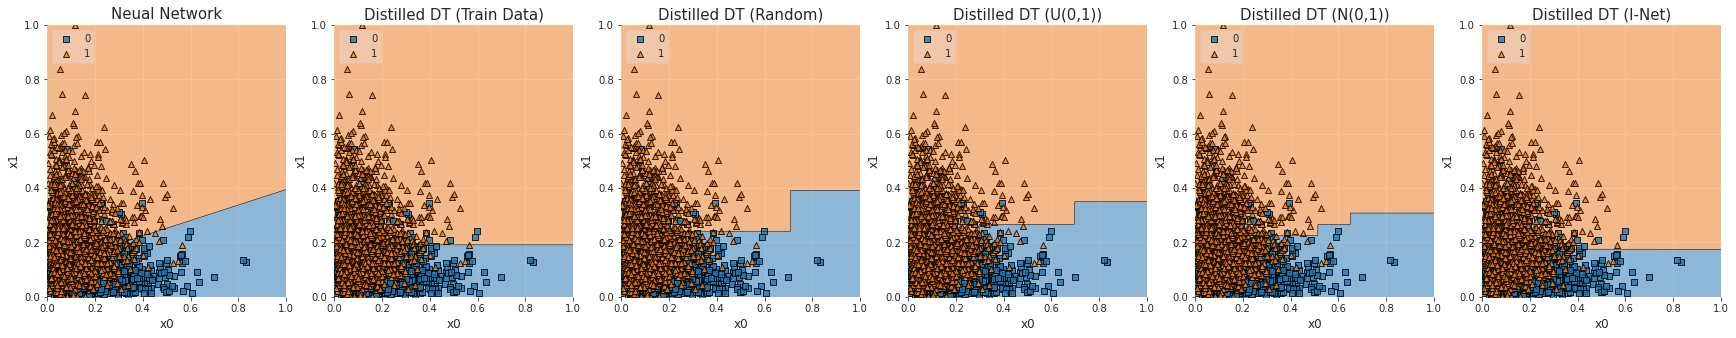

-----------------------------------------------------
Index:  818
Feature 1:  Samples 4982 / 18
	 Distribution 1: poisson
		 lam: 0.025
	 Distribution 2: poisson
		 lam: 2.124
Feature 2:  Samples 4230 / 770
	 Distribution 1: uniform
		 low: 1.619
		 high: 2.534
	 Distribution 2: uniform
		 low: 0.877
		 high: 2.754
Considered Columns:								 0   1
Performance Network:								 0.596
Fidelity DT Sklearn Train Data:							 1.0
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.72
Fidelity DT Sklearn Uniform Data:						 0.874
Fidelity DT Sklearn Normal Data:						 0.806
Fidelity DT I-Net:								 0.866


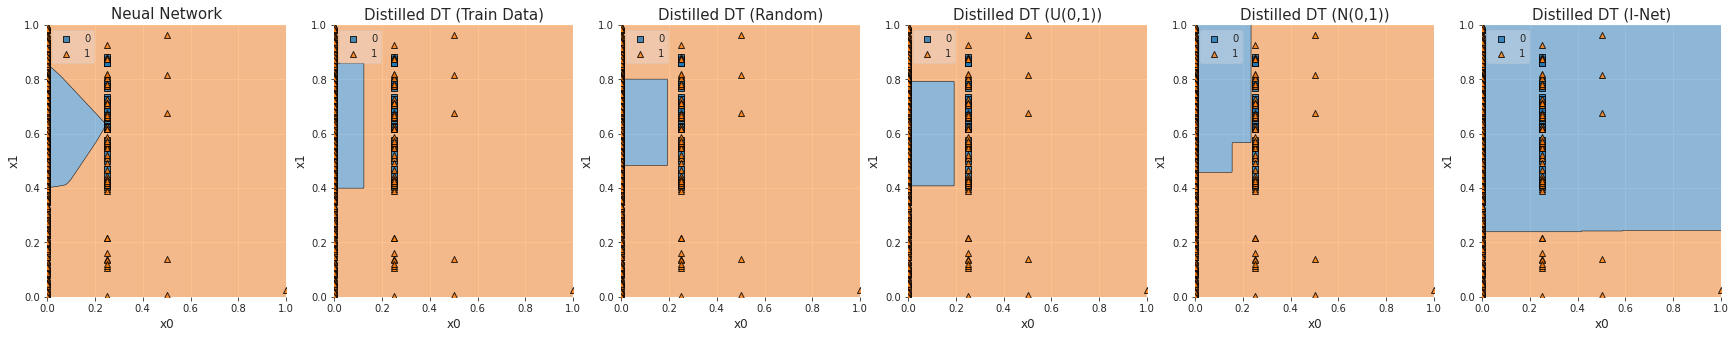

-----------------------------------------------------
Index:  915
Feature 1:  Samples 1776 / 3224
	 Distribution 1: gamma
		 shape: 4.702
		 scale: 3.031
	 Distribution 2: gamma
		 shape: 3.301
		 scale: 4.803
Feature 2:  Samples 2367 / 2633
	 Distribution 1: beta
		 a: 3.873
		 b: 2.597
	 Distribution 2: beta
		 a: 4.421
		 b: 2.468
Considered Columns:								 0   1
Performance Network:								 0.586
Fidelity DT Sklearn Train Data:							 0.874
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.622
Fidelity DT Sklearn Uniform Data:						 0.808
Fidelity DT Sklearn Normal Data:						 0.712
Fidelity DT I-Net:								 0.78


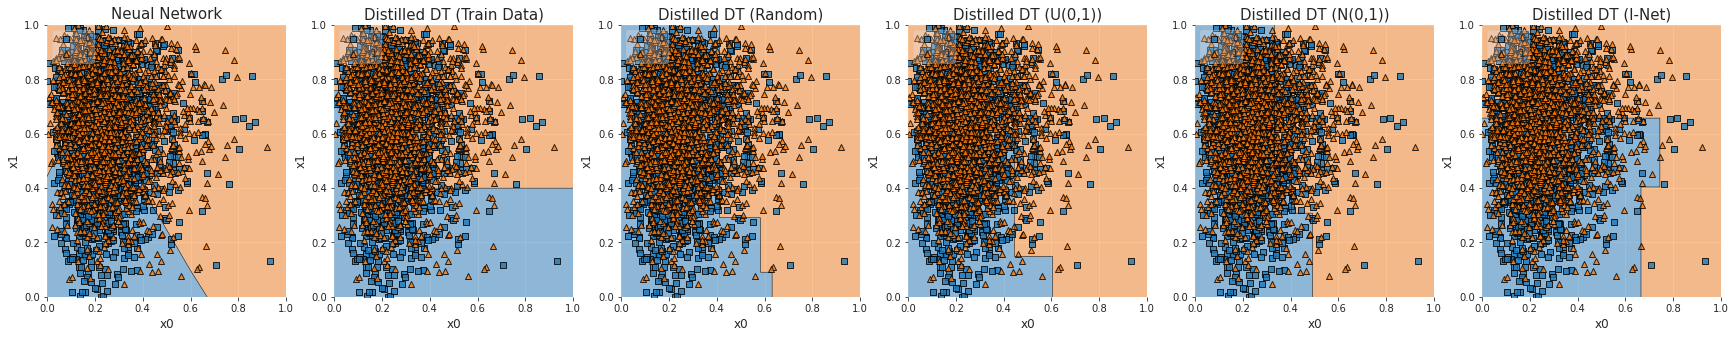

-----------------------------------------------------
Index:  789
Feature 1:  Samples 4660 / 340
	 Distribution 1: gamma
		 shape: 0.835
		 scale: 1.264
	 Distribution 2: gamma
		 shape: 2.228
		 scale: 2.122
Feature 2:  Samples 1815 / 3185
	 Distribution 1: poisson
		 lam: 3.632
	 Distribution 2: poisson
		 lam: 0.328
Considered Columns:								 0   1
Performance Network:								 0.806
Fidelity DT Sklearn Train Data:							 1.0
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.9
Fidelity DT Sklearn Uniform Data:						 1.0
Fidelity DT Sklearn Normal Data:						 0.9
Fidelity DT I-Net:								 0.998


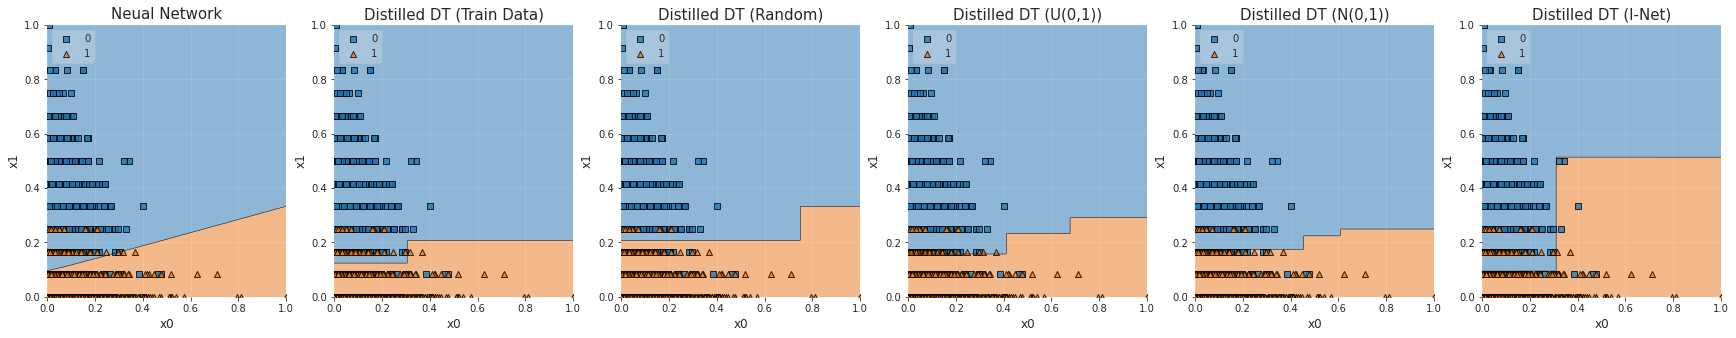

-----------------------------------------------------
Index:  819
Feature 1:  Samples 3269 / 1731
	 Distribution 1: normal
		 loc: 2.62
		 scale: 3.867
	 Distribution 2: normal
		 loc: 2.652
		 scale: 2.133
Feature 2:  Samples 4555 / 445
	 Distribution 1: poisson
		 lam: 0.088
	 Distribution 2: poisson
		 lam: 3.744
Considered Columns:								 0   1
Performance Network:								 0.622
Fidelity DT Sklearn Train Data:							 0.998
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.796
Fidelity DT Sklearn Uniform Data:						 0.622
Fidelity DT Sklearn Normal Data:						 0.55
Fidelity DT I-Net:								 0.72


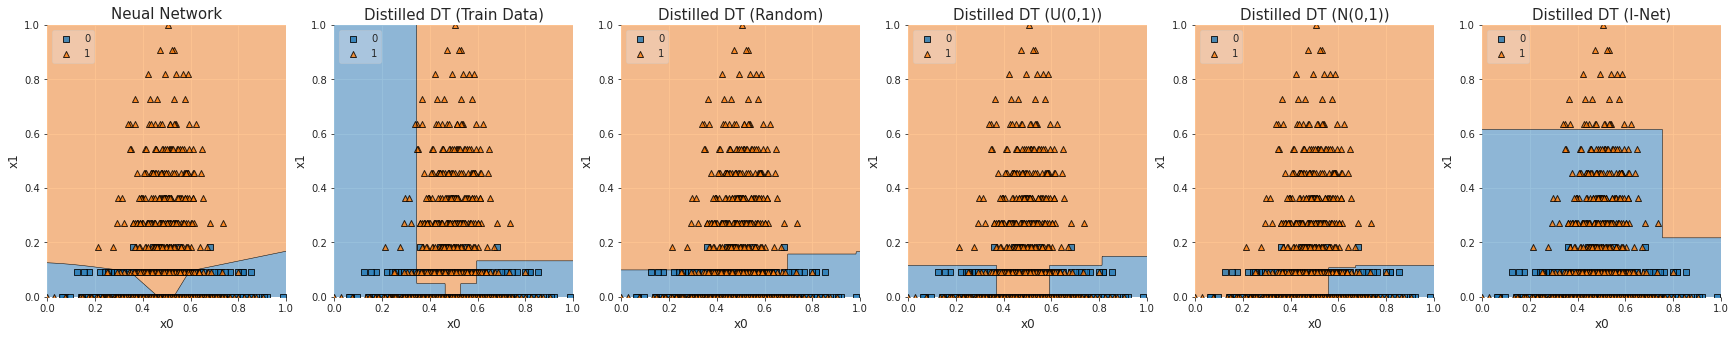

-----------------------------------------------------
Index:  908
Feature 1:  Samples 1923 / 3077
	 Distribution 1: gamma
		 shape: 0.933
		 scale: 2.124
	 Distribution 2: gamma
		 shape: 4.441
		 scale: 3.228
Feature 2:  Samples 3501 / 1499
	 Distribution 1: gamma
		 shape: 1.456
		 scale: 2.935
	 Distribution 2: gamma
		 shape: 4.533
		 scale: 4.327
Considered Columns:								 0   1
Performance Network:								 0.86
Fidelity DT Sklearn Train Data:							 0.992
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.98
Fidelity DT Sklearn Uniform Data:						 0.974
Fidelity DT Sklearn Normal Data:						 0.526
Fidelity DT I-Net:								 0.89


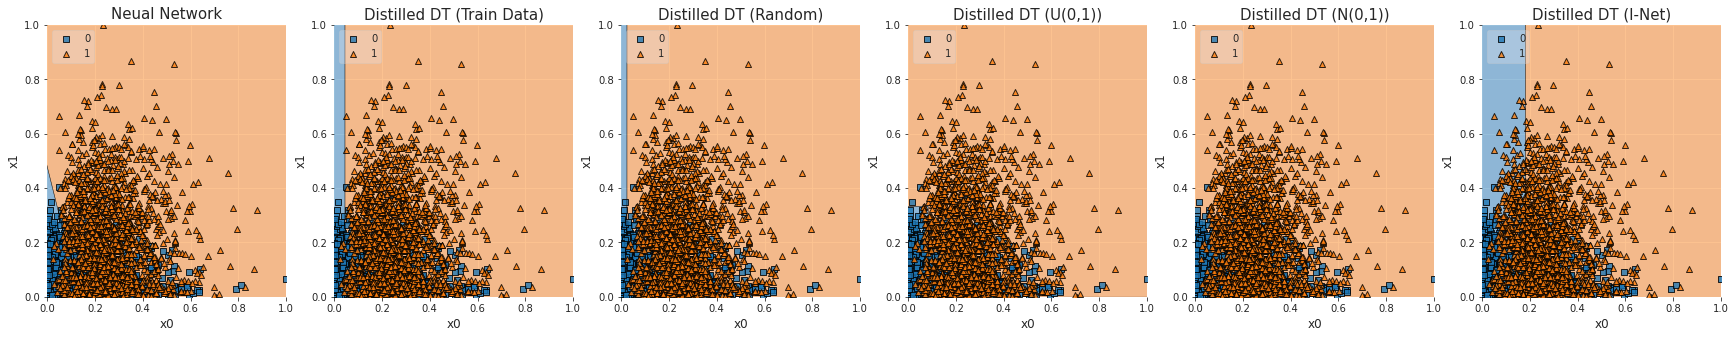

-----------------------------------------------------
Index:  170
Feature 1:  Samples 2971 / 2029
	 Distribution 1: poisson
		 lam: 0.989
	 Distribution 2: poisson
		 lam: 1.606
Feature 2:  Samples 2658 / 2342
	 Distribution 1: poisson
		 lam: 1.789
	 Distribution 2: poisson
		 lam: 1.163
Considered Columns:								 0   1
Performance Network:								 0.624
Fidelity DT Sklearn Train Data:							 0.992
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.752
Fidelity DT Sklearn Uniform Data:						 0.892
Fidelity DT Sklearn Normal Data:						 0.758
Fidelity DT I-Net:								 0.86


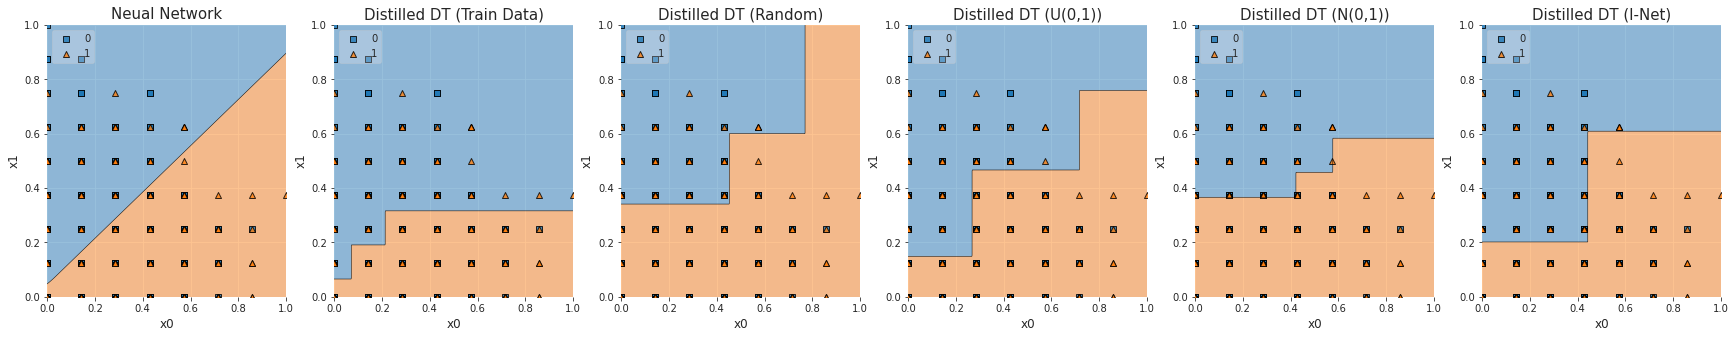

-----------------------------------------------------
Index:  369
Feature 1:  Samples 271 / 4729
	 Distribution 1: gamma
		 shape: 0.048
		 scale: 4.291
	 Distribution 2: gamma
		 shape: 4.022
		 scale: 0.206
Feature 2:  Samples 4394 / 606
	 Distribution 1: poisson
		 lam: 3.085
	 Distribution 2: poisson
		 lam: 2.237
Considered Columns:								 0   1
Performance Network:								 0.562
Fidelity DT Sklearn Train Data:							 0.904
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.732
Fidelity DT Sklearn Uniform Data:						 0.778
Fidelity DT Sklearn Normal Data:						 0.33
Fidelity DT I-Net:								 0.672


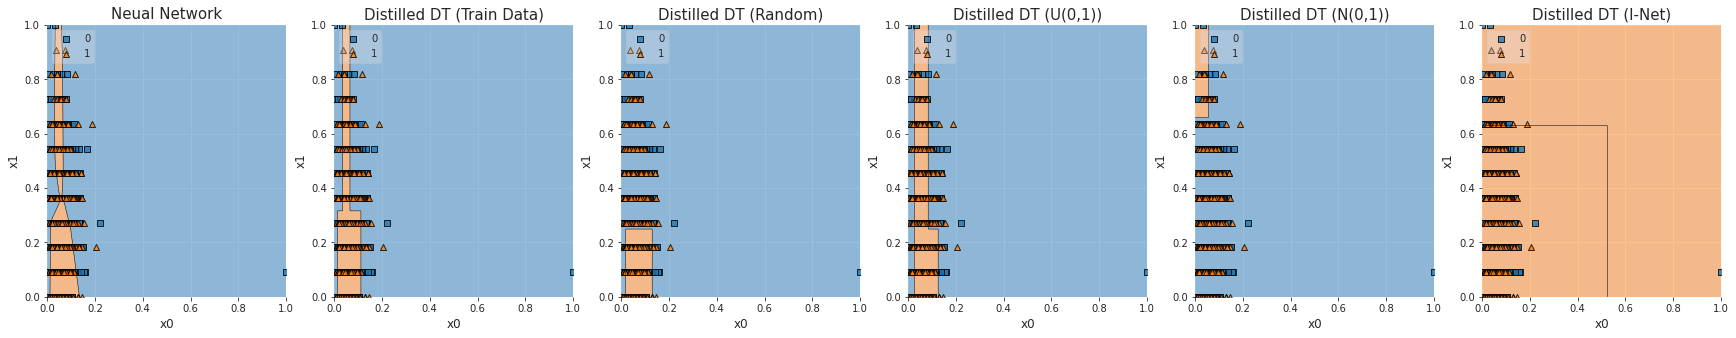

-----------------------------------------------------
Index:  725
Feature 1:  Samples 1540 / 3460
	 Distribution 1: beta
		 a: 2.41
		 b: 4.681
	 Distribution 2: beta
		 a: 3.434
		 b: 0.928
Feature 2:  Samples 3222 / 1778
	 Distribution 1: beta
		 a: 4.394
		 b: 0.143
	 Distribution 2: beta
		 a: 0.893
		 b: 4.911
Considered Columns:								 0   1
Performance Network:								 0.84
Fidelity DT Sklearn Train Data:							 0.966
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.738
Fidelity DT Sklearn Uniform Data:						 0.952
Fidelity DT Sklearn Normal Data:						 0.944
Fidelity DT I-Net:								 0.932


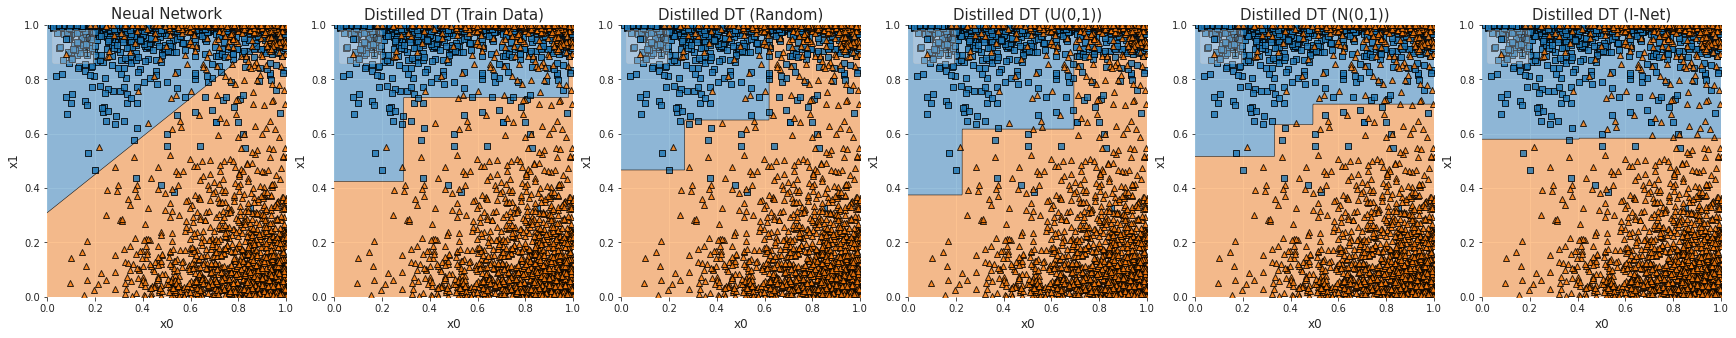

-----------------------------------------------------
Index:  570
Feature 1:  Samples 4694 / 306
	 Distribution 1: poisson
		 lam: 0.347
	 Distribution 2: poisson
		 lam: 3.921
Feature 2:  Samples 1587 / 3413
	 Distribution 1: gamma
		 shape: 3.586
		 scale: 0.487
	 Distribution 2: gamma
		 shape: 1.499
		 scale: 1.672
Considered Columns:								 0   1
Performance Network:								 0.598
Fidelity DT Sklearn Train Data:							 0.96
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.876
Fidelity DT Sklearn Uniform Data:						 0.92
Fidelity DT Sklearn Normal Data:						 0.268
Fidelity DT I-Net:								 0.742


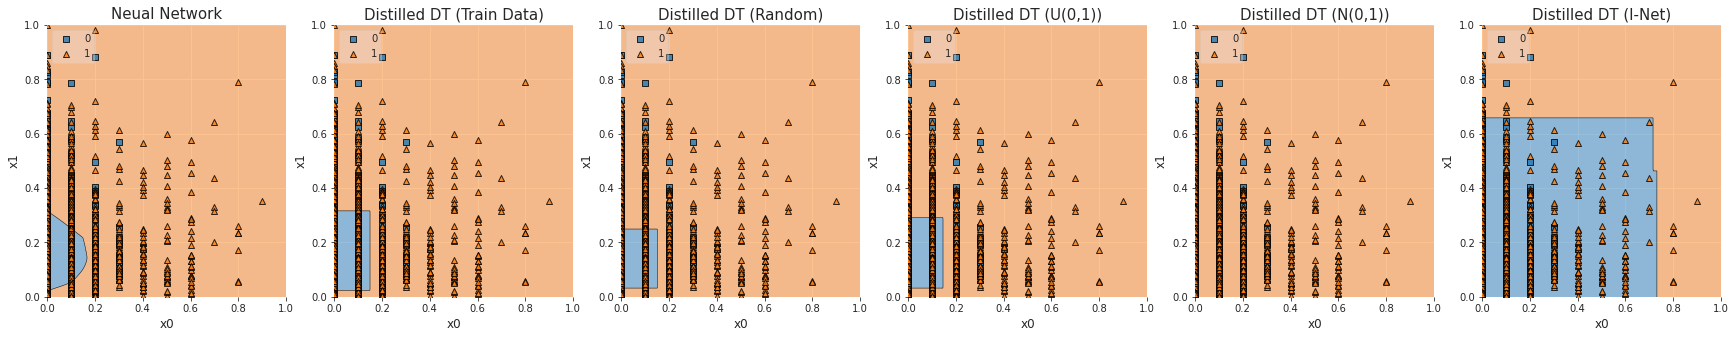

-----------------------------------------------------
Index:  468
Feature 1:  Samples 1518 / 3482
	 Distribution 1: poisson
		 lam: 2.328
	 Distribution 2: poisson
		 lam: 4.551
Feature 2:  Samples 2044 / 2956
	 Distribution 1: poisson
		 lam: 3.997
	 Distribution 2: poisson
		 lam: 2.135
Considered Columns:								 0   1
Performance Network:								 0.664
Fidelity DT Sklearn Train Data:							 0.928
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.716
Fidelity DT Sklearn Uniform Data:						 0.884
Fidelity DT Sklearn Normal Data:						 0.722
Fidelity DT I-Net:								 0.828


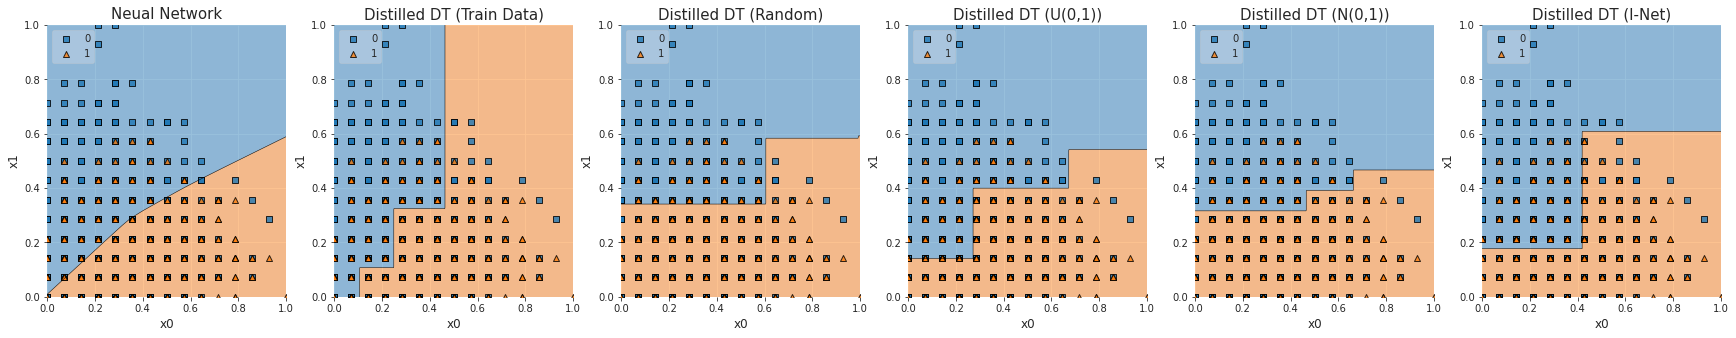

-----------------------------------------------------
Index:  978
Feature 1:  Samples 3217 / 1783
	 Distribution 1: poisson
		 lam: 3.514
	 Distribution 2: poisson
		 lam: 1.927
Feature 2:  Samples 2750 / 2250
	 Distribution 1: poisson
		 lam: 1.537
	 Distribution 2: poisson
		 lam: 3.179
Considered Columns:								 0   1
Performance Network:								 0.72
Fidelity DT Sklearn Train Data:							 0.99
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.762
Fidelity DT Sklearn Uniform Data:						 0.904
Fidelity DT Sklearn Normal Data:						 0.766
Fidelity DT I-Net:								 0.864


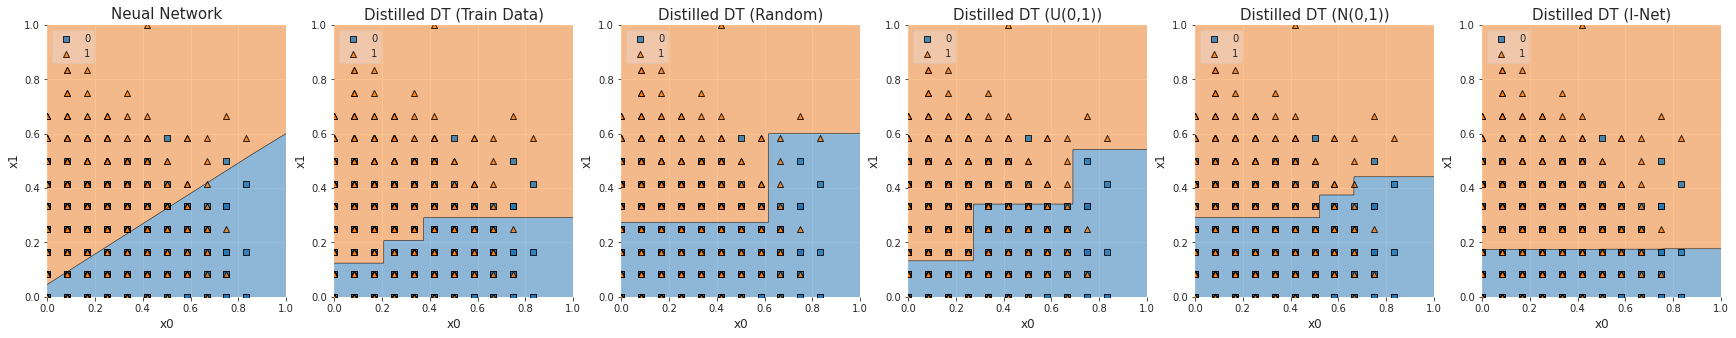

-----------------------------------------------------
Index:  930
Feature 1:  Samples 2910 / 2090
	 Distribution 1: gamma
		 shape: 4.098
		 scale: 0.093
	 Distribution 2: gamma
		 shape: 4.021
		 scale: 2.02
Feature 2:  Samples 4114 / 886
	 Distribution 1: gamma
		 shape: 1.334
		 scale: 0.706
	 Distribution 2: gamma
		 shape: 4.27
		 scale: 1.251
Considered Columns:								 0   1
Performance Network:								 0.896
Fidelity DT Sklearn Train Data:							 0.996
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.99
Fidelity DT Sklearn Uniform Data:						 0.998
Fidelity DT Sklearn Normal Data:						 0.69
Fidelity DT I-Net:								 0.946


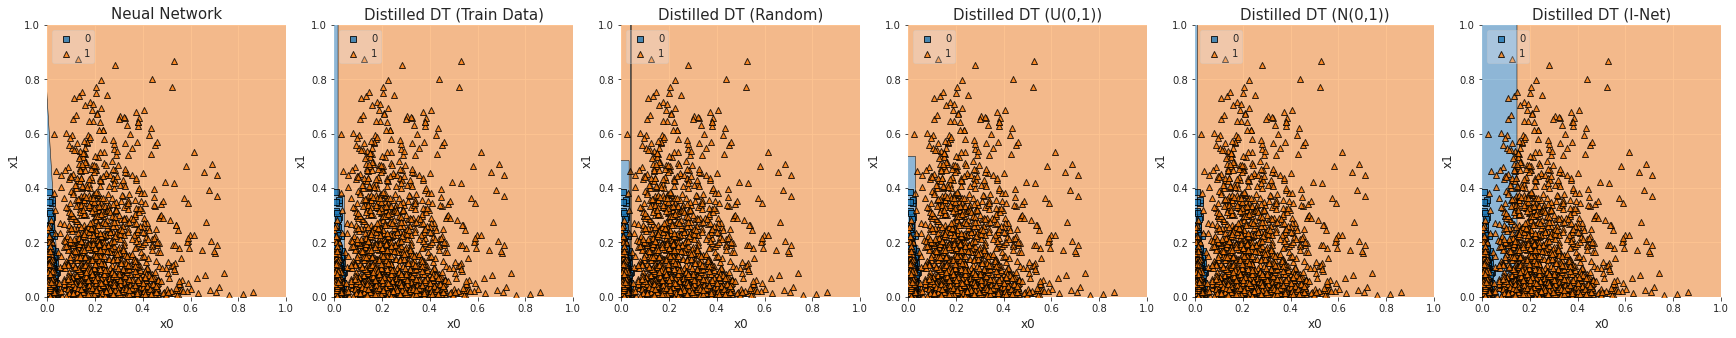

-----------------------------------------------------
Index:  371
Feature 1:  Samples 974 / 4026
	 Distribution 1: normal
		 loc: 3.194
		 scale: 0.721
	 Distribution 2: normal
		 loc: 1.829
		 scale: 1.397
Feature 2:  Samples 4433 / 567
	 Distribution 1: gamma
		 shape: 2.363
		 scale: 4.658
	 Distribution 2: gamma
		 shape: 4.187
		 scale: 4.756
Considered Columns:								 0   1
Performance Network:								 0.612
Fidelity DT Sklearn Train Data:							 0.972
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.942
Fidelity DT Sklearn Uniform Data:						 0.946
Fidelity DT Sklearn Normal Data:						 0.738
Fidelity DT I-Net:								 0.928


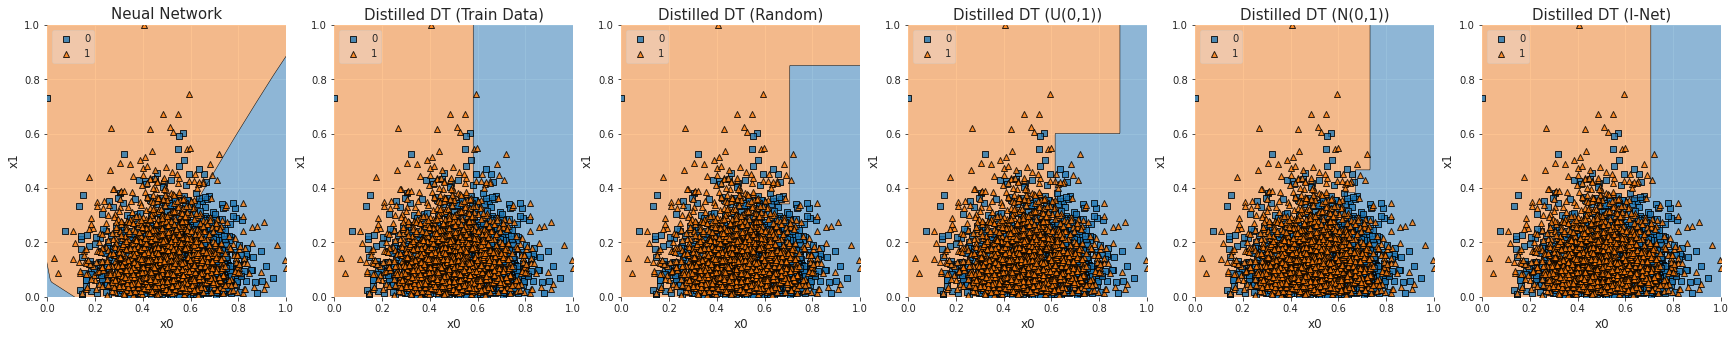

-----------------------------------------------------


In [31]:
if evaluate_distribution:
    timestr = time.strftime("%Y%m%d-%H%M%S")
    identifier_folder = config['function_family']['dt_type'] + '_' + str(config['function_family']['decision_sparsity']) + '_' + timestr
    os.makedirs('./data/distrib_plots/' + identifier_folder + '/', exist_ok=True)
    
    for i in range(min(50, test_size)):
        #index = 14
        #index = np.argmax(np.array(inet_evaluation_result_dict_complete_by_distribution_test['uniform']['inet_scores']['accuracy']) - np.array(inet_evaluation_result_dict_complete_by_distribution_test['uniform']['dt_scores']['accuracy']))
        top_number = i
        #index = np.argsort(np.array(inet_evaluation_result_dict_complete_by_distribution_test['uniform']['inet_scores']['accuracy']) - np.array(inet_evaluation_result_dict_complete_by_distribution_test['uniform']['dt_scores']['accuracy']))[::-1][top_number]

        scores_distilled_median_random = np.median(np.array([inet_evaluation_result_dict_complete_by_distribution_test[str(distrib)]['dt_scores']['accuracy'] for distrib in config['data']['distribution_list_eval']]), axis=0)
        scores_distilled_uniform = inet_evaluation_result_dict_complete_by_distribution_test[str(config['data']['distribution_list_eval'][0])]['dt_scores']['accuracy_uniform_data']
        scores_distilled_normal = inet_evaluation_result_dict_complete_by_distribution_test[str(config['data']['distribution_list_eval'][0])]['dt_scores']['accuracy_normal_data']
        
        scores_distilled_array = np.mean([scores_distilled_median_random, scores_distilled_uniform, scores_distilled_normal], axis=0)
        
        index = np.argsort(np.array(inet_evaluation_result_dict_complete_by_distribution_test[list(inet_evaluation_result_dict_complete_by_distribution_test.keys())[0]]['inet_scores']['accuracy']) - scores_distilled_array)[::-1][top_number]
        #index = np.argsort(np.array(inet_evaluation_result_dict_complete_by_distribution_test['uniform']['inet_scores']['accuracy']) - np.max(np.array([inet_evaluation_result_dict_complete_by_distribution_test[distrib]['dt_scores']['accuracy'] for distrib in config['data']['distribution_list_eval']]), axis=0))[::-1][top_number]
        #index = np.argsort(np.array(inet_evaluation_result_dict_complete_by_distribution_test['uniform']['inet_scores']['accuracy']) - np.mean(np.array([inet_evaluation_result_dict_complete_by_distribution_test[distrib]['dt_scores']['accuracy'] for distrib in config['data']['distribution_list_eval']]), axis=0))[::-1][top_number]

        distrib_for_index = np.argmax(np.array([inet_evaluation_result_dict_complete_by_distribution_test[str(distrib)]['dt_scores']['accuracy'] for distrib in config['data']['distribution_list_eval']])[:,index])

        print('Index: ', index)
        distribution_dict = distribution_parameter_list_list[index]

        print('Feature 1: ', 'Samples', distribution_dict[0][list(distribution_dict[0].keys())[0]]['samples_class_0'], '/', config['data']['lambda_dataset_size']-distribution_dict[0][list(distribution_dict[0].keys())[0]]['samples_class_0'])
        print('\t Distribution 1: ' + list(distribution_dict[0].keys())[0])
        for j, (distrib_parameter_name, distrib_parameter_value) in enumerate(distribution_dict[0][list(distribution_dict[0].keys())[0]]['class_0'].items()):
            print('\t\t '  + distrib_parameter_name +  ': ' + str(np.round(distrib_parameter_value, 3)))
        print('\t Distribution 2: ' + list(distribution_dict[0].keys())[0])
        for j, (distrib_parameter_name, distrib_parameter_value) in enumerate(distribution_dict[0][list(distribution_dict[0].keys())[0]]['class_1'].items()):
            print('\t\t '  + distrib_parameter_name +  ': ' + str(np.round(distrib_parameter_value, 3)))

        print('Feature 2: ', 'Samples', distribution_dict[1][list(distribution_dict[1].keys())[0]]['samples_class_0'], '/', config['data']['lambda_dataset_size']-distribution_dict[1][list(distribution_dict[1].keys())[0]]['samples_class_0'])
        print('\t Distribution 1: ' + list(distribution_dict[1].keys())[0])
        for j, (distrib_parameter_name, distrib_parameter_value) in enumerate(distribution_dict[1][list(distribution_dict[1].keys())[0]]['class_0'].items()):
            print('\t\t '  + distrib_parameter_name +  ': ' + str(np.round(distrib_parameter_value, 3)))
        print('\t Distribution 2: ' + list(distribution_dict[1].keys())[0])
        for j, (distrib_parameter_name, distrib_parameter_value) in enumerate(distribution_dict[1][list(distribution_dict[1].keys())[0]]['class_1'].items()):
            print('\t\t '  + distrib_parameter_name +  ': ' + str(np.round(distrib_parameter_value, 3)))

        identifier_file = 'index' + str(index) + '_' + '_'.join([list(dist.keys())[0] + '_' +  '_'.join([key + '-' + str(np.round(value, 4)) for key, value in dist[list(dist.keys())[0]]['class_0'].items()]) + '_' + '_'.join([key + '-' + str(np.round(value, 4)) for key, value in dist[list(dist.keys())[0]]['class_1'].items()]) for dist in distribution_parameter_list_list[index]])
        
        plot_decision_area_evaluation_all_distrib(data_dict_list_test[index]['X_train'], 
                                            data_dict_list_test[index]['y_train'], 
                                            data_dict_list_test[index]['X_test'], 
                                            data_dict_list_test[index]['y_test'],
                                            None,
                                            None,
                                            network_parameters_to_network(shaped_network_parameters_to_array(test_network_list_distrib[index], config), config),
                                            dt_distilled_list_test[0][index][-3],
                                            dt_distilled_list_test[0][index][-2],
                                            dt_distilled_list_test[0][index][-1],
                                            [dt_distilled_list_test[i][index][0] for i in range(len(config['data']['distribution_list_eval']))],     
                                            dt_inet_list_test[0][index],
                                            np.array([str(i) for i in range(data_dict_list_test[index]['X_train'].shape[1])]),
                                            config['data']['distribution_list_eval'],
                                            config,
                                            identifier_folder = identifier_folder,
                                            identifier_file = identifier_file
                                           )    



I-Net Decision Tree


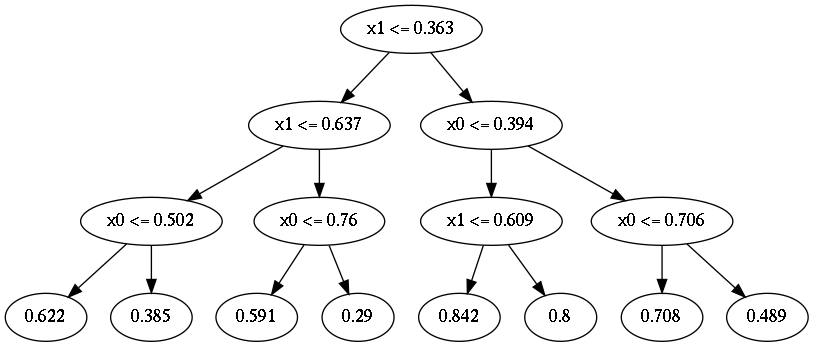

Random Data Decision Tree


<Figure size 1080x576 with 0 Axes>

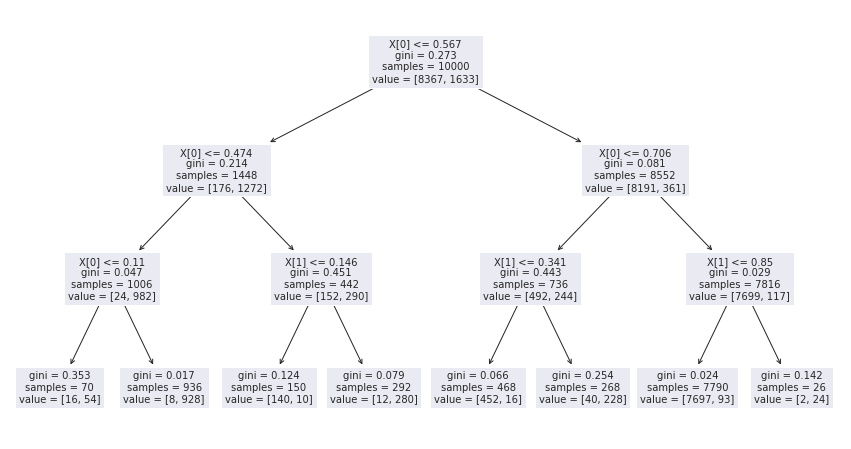

Train Data Decision Tree


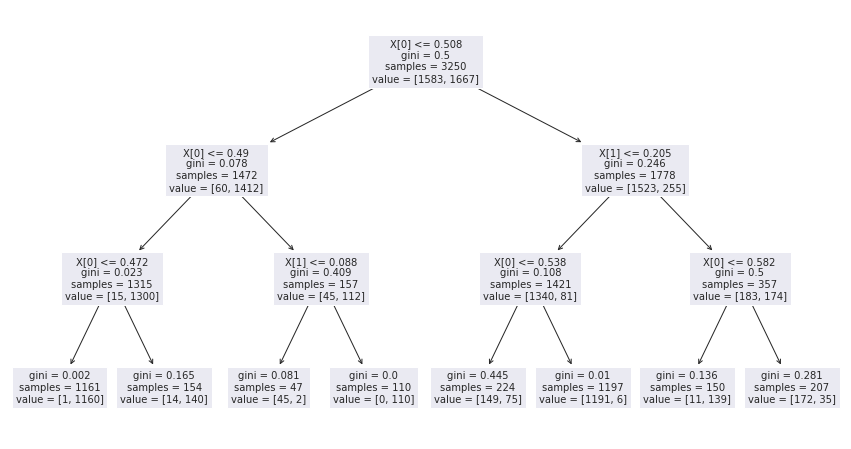

Uniform Data Decision Tree


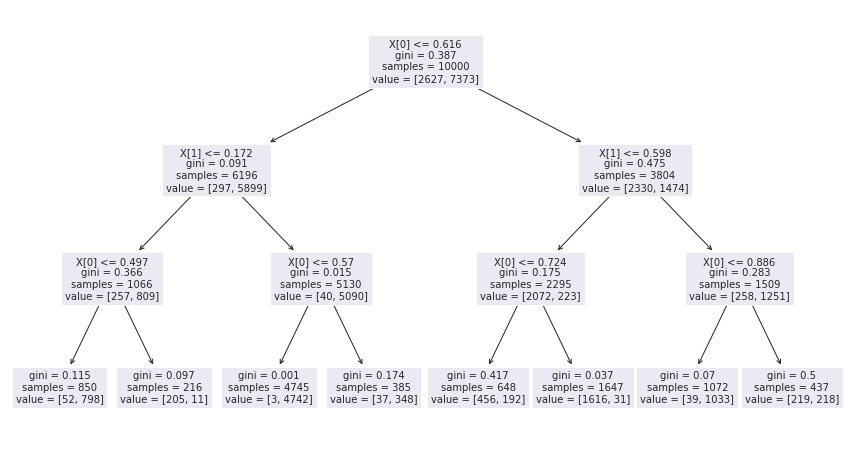

In [32]:
if config['function_family']['dt_type'] == 'vanilla':
    print('I-Net Decision Tree')
    plt.figure(figsize=(15,8))
    dt_inet = parameterDT(dt_inet_list_test[distrib_for_index][index], config)
    image = dt_inet.plot()
    display(image)
    
    print('Random Data Decision Tree')
    plt.figure(figsize=(15,8))
    plot_tree(dt_distilled_list_test[distrib_for_index][index][0], fontsize=10)  #fist index=distrib; second index=index; third index=[10000, 'TRAINDATA', 'STANDARDUNIFORM', 'STANDARDNORMAL']
    plt.show()
    
    print('Train Data Decision Tree')
    plt.figure(figsize=(15,8))
    plot_tree(dt_distilled_list_test[distrib_for_index][index][1], fontsize=10)  #fist index=distrib; second index=index; third index=[10000, 'TRAINDATA', 'STANDARDUNIFORM', 'STANDARDNORMAL']
    plt.show()    
    
    print('Uniform Data Decision Tree')
    plt.figure(figsize=(15,8))
    plot_tree(dt_distilled_list_test[distrib_for_index][index][2], fontsize=10)  #fist index=distrib; second index=index; third index=[10000, 'TRAINDATA', 'STANDARDUNIFORM', 'STANDARDNORMAL']
    plt.show()    
else:
    print('I-Net Decision Tree')
    plt.figure(figsize=(15,8))
    dt_parameters = dt_inet_list_test[distrib_for_index][index]
    tree = generate_random_decision_tree(config)
    tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
    image = tree.plot_tree()
    display(image)
    
    print('Random Data Decision Tree')
    plt.figure(figsize=(15,8))
    image = dt_distilled_list_test[distrib_for_index][index][0].plot_tree() #fist index=distrib; second index=index; third index=[10000, 'TRAINDATA', 'STANDARDUNIFORM', 'STANDARDNORMAL']
    display(image)
    
    print('Train Data Decision Tree')
    plt.figure(figsize=(15,8)) 
    image = dt_distilled_list_test[distrib_for_index][index][1].plot_tree() #fist index=distrib; second index=index; third index=[10000, 'TRAINDATA', 'STANDARDUNIFORM', 'STANDARDNORMAL'] 
    display(image)
    
    print('Uniform Data Decision Tree')
    plt.figure(figsize=(15,8))
    image = dt_distilled_list_test[distrib_for_index][index][2].plot_tree() #fist index=distrib; second index=index; third index=[10000, 'TRAINDATA', 'STANDARDUNIFORM', 'STANDARDNORMAL']
    display(image)

In [33]:
if False:
    plot_class_distrib_by_feature(model = model,
                                  index = index,
                                  test_network = network_parameters_to_network(lambda_net_dataset_valid.network_parameters_array[index], config, base_model=None),
                                  distribution_training = config['data']['distribution_list_eval'][distrib_for_index],
                                  distribution_dict = lambda_net_dataset_valid.distribution_dict_list_list[index],
                                  X_test = lambda_net_dataset_valid.X_test_lambda_array[index],
                                  config = config)

In [34]:
if False:
    plot_class_distrib_by_feature(model = model,
                                  index = index,
                                  test_network = network_parameters_to_network(shaped_network_parameters_to_array(test_network_list_distrib[index], config), config, base_model=None),
                                  distribution_training = config['data']['distribution_list_eval'][distrib_for_index],
                                  distribution_dict = lambda_net_dataset_valid.distribution_dict_list_list[index],
                                  X_test =  data_dict_list_test[0]['X_test'],
                                  config = config)

### Distribution Evaluation (Selected Samples)

In [35]:
#%load_ext autoreload
#%autoreload 2
if False:
    evaluate_network_on_distribution_custom_parameters(distribution_name_feature_0 = 'normal',
                                                       distribution_name_feature_1 = 'normal',
                                                       distribution_parameters_0_param_1_feature_0 = 1.188840288782265,
                                                       distribution_parameters_0_param_2_feature_0 = 0.8566173698593895,
                                                       distribution_parameters_1_param_1_feature_0 = 0.8713650102755661,
                                                       distribution_parameters_1_param_2_feature_0 = 1.8484540179178748,
                                                       distribution_parameters_0_param_1_feature_1 = 1.7185974826882278,
                                                       distribution_parameters_0_param_2_feature_1 = 0.5807878500034862,
                                                       distribution_parameters_1_param_1_feature_1 = 0.44369536008631294,
                                                       distribution_parameters_1_param_2_feature_1 = 1.17864258666672,
                                                       inet = model,
                                                       config = config,
                                                       distribution_list_evaluation = config['data']['distribution_list_eval'])


# Real-World Data Evaluation

In [36]:
#dataset_size_list = flatten_list([[10_000]*config['evaluation']['number_of_random_evaluations_per_distribution'], 'TRAINDATA', 'STANDARDUNIFORM', 'STANDARDNORMAL'])#[1_000, 10_000, 100_000, 1_000_000, 'TRAINDATA']
dataset_size_list = flatten_list([[10_000]*config['evaluation']['number_of_random_evaluations_per_distribution'], 
                                  'TRAINDATA', 
                                  ['STANDARDUNIFORM']*config['evaluation']['number_of_random_evaluations_per_distribution'], 
                                  ['STANDARDNORMAL']*config['evaluation']['number_of_random_evaluations_per_distribution']])#[1_000, 10_000, 100_000, 1_000_000, 'TRAINDATA']


dataset_size_list_print = []
for size in dataset_size_list:
    if type(size) is int:
        size = size//1000
        size = str(size) + 'k'
        dataset_size_list_print.append(size)
    else:
        dataset_size_list_print.append(size)

In [37]:
#distances_dict = {}
evaluation_result_dict = {}
results_dict = {}
dt_inet_dict = {}
dt_distilled_list_dict = {}
data_dict = {}
normalizer_list_dict = {}
test_network_list = {}

identifier_list = []


## Adult Dataset

In [38]:
feature_names = [
                 "Age", #0
                 "Workclass",  #1
                 "fnlwgt",  #2
                 "Education",  #3
                 "Education-Num",  #4
                 "Marital Status", #5
                 "Occupation",  #6
                 "Relationship",  #7
                 "Race",  #8
                 "Sex",  #9
                 "Capital Gain",  #10
                 "Capital Loss", #11
                 "Hours per week",  #12
                 "Country", #13
                 "capital_gain" #14
                ] 

adult_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=feature_names, index_col=False)


#adult_data['Workclass'][adult_data['Workclass'] != ' Private'] = 'Other'
#adult_data['Race'][adult_data['Race'] != ' White'] = 'Other'

#adult_data.head()

features_select = [
                 "Sex",  #9 
                 "Race",  #8
                 "Workclass",  #1
                 "Age", #0
                 "fnlwgt",  #2
                 #"Education",  #3
                 "Education-Num",  #4
                 "Marital Status", #5
                 #"Occupation",  #6
                 #"Relationship",  #7
                 "Capital Gain",  #10
                 "Capital Loss", #11
                 "Hours per week",  #12
                 #"Country", #13 
                 "capital_gain"
                  ]

adult_data = adult_data[features_select]

nominal_features_adult = [
                          'Race', 
                          'Workclass', 
                          #'Education',
                          "Marital Status",
                          #"Occupation", 
                          #"Relationship"
                        ]
ordinal_features_adult = ['Sex']

X_data_adult = adult_data.drop(['capital_gain'], axis = 1)

#y_data_adult = pd.Series(OrdinalEncoder().fit_transform(adult_data['capital_gain'].values.reshape(-1, 1)).flatten(), name='capital_gain')
y_data_adult = ((adult_data['capital_gain'] != ' <=50K') * 1)

In [39]:
config_train_network_adult = deepcopy(config)
#config_train_network_adult['lambda_net']['batch_lambda'] = 32
#config_train_network_adult['lambda_net']['learning_rate_lambda'] = 0.0003
#config_train_network_adult['lambda_net']['dropout_lambda'] = 0.25
#config_train_network_adult['lambda_net']['epochs_lambda'] = 5

In [40]:
identifier = 'Adult'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_adult, 
                                                                y_data_adult, 
                                                                nominal_features = nominal_features_adult, 
                                                                ordinal_features = ordinal_features_adult,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = config_train_network_adult)

print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict['Adult'], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (32561, 10)
Original Data Shape (encoded):  (32561, 28)
Original Data Class Distribution:  7841  (true) / 24720  (false)


In [41]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [42]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Titanic Dataset

In [43]:
titanic_data = pd.read_csv("./real_world_datasets/Titanic/train.csv")

titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace = True)
    
titanic_data['Embarked'].fillna('S', inplace = True)

features_select = [
                    #'Cabin', 
                    #'Ticket', 
                    #'Name', 
                    #'PassengerId'    
                    'Sex',    
                    'Embarked',
                    'Pclass',
                    'Age',
                    'SibSp',    
                    'Parch',
                    'Fare',    
                    'Survived',    
                  ]

titanic_data = titanic_data[features_select]

nominal_features_titanic = ['Embarked']#[1, 2, 7]
ordinal_features_titanic = ['Sex']
    
X_data_titanic = titanic_data.drop(['Survived'], axis = 1)
y_data_titanic = titanic_data['Survived']


    survival	Survival	0 = No, 1 = Yes
    pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	Sex	
    Age	Age in years	
    sibsp	# of siblings / spouses aboard the Titanic	
    parch	# of parents / children aboard the Titanic	
    ticket	Ticket number	
    fare	Passenger fare	
    cabin	Cabin number	
    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [44]:
identifier = 'Titanic'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_titanic, 
                                                                y_data_titanic, 
                                                                nominal_features = nominal_features_titanic, 
                                                                ordinal_features = ordinal_features_titanic,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (891, 7)
Original Data Shape (encoded):  (891, 9)
Original Data Class Distribution:  342  (true) / 549  (false)


In [45]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [46]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     
    
    y_train = data_dict[identifier]['y_train']
    y_train_pred = pd.Series(np.round(test_network_list[identifier].predict(data_dict[identifier]['X_train'])).ravel(), 
                             name="Survived")
    X_data = pd.concat([data_dict[identifier]['X_train'], y_train_pred], axis=1)
    display(X_data.head())
    
    X_data.groupby("Survived").SibSp.hist(alpha=0.6)
    plt.show()
    #X_data[X_data.Parch > 0.8].groupby("Survived").Age.hist(alpha=0.6)
    #plt.show()
    X_data.groupby("Survived").Age.hist(alpha=0.6)
    plt.show()
    X_data.groupby("Survived").Sex.hist(alpha=0.6)
    plt.show()
    
    
    uniform_data = generate_random_data_points_custom(config['data']['x_min'], 
                                   config['data']['x_max'],
                                   10_000, 
                                   config['data']['number_of_variables'], 
                                   config['data']['categorical_indices'],
                                   distrib='standarduniform',
                                   random_parameters=config['data']['random_parameters_distribution'],
                                   distrib_param_max=config['data']['distrib_param_max'],
                                   seed=config['computation']['RANDOM_SEED'],
                                   config=config)    
    
    y_uniform_data = np.round(test_network_list[identifier].predict(uniform_data))

    uniform_data_with_labels_df = pd.DataFrame(data=np.hstack([uniform_data, y_uniform_data]), columns=X_data.columns)    
    
    uniform_data_with_labels_df.groupby("Survived").SibSp.hist(alpha=0.6)
    plt.show()
    uniform_data_with_labels_df[uniform_data_with_labels_df.SibSp > 0.56].groupby("Survived").Age.hist(alpha=0.6)
    plt.show()
    uniform_data_with_labels_df[uniform_data_with_labels_df.SibSp < 0.56].groupby("Survived").Age.hist(alpha=0.6)
    plt.show()    
    
    uniform_data_with_labels_df.groupby("Survived").Age.hist(alpha=0.6)
    plt.show()
    uniform_data_with_labels_df.groupby("Survived").Sex.hist(alpha=0.6)
    plt.show()        
    
            

## Absenteeism at Work Dataset

In [47]:
absenteeism_data = pd.read_csv('real_world_datasets/Absenteeism/absenteeism.csv', delimiter=';')

features_select = [
                           'Disciplinary failure', #CATEGORICAL
                           'Social drinker', #CATEGORICAL
                           'Social smoker', #CATEGORICAL
                           'Transportation expense', 
                           'Distance from Residence to Work',
                           'Service time', 
                           'Age', 
                           'Work load Average/day ', 
                           'Hit target',
                           'Education', 
                           'Son', 
                           'Pet', 
                           'Weight', 
                           'Height', 
                           'Body mass index', 
                           'Absenteeism time in hours'
                        ]

absenteeism_data = absenteeism_data[features_select]

nominal_features_absenteeism = []
ordinal_features_absenteeism = []
    
X_data_absenteeism = absenteeism_data.drop(['Absenteeism time in hours'], axis = 1)
y_data_absenteeism = ((absenteeism_data['Absenteeism time in hours'] > 4) * 1) #absenteeism_data['Absenteeism time in hours']


    3. Month of absence
    4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
    5. Seasons (summer (1), autumn (2), winter (3), spring (4))
    6. Transportation expense
    7. Distance from Residence to Work (kilometers)
    8. Service time
    9. Age
    10. Work load Average/day
    11. Hit target
    12. Disciplinary failure (yes=1; no=0)
    13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
    14. Son (number of children)
    15. Social drinker (yes=1; no=0)
    16. Social smoker (yes=1; no=0)
    17. Pet (number of pet)
    18. Weight
    19. Height
    20. Body mass index
    21. Absenteeism time in hours (target)

In [48]:
identifier = 'Absenteeism'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_absenteeism, 
                                                                y_data_absenteeism, 
                                                                nominal_features = nominal_features_absenteeism, 
                                                                ordinal_features = ordinal_features_absenteeism,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)

print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (740, 15)
Original Data Shape (encoded):  (740, 15)
Original Data Class Distribution:  279  (true) / 461  (false)


In [49]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [50]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Loan House

In [51]:
loan_data = pd.read_csv('real_world_datasets/Loan/loan-train.csv', delimiter=',')

loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean(), inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mean(), inplace=True)

features_select = [
                    #'Loan_ID', 
                    'Gender', #
                    'Married', 
                    'Dependents', 
                    'Education',
                    'Self_Employed', 
                    'ApplicantIncome', 
                    'CoapplicantIncome', 
                    'LoanAmount',
                    'Loan_Amount_Term', 
                    'Credit_History', 
                    'Property_Area', 
                    'Loan_Status'
                    ]

loan_data = loan_data[features_select]

#loan_data['Dependents'][loan_data['Dependents'] == '3+'] = 4
#loan_data['Dependents'] = loan_data['Dependents'].astype(int)

#loan_data['Property_Area'][loan_data['Property_Area'] == 'Rural'] = 0
#loan_data['Property_Area'][loan_data['Property_Area'] == 'Semiurban'] = 1
#loan_data['Property_Area'][loan_data['Property_Area'] == 'Urban'] = 2
#loan_data['Property_Area'] = loan_data['Property_Area'].astype(int)

nominal_features_loan = [
                        'Dependents',
                        'Property_Area',    
                        ]


ordinal_features_loan = [
                    'Education',
                    'Gender', 
                    'Married', 
                    'Self_Employed',
                   ]
    
X_data_loan = loan_data.drop(['Loan_Status'], axis = 1)
y_data_loan = ((loan_data['Loan_Status'] == 'Y') * 1) 

In [52]:
config_train_network_loan_house = deepcopy(config)
#config_train_network_loan_house['lambda_net']['batch_lambda'] = 64#16
#config_train_network_loan_house['lambda_net']['learning_rate_lambda'] = 0.001
#config_train_network_loan_house['lambda_net']['dropout_lambda'] = 0#.1
#config_train_network_loan_house['lambda_net']['epochs_lambda'] = 500
#config_train_network_loan_house['lambda_net']['optimizer_lambda'] = 'adam'


In [53]:
identifier = 'Loan House'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_loan, 
                                                                y_data_loan, 
                                                                nominal_features = nominal_features_loan, 
                                                                ordinal_features = ordinal_features_loan,
                                                                #config = config_train_network_loan_house,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (614, 11)
Original Data Shape (encoded):  (614, 16)
Original Data Class Distribution:  422  (true) / 192  (false)


In [54]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [55]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Loan Credit

In [56]:
loan_credit_data = pd.read_csv('real_world_datasets/Credit Loan/train_split.csv', delimiter=',')

loan_credit_data['emp_title'].fillna(loan_credit_data['emp_title'].mode()[0], inplace=True)
loan_credit_data['emp_length'].fillna(loan_credit_data['emp_length'].mode()[0], inplace=True)
#loan_credit_data['desc'].fillna(loan_credit_data['desc'].mode()[0], inplace=True)
loan_credit_data['title'].fillna(loan_credit_data['title'].mode()[0], inplace=True)
#loan_credit_data['mths_since_last_delinq'].fillna(loan_credit_data['mths_since_last_delinq'].mode()[0], inplace=True)
#loan_credit_data['mths_since_last_record'].fillna(loan_credit_data['mths_since_last_record'].mode()[0], inplace=True)
loan_credit_data['revol_util'].fillna(loan_credit_data['revol_util'].mode()[0], inplace=True)
loan_credit_data['collections_12_mths_ex_med'].fillna(loan_credit_data['collections_12_mths_ex_med'].mode()[0], inplace=True)
#loan_credit_data['mths_since_last_major_derog'].fillna(loan_credit_data['mths_since_last_major_derog'].mode()[0], inplace=True)
#loan_credit_data['verification_status_joint'].fillna(loan_credit_data['verification_status_joint'].mode()[0], inplace=True)
loan_credit_data['tot_coll_amt'].fillna(loan_credit_data['tot_coll_amt'].mode()[0], inplace=True)
loan_credit_data['tot_cur_bal'].fillna(loan_credit_data['tot_cur_bal'].mode()[0], inplace=True)
loan_credit_data['total_rev_hi_lim'].fillna(loan_credit_data['total_rev_hi_lim'].mode()[0], inplace=True)


##remove too many null
#'mths_since_last_delinq','mths_since_last_record', 'mths_since_last_major_derog','pymnt_plan','desc', 'verification_status_joint'


features_select = [
                    #'member_id', 
                    'loan_amnt', 
                    'funded_amnt', 
                    'funded_amnt_inv', 
                    'term',
                    #'batch_enrolled',
                    'int_rate', 
                    'grade', 
                    #'sub_grade', 
                    #'emp_title',
                    'emp_length',
                    'home_ownership', 
                    'annual_inc', 
                    'verification_status',
                    #'pymnt_plan', 
                    #'desc', 
                    'purpose', 
                    'title', 
                    #'zip_code', 
                    #'addr_state',
                    'dti', 
                    'delinq_2yrs', 
                    'inq_last_6mths', 
                    #'mths_since_last_delinq',
                    #'mths_since_last_record',
                    'open_acc', 
                    'pub_rec', 
                    'revol_bal',
                    'revol_util', 
                    'total_acc', 
                    'initial_list_status', 
                    'total_rec_int',
                    'total_rec_late_fee', 
                    'recoveries', 
                    'collection_recovery_fee',
                    'collections_12_mths_ex_med', 
                    #'mths_since_last_major_derog',
                    'application_type', 
                    #'verification_status_joint', 
                    'last_week_pay',
                    'acc_now_delinq', 
                    'tot_coll_amt', 
                    'tot_cur_bal', 
                    'total_rev_hi_lim',
                    'loan_status'
                    ]

loan_credit_data = loan_credit_data[features_select]

nominal_features_loan_credit = [

                        ]
ordinal_features_loan_credit = [
                    #'member_id', 
                    'loan_amnt', 
                    'funded_amnt', 
                    'funded_amnt_inv', 
                    'term',
                    #'batch_enrolled',
                    'int_rate', 
                    'grade', 
                    #'sub_grade', 
                    #'emp_title',
                    'emp_length',
                    'home_ownership', 
                    'annual_inc', 
                    'verification_status',
                    #'pymnt_plan', 
                    #'desc', 
                    'purpose', 
                    'title', 
                    #'zip_code', 
                    #'addr_state',
                    'dti', 
                    'delinq_2yrs', 
                    'inq_last_6mths', 
                    #'mths_since_last_delinq',
                    #'mths_since_last_record',
                    'open_acc', 
                    'pub_rec', 
                    'revol_bal',
                    'revol_util', 
                    'total_acc', 
                    'initial_list_status', 
                    'total_rec_int',
                    'total_rec_late_fee', 
                    'recoveries', 
                    'collection_recovery_fee',
                    'collections_12_mths_ex_med', 
                    #'mths_since_last_major_derog',
                    'application_type', 
                    #'verification_status_joint', 
                    'last_week_pay',
                    'acc_now_delinq', 
                    'tot_coll_amt', 
                    'tot_cur_bal', 
                    'total_rev_hi_lim',
                   ]
    
X_data_loan_credit = loan_credit_data.drop(['loan_status'], axis = 1)
y_data_loan_credit = pd.Series(OrdinalEncoder().fit_transform(loan_credit_data['loan_status'].values.reshape(-1, 1)).flatten(), name='loan_status')


In [57]:
identifier = 'Loan Credit'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_loan_credit, 
                                                                y_data_loan_credit, 
                                                                nominal_features = nominal_features_loan_credit, 
                                                                ordinal_features = ordinal_features_loan_credit,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (63999, 32)
Original Data Shape (encoded):  (63999, 32)
Original Data Class Distribution:  15197  (true) / 48802  (false)


In [58]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [59]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Medical Insurance

In [60]:
medical_insurance_data = pd.read_csv('real_world_datasets/Medical Insurance/insurance.csv', delimiter=',')

features_select = [
                    'age', 
                    'sex', 
                    'bmi', 
                    'children', 
                    'smoker',
                    'region',
                    'charges'
                    ]

medical_insurance_data = medical_insurance_data[features_select]

nominal_features_medical_insurance = [
                    'region',
                        ]
ordinal_features_medical_insurance = [
                    'sex',
                    'smoker'
                   ]

    
X_data_medical_insurance = medical_insurance_data.drop(['charges'], axis = 1)
y_data_medical_insurance = ((medical_insurance_data['charges'] > 10_000) * 1)

X_data_medical_insurance.head()


age     sex    bmi  children smoker     region
0   19  female 27.900         0    yes  southwest
1   18    male 33.770         1     no  southeast
2   28    male 33.000         3     no  southeast
3   33    male 22.705         0     no  northwest
4   32    male 28.880         0     no  northwest

In [61]:
identifier = 'Medical Insurance'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_medical_insurance, 
                                                                y_data_medical_insurance, 
                                                                nominal_features = nominal_features_medical_insurance, 
                                                                ordinal_features = ordinal_features_medical_insurance,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (1338, 6)
Original Data Shape (encoded):  (1338, 9)
Original Data Class Distribution:  626  (true) / 712  (false)


In [62]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [63]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Bank Marketing

In [64]:
bank_data = pd.read_csv('real_world_datasets/Bank Marketing/bank-full.csv', delimiter=';') #bank

features_select = [
                    'age',
                    'job', 
                    'marital', 
                    'education', 
                    'default',
                    'housing',
                    'loan',
                    #'contact',
                    #'day',
                    #'month',
                    'duration',
                    'campaign',
                    'pdays',
                    'previous',
                    'poutcome',
                    'y',
                    ]

bank_data = bank_data[features_select]

nominal_features_bank = [
                        'job',
                        'education',
                        #'contact',
                        #'day',
                        #'month',
                        'poutcome',
                        ]
ordinal_features_bank = [
                    'marital',
                    'default',
                    'housing',
                    'loan',
                   ]

    
X_data_bank = bank_data.drop(['y'], axis = 1)
y_data_bank = pd.Series(OrdinalEncoder().fit_transform(bank_data['y'].values.reshape(-1, 1)).flatten(), name='y')


In [65]:
identifier = 'Bank Marketing'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_bank, 
                                                                y_data_bank, 
                                                                nominal_features = nominal_features_bank, 
                                                                ordinal_features = ordinal_features_bank,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (45211, 12)
Original Data Shape (encoded):  (45211, 29)
Original Data Class Distribution:  5289  (true) / 39922  (false)


In [66]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [67]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Cervical cancer (Risk Factors) Data Set

In [68]:
cc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv', index_col=False)#, names=feature_names

features_select = [
                    'Age',
                    'Number of sexual partners',
                    'First sexual intercourse',
                    'Num of pregnancies',
                    'Smokes',
                    'Smokes (years)',
                    'Hormonal Contraceptives',
                    'Hormonal Contraceptives (years)',
                    'IUD',
                    'IUD (years)',
                    'STDs',
                    'STDs (number)',
                    'STDs: Number of diagnosis',
                    'STDs: Time since first diagnosis',
                    'STDs: Time since last diagnosis',
                    'Biopsy'
                    ]

cc_data = cc_data[features_select]

cc_data['Number of sexual partners'][cc_data['Number of sexual partners'] == '?'] = cc_data['Number of sexual partners'].mode()[0]
cc_data['First sexual intercourse'][cc_data['First sexual intercourse'] == '?'] = cc_data['First sexual intercourse'].mode()[0]
cc_data['Num of pregnancies'][cc_data['Num of pregnancies'] == '?'] = cc_data['Num of pregnancies'].mode()[0]
cc_data['Smokes'][cc_data['Smokes'] == '?'] = cc_data['Smokes'].mode()[0]
cc_data['Smokes (years)'][cc_data['Smokes (years)'] == '?'] = cc_data['Smokes (years)'].mode()[0]
cc_data['Hormonal Contraceptives'][cc_data['Hormonal Contraceptives'] == '?'] = cc_data['Hormonal Contraceptives'].mode()[0]
cc_data['Hormonal Contraceptives (years)'][cc_data['Hormonal Contraceptives (years)'] == '?'] = cc_data['Hormonal Contraceptives (years)'].mode()[0]
cc_data['IUD'][cc_data['IUD'] == '?'] = cc_data['IUD'].mode()[0]
cc_data['IUD (years)'][cc_data['IUD (years)'] == '?'] = cc_data['IUD (years)'].mode()[0]
cc_data['STDs'][cc_data['STDs'] == '?'] = cc_data['STDs'].mode()[0]
cc_data['STDs (number)'][cc_data['STDs (number)'] == '?'] = cc_data['STDs (number)'].mode()[0]
cc_data['STDs: Time since first diagnosis'][cc_data['STDs: Time since first diagnosis'] == '?'] = cc_data['STDs: Time since first diagnosis'][cc_data['STDs: Time since first diagnosis'] != '?'].mode()[0]
cc_data['STDs: Time since last diagnosis'][cc_data['STDs: Time since last diagnosis'] == '?'] = cc_data['STDs: Time since last diagnosis'][cc_data['STDs: Time since last diagnosis'] != '?'].mode()[0]

nominal_features_cc = [
                        ]
ordinal_features_cc = [
                   ]

    
X_data_cc = cc_data.drop(['Biopsy'], axis = 1)
y_data_cc = pd.Series(OrdinalEncoder().fit_transform(cc_data['Biopsy'].values.reshape(-1, 1)).flatten(), name='Biopsy')


In [69]:
identifier = 'Cervical Cancer'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_cc, 
                                                                y_data_cc, 
                                                                nominal_features = nominal_features_cc, 
                                                                ordinal_features = ordinal_features_cc,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (858, 15)
Original Data Shape (encoded):  (858, 15)
Original Data Class Distribution:  55  (true) / 803  (false)


In [70]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [71]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Brest Cancer Wisconsin

In [72]:
feature_names = [
                'Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
                'Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Single Epithelial Cell Size',
                'Bare Nuclei',
                'Bland Chromatin',
                'Normal Nucleoli',
                'Mitoses',
                'Class',
                ]

bcw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names=feature_names, index_col=False)

bcw_data['Clump Thickness'][bcw_data['Clump Thickness'] == '?'] = bcw_data['Clump Thickness'].mode()[0]
bcw_data['Uniformity of Cell Size'][bcw_data['Uniformity of Cell Size'] == '?'] = bcw_data['Uniformity of Cell Size'].mode()[0]
bcw_data['Uniformity of Cell Shape'][bcw_data['Uniformity of Cell Shape'] == '?'] = bcw_data['Uniformity of Cell Shape'].mode()[0]
bcw_data['Marginal Adhesion'][bcw_data['Marginal Adhesion'] == '?'] = bcw_data['Marginal Adhesion'].mode()[0]
bcw_data['Single Epithelial Cell Size'][bcw_data['Single Epithelial Cell Size'] == '?'] = bcw_data['Single Epithelial Cell Size'].mode()[0]
bcw_data['Bare Nuclei'][bcw_data['Bare Nuclei'] == '?'] = bcw_data['Bare Nuclei'].mode()[0]
bcw_data['Bland Chromatin'][bcw_data['Bland Chromatin'] == '?'] = bcw_data['Bland Chromatin'].mode()[0]
bcw_data['Normal Nucleoli'][bcw_data['Normal Nucleoli'] == '?'] = bcw_data['Normal Nucleoli'].mode()[0]
bcw_data['Mitoses'][bcw_data['Mitoses'] == '?'] = bcw_data['Mitoses'].mode()[0]

features_select = [
                #'Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
                'Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Single Epithelial Cell Size',
                'Bare Nuclei',
                'Bland Chromatin',
                'Normal Nucleoli',
                'Mitoses',
                'Class',
                    ]

bcw_data = bcw_data[features_select]

nominal_features_bcw = [
                        ]
ordinal_features_bcw = [
                   ]

    
X_data_bcw = bcw_data.drop(['Class'], axis = 1)
y_data_bcw = pd.Series(OrdinalEncoder().fit_transform(bcw_data['Class'].values.reshape(-1, 1)).flatten(), name='Class')


In [73]:
identifier = 'Brest Cancer Wisconsin'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_bcw, 
                                                                y_data_bcw, 
                                                                nominal_features = nominal_features_bcw, 
                                                                ordinal_features = ordinal_features_bcw,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (699, 9)
Original Data Shape (encoded):  (699, 9)
Original Data Class Distribution:  241  (true) / 458  (false)


In [74]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [75]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Wisconsin Diagnostic Breast Cancer

In [76]:
feature_names = [
                'ID number',
                'Diagnosis',
                'radius',# (mean of distances from center to points on the perimeter)
                'texture',# (standard deviation of gray-scale values)
                'perimeter',
                'area',
                'smoothness',# (local variation in radius lengths)
                'compactness',# (perimeter^2 / area - 1.0)
                'concavity',# (severity of concave portions of the contour)
                'concave points',# (number of concave portions of the contour)
                'symmetry',
                'fractal dimension',# ("coastline approximation" - 1)
                ]
#Wisconsin Diagnostic Breast Cancer
wdbc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', names=feature_names, index_col=False)

features_select = [
                    #'ID number',
                    'Diagnosis',
                    'radius',# (mean of distances from center to points on the perimeter)
                    'texture',# (standard deviation of gray-scale values)
                    'perimeter',
                    'area',
                    'smoothness',# (local variation in radius lengths)
                    'compactness',# (perimeter^2 / area - 1.0)
                    'concavity',# (severity of concave portions of the contour)
                    'concave points',# (number of concave portions of the contour)
                    'symmetry',
                    'fractal dimension',# ("coastline approximation" - 1)
                    ]

wdbc_data = wdbc_data[features_select]

nominal_features_wdbc = [
                        ]
ordinal_features_wdbc = [
                   ]

    
X_data_wdbc = wdbc_data.drop(['Diagnosis'], axis = 1)
y_data_wdbc= pd.Series(OrdinalEncoder().fit_transform(wdbc_data['Diagnosis'].values.reshape(-1, 1)).flatten(), name='Diagnosis')


In [77]:
identifier = 'Wisconsin Diagnostic Breast Cancer'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_wdbc, 
                                                                y_data_wdbc, 
                                                                nominal_features = nominal_features_wdbc, 
                                                                ordinal_features = ordinal_features_wdbc,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (569, 10)
Original Data Shape (encoded):  (569, 10)
Original Data Class Distribution:  212  (true) / 357  (false)


In [78]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [79]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Wisconsin Prognostic Breast Cancer

In [80]:
feature_names = [
                'ID number',
                'Diagnosis',
                'radius',# (mean of distances from center to points on the perimeter)
                'texture',# (standard deviation of gray-scale values)
                'perimeter',
                'area',
                'smoothness',# (local variation in radius lengths)
                'compactness',# (perimeter^2 / area - 1.0)
                'concavity',# (severity of concave portions of the contour)
                'concave points',# (number of concave portions of the contour)
                'symmetry',
                'fractal dimension',# ("coastline approximation" - 1)
                ]
#Wisconsin Prognostic Breast Cancer
wpbc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data', names=feature_names, index_col=False)

features_select = [
                    #'ID number',
                    'Diagnosis',
                    'radius',# (mean of distances from center to points on the perimeter)
                    'texture',# (standard deviation of gray-scale values)
                    'perimeter',
                    'area',
                    'smoothness',# (local variation in radius lengths)
                    'compactness',# (perimeter^2 / area - 1.0)
                    'concavity',# (severity of concave portions of the contour)
                    'concave points',# (number of concave portions of the contour)
                    'symmetry',
                    'fractal dimension',# ("coastline approximation" - 1)
                    ]

wpbc_data = wpbc_data[features_select]

nominal_features_wpbc = [
                        ]
ordinal_features_wpbc = [
                   ]
 
X_data_wpbc = wpbc_data.drop(['Diagnosis'], axis = 1)
y_data_wpbc= pd.Series(OrdinalEncoder().fit_transform(wpbc_data['Diagnosis'].values.reshape(-1, 1)).flatten(), name='Diagnosis')


In [81]:
identifier = 'Wisconsin Prognostic Breast Cancer'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_wpbc, 
                                                                y_data_wpbc, 
                                                                nominal_features = nominal_features_wpbc, 
                                                                ordinal_features = ordinal_features_wpbc,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (198, 10)
Original Data Shape (encoded):  (198, 10)
Original Data Class Distribution:  47  (true) / 151  (false)


In [82]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [83]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Abalone

In [84]:
feature_names = [
                'Sex',#		nominal			M, F, and I (infant)
                'Length',#	continuous	mm	Longest shell measurement
                'Diameter',#	continuous	mm	perpendicular to length
                'Height',#		continuous	mm	with meat in shell
                'Whole weight',#	continuous	grams	whole abalone
                'Shucked weight',#	continuous	grams	weight of meat
                'Viscera weight',#	continuous	grams	gut weight (after bleeding)
                'Shell weight',#	continuous	grams	after being dried
                'Rings',#		integer			+1.5 gives the age in years
                ]

abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=feature_names, index_col=False)


features_select = [
                'Sex',#		nominal			M, F, and I (infant)
                'Length',#	continuous	mm	Longest shell measurement
                'Diameter',#	continuous	mm	perpendicular to length
                'Height',#		continuous	mm	with meat in shell
                'Whole weight',#	continuous	grams	whole abalone
                'Shucked weight',#	continuous	grams	weight of meat
                'Viscera weight',#	continuous	grams	gut weight (after bleeding)
                'Shell weight',#	continuous	grams	after being dried
                'Rings',#		integer			+1.5 gives the age in years
                    ]

abalone_data = abalone_data[features_select]

nominal_features_abalone = [
                        'Sex',
                        ]
ordinal_features_abalone = [
                   ]
   
X_data_abalone = abalone_data.drop(['Rings'], axis = 1)
y_data_abalone = ((abalone_data['Rings'] > 10) * 1)
    

In [85]:
identifier = 'Abalone'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_abalone, 
                                                                y_data_abalone, 
                                                                nominal_features = nominal_features_abalone, 
                                                                ordinal_features = ordinal_features_abalone,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (4177, 8)
Original Data Shape (encoded):  (4177, 10)
Original Data Class Distribution:  1447  (true) / 2730  (false)


In [86]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [87]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Car

In [88]:
feature_names = [
   'buying',#       v-high, high, med, low
   'maint',#        v-high, high, med, low
   'doors',#        2, 3, 4, 5-more
   'persons',#      2, 4, more
   'lug_boot',#     small, med, big
   'safety',#       low, med, high
   'class',#        unacc, acc, good, v-good
                ]

car_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=feature_names, index_col=False)

features_select = [
                   'buying',#       v-high, high, med, low
                   'maint',#        v-high, high, med, low
                   'doors',#        2, 3, 4, 5-more
                   'persons',#      2, 4, more
                   'lug_boot',#     small, med, big
                   'safety',#       low, med, high
                   'class',#        unacc, acc, good, v-good
                    ]

car_data = car_data[features_select]

nominal_features_car = [
                       'buying',#       v-high, high, med, low
                       'maint',#        v-high, high, med, low
                       'doors',#        2, 3, 4, 5-more
                       'persons',#      2, 4, more
                       'lug_boot',#     small, med, big
                       'safety',#       low, med, high
                        ]

ordinal_features_car = [
                   ]


    
X_data_car = car_data.drop(['class'], axis = 1)
y_data_car = ((car_data['class'] != 'unacc') * 1)

In [89]:
identifier = 'Car'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_car, 
                                                                y_data_car, 
                                                                nominal_features = nominal_features_car, 
                                                                ordinal_features = ordinal_features_car,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (1728, 6)
Original Data Shape (encoded):  (1728, 21)
Original Data Class Distribution:  518  (true) / 1210  (false)


In [90]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [91]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Heart Disease Data Set

In [92]:
feature_names = [
   'age',#      
   'sex',#   
   'cp',#      
   'trestbps',#
   'chol',#    
   'fbs',#      
   'restecg',# 
   'thalach',#      
   'exang',#   
   'oldpeak',#      
   'slope',#
   'ca',#    
   'thal',#      
   'num',#     
                ]

heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names=feature_names, index_col=False) #, delimiter=' '
print(heart_data.shape)


nominal_features_heart = [
                        ]

ordinal_features_heart = [
                   ]


heart_data['age'][heart_data['age'] == '?'] = heart_data['age'].mode()[0]
heart_data['sex'][heart_data['sex'] == '?'] = heart_data['sex'].mode()[0]
heart_data['cp'][heart_data['cp'] == '?'] = heart_data['cp'].mode()[0]
heart_data['trestbps'][heart_data['trestbps'] == '?'] = heart_data['trestbps'].mode()[0]
heart_data['chol'][heart_data['chol'] == '?'] = heart_data['chol'].mode()[0]
heart_data['fbs'][heart_data['fbs'] == '?'] = heart_data['fbs'].mode()[0]
heart_data['restecg'][heart_data['restecg'] == '?'] = heart_data['restecg'].mode()[0]
heart_data['thalach'][heart_data['thalach'] == '?'] = heart_data['thalach'].mode()[0]
heart_data['exang'][heart_data['exang'] == '?'] = heart_data['exang'].mode()[0]
heart_data['oldpeak'][heart_data['oldpeak'] == '?'] = heart_data['oldpeak'].mode()[0]
heart_data['slope'][heart_data['slope'] == '?'] = heart_data['slope'].mode()[0]
heart_data['ca'][heart_data['ca'] == '?'] = heart_data['ca'].mode()[0]
heart_data['thal'][heart_data['thal'] == '?'] = heart_data['thal'].mode()[0]
    
X_data_heart = heart_data.drop(['num'], axis = 1)
y_data_heart = ((heart_data['num'] < 1) * 1)



(303, 14)


In [93]:
identifier = 'Heart Disease'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_heart, 
                                                                y_data_heart, 
                                                                nominal_features = nominal_features_heart, 
                                                                ordinal_features = ordinal_features_heart,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (303, 13)
Original Data Shape (encoded):  (303, 13)
Original Data Class Distribution:  164  (true) / 139  (false)


In [94]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [95]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Credit Card

In [96]:
credit_card_data = pd.read_csv('./real_world_datasets/UCI_Credit_Card/UCI_Credit_Card.csv', index_col=False) #, delimiter=' '
credit_card_data = credit_card_data.drop(['ID'], axis = 1)
print(credit_card_data.shape)

nominal_features_credit_card = [
                        ]

ordinal_features_credit_card = [
                   ]
    
X_data_credit_card = credit_card_data.drop(['default.payment.next.month'], axis = 1)
y_data_credit_card = ((credit_card_data['default.payment.next.month'] < 1) * 1)



(30000, 24)


In [97]:
identifier = 'Credit Card'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_credit_card, 
                                                                y_data_credit_card, 
                                                                nominal_features = nominal_features_credit_card, 
                                                                ordinal_features = ordinal_features_credit_card,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (30000, 23)
Original Data Shape (encoded):  (30000, 23)
Original Data Class Distribution:  23364  (true) / 6636  (false)


In [98]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [99]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Haberman's Survival Data Set

In [100]:
feature_names = [
   'age',#      
   'year',#   
   'nodes_detected',#      
   'survival',#     
                ]

haberman_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names=feature_names, index_col=False) #, delimiter=' '
print(haberman_data.shape)


nominal_features_haberman = [
                        ]

ordinal_features_haberman = [
                   ]

    
X_data_haberman = haberman_data.drop(['survival'], axis = 1)
y_data_haberman = ((haberman_data['survival'] < 2) * 1)



(306, 4)


In [101]:
identifier = 'Haberman'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_haberman, 
                                                                y_data_haberman, 
                                                                nominal_features = nominal_features_haberman, 
                                                                ordinal_features = ordinal_features_haberman,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (306, 3)
Original Data Shape (encoded):  (306, 3)
Original Data Class Distribution:  225  (true) / 81  (false)


In [102]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [103]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Heart Failure

In [104]:
heart_failure_data = pd.read_csv('real_world_datasets/Heart Failure/heart_failure_clinical_records_dataset.csv', delimiter=',')


nominal_features_heart_failure = [
                        ]
ordinal_features_heart_failure = [

                   ]

    
X_data_heart_failure = heart_failure_data.drop(['DEATH_EVENT'], axis = 1)
y_data_heart_failure = ((heart_failure_data['DEATH_EVENT'] > 0) * 1)

X_data_heart_failure.head()


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0 75.000        0                       582         0                 20   
1 55.000        0                      7861         0                 38   
2 65.000        0                       146         0                 20   
3 50.000        1                       111         0                 20   
4 65.000        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1 265000.000             1.900           130    1   
1                    0 263358.030             1.100           136    1   
2                    0 162000.000             1.300           129    1   
3                    0 210000.000             1.900           137    1   
4                    0 327000.000             2.700           116    0   

   smoking  time  
0        0     4  
1        0     6  
2        1     7  
3        0     7  
4        0     8

In [105]:
identifier = 'Heart Failure'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_heart_failure, 
                                                                y_data_heart_failure, 
                                                                nominal_features = nominal_features_heart_failure, 
                                                                ordinal_features = ordinal_features_heart_failure,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (299, 12)
Original Data Shape (encoded):  (299, 12)
Original Data Class Distribution:  96  (true) / 203  (false)


In [106]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(10_000)]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [107]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

# Plot and Save Results

In [108]:
identifier_list_reduced = deepcopy(identifier_list)
for identifier in identifier_list:
    if test_network_list[identifier] is None:
        identifier_list_reduced.remove(identifier)

try:
    #print_complete_performance_evaluation_results(results_dict, identifier_list, dataset_size_list, dataset_size=10000)
    complete_performance_evaluation_results = get_complete_performance_evaluation_results_dataframe(results_dict, 
                                                                                                    identifier_list_reduced, 
                                                                                                    dataset_size_list,
                                                                                                    dataset_size=10000)
    display(complete_performance_evaluation_results.head(20))
except:
    pass

try:
    #print_complete_performance_evaluation_results(results_dict, identifier_list, dataset_size_list, dataset_size=10000)
    complete_performance_evaluation_results = get_complete_performance_evaluation_results_dataframe_all_distrib(results_dict, 
                                                                                                                identifier_list_reduced, 
                                                                                                                dataset_size_list,
                                                                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                                                                dataset_size=10000)
    display(complete_performance_evaluation_results.head(20))
except:
    pass

#print_network_distances(distances_dict)
network_distances = get_print_network_distances_dataframe(distances_dict)
display(network_distances.head(20))

Average Z-Score (Sample to Train Data)  \
train                                                              217.278   
valid                                                              231.446   
test                                                               227.189   
Adult                                                                  NaN   
Titanic                                                                NaN   
Absenteeism                                                            NaN   
Loan House                                                             NaN   
Loan Credit                                                            NaN   
Medical Insurance                                                      NaN   
Bank Marketing                                                         NaN   
Cervical Cancer                                                        NaN   
Brest Cancer Wisconsin                                                 NaN   
Wisconsin Diagnostic Breast Cancer                                     NaN   
Wisconsin Prognostic Breast Cancer                                     NaN   
Abalone                                                                NaN   
Car                                                                    NaN   
Heart Disease                                                          NaN   
Credit Card                                                            NaN   
Haberman                                                               NaN   
Heart Failure                                                          NaN   

                                    Average Distance to Initialization  \
train                                                           92.099   
valid                                                          101.146   
test                                                            99.279   
Adult                                                              NaN   
Titanic                                                            NaN   
Absenteeism                                                        NaN   
Loan House                                                         NaN   
Loan Credit                                                        NaN   
Medical Insurance                                                  NaN   
Bank Marketing                                                     NaN   
Cervical Cancer                                                    NaN   
Brest Cancer Wisconsin                                             NaN   
Wisconsin Diagnostic Breast Cancer                                 NaN   
Wisconsin Prognostic Breast Cancer                                 NaN   
Abalone                                                            NaN   
Car                                                                NaN   
Heart Disease                                                      NaN   
Credit Card                                                        NaN   
Haberman                                                           NaN   
Heart Failure                                                      NaN   

                                    Average Mean Distance to Train Data  \
train                                                           143.633   
valid                                                           149.109   
test                                                            149.719   
Adult                                                               NaN   
Titanic                                                             NaN   
Absenteeism                                                         NaN   
Loan House                                                          NaN   
Loan Credit                                                         NaN   
Medical Insurance                                                   NaN   
Bank Marketing                                                      NaN   
Cervical Cancer  

In [109]:
writepath_complete = './results_complete.csv'
writepath_summary = './results_summary.csv'

#TODO: ADD COMPLEXITY FOR DTS

if different_eval_data:
    flat_config = flatten_dict(config_train)
else:
    flat_config = flatten_dict(config)    

flat_dict_train = flatten_dict(inet_evaluation_result_dict_train)
flat_dict_valid = flatten_dict(inet_evaluation_result_dict_valid)
if not evaluate_distribution:
    flat_dict_test = flatten_dict(inet_evaluation_result_dict_test)
else:
    flat_dict_test = flatten_dict(inet_evaluation_result_dict_complete_by_distribution_test)

header_column = ''  

for key in flat_config.keys():
    header_column += key
    header_column += ';'     

number_of_evaluated_networks = np.array(flat_dict_train['inet_scores_binary_crossentropy']).shape[0]
for key in flat_dict_train.keys():
    #if 'function_values' not in key:
    for i in range(number_of_evaluated_networks):
        header_column += key + '_train_' + str(i) + ';'  

number_of_evaluated_networks = np.array(flat_dict_valid['inet_scores_binary_crossentropy']).shape[0]
for key in flat_dict_valid.keys():
    #if 'function_values' not in key:
    for i in range(number_of_evaluated_networks):
        header_column += key + '_valid_' + str(i) + ';'       

number_of_evaluated_networks = np.array(flat_dict_test[list(flat_dict_test.keys())[0]]).shape[0]
for key in flat_dict_test.keys():
    #if 'function_values' not in key:
    for i in range(number_of_evaluated_networks):
        header_column += key + '_test_' + str(i) + ';'          

header_column += '\n'


if os.path.exists(writepath_complete):        
    with open(writepath_complete, 'r') as text_file: 
        lines = text_file.readlines()
    
    counter = 1
    while lines[0] != header_column:  
        writepath_complete = './results_complete-' + str(counter) + '.csv' 
        if os.path.exists(writepath_complete):
            with open(writepath_complete, 'r') as text_file: 
                lines = text_file.readlines()
        else:
            break
        counter += 1

if not os.path.exists(writepath_complete):
    with open(writepath_complete, 'w+') as text_file: 
        text_file.write(header_column)

    
with open(writepath_complete, 'a+') as text_file:  
    for value in flat_config.values():
        text_file.write(str(value))
        text_file.write(';')
            
        
    number_of_evaluated_networks = np.array(flat_dict_train['inet_scores_binary_crossentropy']).shape[0]
    for key, values in flat_dict_train.items():
        #if 'function_values' not in key:
        for score in values:
            text_file.write(str(score) + ';')   

    number_of_evaluated_networks = np.array(flat_dict_valid['inet_scores_binary_crossentropy']).shape[0]
    for key, values in flat_dict_valid.items():
        #if 'function_values' not in key:
        for score in values:
            text_file.write(str(score) + ';')   

    number_of_evaluated_networks = np.array(flat_dict_test[list(flat_dict_test.keys())[0]]).shape[0]
    for key, values in flat_dict_test.items():
        #if 'function_values' not in key:
        for score in values:
            text_file.write(str(score) + ';')   
                    
    text_file.write('\n')            

    text_file.close()  
    


In [110]:
inet_evaluation_result_dict_mean_train_flat = flatten_dict(inet_evaluation_result_dict_mean_train)
inet_evaluation_result_dict_mean_valid_flat = flatten_dict(inet_evaluation_result_dict_mean_valid)
if not evaluate_distribution:
    inet_evaluation_result_dict_mean_test_flat = flatten_dict(inet_evaluation_result_dict_mean_test)
else:
    inet_evaluation_result_dict_mean_test_flat = flatten_dict(inet_evaluation_result_dict_mean_by_distribution_test)

#identifier_list_synthetic = ['train', 'valid', 'test']
identifier_list_combined = list(flatten_list([identifier_list, ['train', 'valid', 'test']]))

header_column = ''

for key in flat_config.keys():
    header_column += key + ';'

for key in inet_evaluation_result_dict_mean_train_flat.keys():
    header_column += 'train_' + key + ';'
for key in inet_evaluation_result_dict_mean_valid_flat.keys():
    header_column += 'valid_' + key + ';'          
for key in inet_evaluation_result_dict_mean_test_flat.keys():
    header_column += 'test_' + key + ';'                

for dataset_size in dataset_size_list:
    for identifier in identifier_list:
        results_dict_flat = flatten_dict(results_dict[identifier][-2])
        #del results_dict_flat['function_values_y_test_inet_dt']
        #del results_dict_flat['function_values_y_test_distilled_dt']

        for key in results_dict_flat.keys():
            header_column += key + '_' + identifier + '_' + str(dataset_size) + ';'                                   

for key in distances_dict['train'].keys():
    for identifier in identifier_list_combined:
        header_column += key + '_' + identifier + ';' 

header_column += '\n'
 
if os.path.exists(writepath_summary):        
    with open(writepath_summary, 'r') as text_file: 
        lines = text_file.readlines()

    counter = 1
    while lines[0] != header_column:  
        writepath_summary = './results_summary-' + str(counter) + '.csv' 
        if os.path.exists(writepath_summary):
            with open(writepath_summary, 'r') as text_file: 
                lines = text_file.readlines()
        else:
            break
        counter += 1

if not os.path.exists(writepath_summary):
    with open(writepath_summary, 'w+') as text_file: 
        text_file.write(header_column)

with open(writepath_summary, 'a+') as text_file: 
    
    for value in flat_config.values():
        text_file.write(str(value) + ';')
        
    for value in inet_evaluation_result_dict_mean_train_flat.values():
        text_file.write(str(value) + ';')
    for value in inet_evaluation_result_dict_mean_valid_flat.values():
        text_file.write(str(value) + ';')            
    for value in inet_evaluation_result_dict_mean_test_flat.values():
        text_file.write(str(value) + ';')

    for i in range(len(dataset_size_list)):
        for identifier in identifier_list:
            evaluation_result_dict_flat = flatten_dict(evaluation_result_dict[identifier])
            #del evaluation_result_dict_flat['function_values_y_test_inet_dt']
            #del evaluation_result_dict_flat['function_values_y_test_distilled_dt']
            
            for key, values in evaluation_result_dict_flat.items():
                text_file.write(str(values[i]) + ';')    #values[i]        
     
    for key in distances_dict['train'].keys():
        for identifier in identifier_list_combined:
            text_file.write(str(distances_dict[identifier][key]) + ';')      
    
    text_file.write('\n')

    text_file.close()      

In [111]:
if use_gpu:
    from numba import cuda 
    device = cuda.get_current_device()
    device.reset()